In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math 
from collections import Counter


In [8]:
data = pd.read_csv("data/survey_results_public.csv")
data_schema= pd.read_csv("data/survey_results_schema.csv")


data.shape


(88883, 85)

In [9]:
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', None)

In [10]:
data_schema

Column  \
0                        Respondent   
1                        MainBranch   
2                          Hobbyist   
3                       OpenSourcer   
4                        OpenSource   
5                        Employment   
6                           Country   
7                           Student   
8                           EdLevel   
9                    UndergradMajor   
10                         EduOther   
11                          OrgSize   
12                          DevType   
13                        YearsCode   
14                       Age1stCode   
15                     YearsCodePro   
16                        CareerSat   
17                           JobSat   
18                         MgrIdiot   
19                         MgrMoney   
20                          MgrWant   
21                          JobSeek   
22                     LastHireDate   
23                          LastInt   
24                         FizzBuzz   
25  How often do you work remotely?   
26                              NaN   
27                     ResumeUpdate   
28                   CurrencySymbol   
29                     CurrencyDesc   
30                        CompTotal   
31                         CompFreq   
32                    ConvertedComp   
33                      WorkWeekHrs   
34                         WorkPlan   
35                    WorkChallenge   
36                       WorkRemote   
37                          WorkLoc   
38                           ImpSyn   
39                          CodeRev   
40                       CodeRevHrs   
41                        UnitTests   
42                      PurchaseHow   
43                     PurchaseWhat   
44               LanguageWorkedWith   
45           LanguageDesireNextYear   
46               DatabaseWorkedWith   
47           DatabaseDesireNextYear   
48               PlatformWorkedWith   
49           PlatformDesireNextYear   
50               WebFrameWorkedWith   
51           WebFrameDesireNextYear   
52               MiscTechWorkedWith   
53           MiscTechDesireNextYear   
54                       DevEnviron   
55                            OpSys   
56                       Containers   
57                    BlockchainOrg   
58                     BlockchainIs   
59                       BetterLife   
60                         ITperson   
61                            OffOn   
62                      SocialMedia   
63                     Extraversion   
64                       ScreenName   
65                       SOVisit1st   
66                      SOVisitFreq   
67                        SOVisitTo   
68                     SOFindAnswer   
69                      SOTimeSaved   
70                    SOHowMuchTime   
71                        SOAccount   
72                       SOPartFreq   
73                           SOJobs   
74                         EntTeams   
75                           SOComm   
76                    WelcomeChange   
77                     SONewContent   
78                              Age   
79                           Gender   
80                            Trans   
81                        Sexuality   
82                        Ethnicity   
83                       Dependents   
84                     SurveyLength   
85                       SurveyEase   

                                         QuestionText  
0   Randomized respondent ID number (not in order ...  
1   Which of the following options best describes ...  
2                             Do you code as a hobby?  
3         How often do you contribute to open source?  
4   How do you feel about the quality of open sour...  
5   Which of the following best describes your cur...  
6           In which country do you currently reside?  
7   Are you currently enrolled in a formal, degree...  
8   Which of the following best describes the high...  
9   What was your main or most important field of ...  
10  Which of the fo

                                                           მონაცემთა დამუშავება 

                                                ზრდა-კლების მიხედვით დალაგების ფუნქცია 

In [11]:
def sort_dict_by_value(Dictionary, reverse = False):        # ალაგებს ზრდის-კლების მიხედვით 
    return dict(sorted(Dictionary.items(), key = lambda x: x[1], reverse = reverse)) 

                                                         გრაფიკის აგების ფუნქცია    

In [12]:

def Build_Barh( key_Phrases , Quantity , interviewed_Numbers ,style , x_axis_visible,title):
    
    fig, ax = plt.subplots()


    langs = key_Phrases

    langs_users_num = np.array(Quantity)

    total = len(interviewed_Numbers)

    percent = langs_users_num/total*100


    new_labels = [i+'  {:.1f}%'.format(j) for i, j in zip(langs, percent)]   # პროცენტობის სიზუსტე


    plt.barh(langs, langs_users_num)  # თვითონ ნახაზი
    plt.yticks(range(len(langs)), new_labels) # პროცენტობის გამოსახვა და ღერძების განლაგება



    for spine in ax.spines.values():    # ვერდიკალური ხაზების მოშორება
        spine.set_visible(False)

    ax.axes.get_xaxis().set_visible(x_axis_visible)  # იქს ღეძზე მნიშვნელობების დასმა მოშორება 
    ax.tick_params(axis="y", left=False)
    
    plt.style.use(style)   # ნახაზის სტილი

    plt.title(title)  # add title

    # reset the plot configurations to default
    #plt.rcdefaults()
    
    # update the overall font size
    #plt.rcParams.update({'font.size':6})

    # change the fontsize of the xtick and ytick labels
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)

    # change the fontsize of axes title
    #plt.rc('axes', titlesize=20)


    plt.show()

In [13]:

def Build_Barh_sizes( key_Phrases , Quantity , interviewed_Numbers ,style , x_axis_visible, sizes, title ):
    
    fig, ax = plt.subplots(figsize=(sizes))


    langs = key_Phrases

    langs_users_num = np.array(Quantity)

    total = len(interviewed_Numbers)

    percent = langs_users_num/total*100


    new_labels = [i+'  {:.1f}%'.format(j) for i, j in zip(langs, percent)]   # პროცენტობის სიზუსტე


    plt.barh(langs, langs_users_num)  # თვითონ ნახაზი
    plt.yticks(range(len(langs)), new_labels) # პროცენტობის გამოსახვა და ღერძების განლაგება



    for spine in ax.spines.values():    # ვერდიკალური ხაზების მოშორება
        spine.set_visible(False)

    ax.axes.get_xaxis().set_visible(x_axis_visible)  # იქს ღეძზე მნიშვნელობების დასმა მოშორება 
    ax.tick_params(axis="y", left=False)
    
    plt.style.use(style)   # ნახაზის სტილი 

    plt.title(title)  # add title
    # reset the plot configurations to default
    #plt.rcdefaults()
    
    # update the overall font size
    #plt.rcParams.update({'font.size':6})

    # change the fontsize of the xtick and ytick labels
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)

    # change the fontsize of axes title
    #plt.rc('axes', titlesize=20)
    
    plt.show()

In [14]:

def Build_Barh_sizes_withot_percent (key_Phrases , Quantity  ,style , x_axis_visible, sizes, title ) :
    
    fig, ax = plt.subplots(figsize=(sizes))

    langs = key_Phrases

    langs_users_num = np.array(Quantity)


    new_labels = [i+'  {:.1f}'.format(j) for i, j in zip(langs, Quantity)]   # პროცენტობის სიზუსტე


    plt.barh(langs, langs_users_num)  # თვითონ ნახაზი
    plt.yticks(range(len(langs)), new_labels) # პროცენტობის გამოსახვა და ღერძების განლაგება



    for spine in ax.spines.values():    # ვერდიკალური ხაზების მოშორება
        spine.set_visible(False)

    ax.axes.get_xaxis().set_visible(x_axis_visible)  # იქს ღეძზე მნიშვნელობების დასმა მოშორება 
    ax.tick_params(axis="y", left=False)

    plt.style.use(style)   # ნახაზის სტილი 

    plt.title(title)  # add title
    # reset the plot configurations to default
    #plt.rcdefaults()

    # update the overall font size
    #plt.rcParams.update({'font.size':6})

    # change the fontsize of the xtick and ytick labels
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)

    # change the fontsize of axes title
    #plt.rc('axes', titlesize=20)

    plt.show()



In [15]:

def Build_Barh_sizes_percentage (key_Phrases , Quantity  ,style , x_axis_visible, sizes, title ) :
    
    fig, ax = plt.subplots(figsize=(sizes))

    langs = key_Phrases

    langs_users_num = np.array(Quantity)


    new_labels = [i+'  {:.1f}%'.format(j) for i, j in zip(langs, Quantity)]   # პროცენტობის სიზუსტე


    plt.barh(langs, langs_users_num)  # თვითონ ნახაზი
    plt.yticks(range(len(langs)), new_labels) # პროცენტობის გამოსახვა და ღერძების განლაგება



    for spine in ax.spines.values():    # ვერდიკალური ხაზების მოშორება
        spine.set_visible(False)

    ax.axes.get_xaxis().set_visible(x_axis_visible)  # იქს ღეძზე მნიშვნელობების დასმა მოშორება 
    ax.tick_params(axis="y", left=False)

    plt.style.use(style)   # ნახაზის სტილი 

    plt.title(title)  # add title
    # reset the plot configurations to default
    #plt.rcdefaults()

    # update the overall font size
    #plt.rcParams.update({'font.size':6})

    # change the fontsize of the xtick and ytick labels
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)

    # change the fontsize of axes title
    #plt.rc('axes', titlesize=20)

    plt.show()



                                                        სიების სორტირების ფუქნცია

In [16]:
def list_sorter_counter(filtered_list):
  
  global key_Phrases    # გამოვაცხადე გლობალურ ცვლადებად რათა სხვა ფუნქციებში გამოვიყენო
  global Quantity       # გამოვაცხადე გლობალურ ცვლადებად რათა სხვა ფუნქციებში გამოვიყენო
  

  union = []                          # ერთი დიდი სია 

  for i in filtered_list:
      for k in i :                    # ერთ დიდი სიაში აერთიანებს ყველაფერს 
          union.append(k)

  Counted = Counter(union)             # დიდ სიაში ითვლის რაში რა რამდენჯერ მეორდება



  Counted = sort_dict_by_value(Counted, False)  #იყენებს ძემოთა ფუქნციას


  key_Phrases = []  #ინახავს ფრაზებს
  Quantity = []   # ინახავს რაოდენობას 

  

  items = Counted.items()    # ფაქტიურად დიქშინარის გარდაქმნის ლისთად

  for item in items:        # ანაწილებს ფრაზებს და რაოდენობებს სათანადო სიებში
      key_Phrases.append(item[0])   # უშვებს ფრაზებს
      Quantity.append(item[1])      # უშვებს რიცხვით მნიშვნელობებს



                                            მონაცემთა დამუშავება

                                                Developer Type      

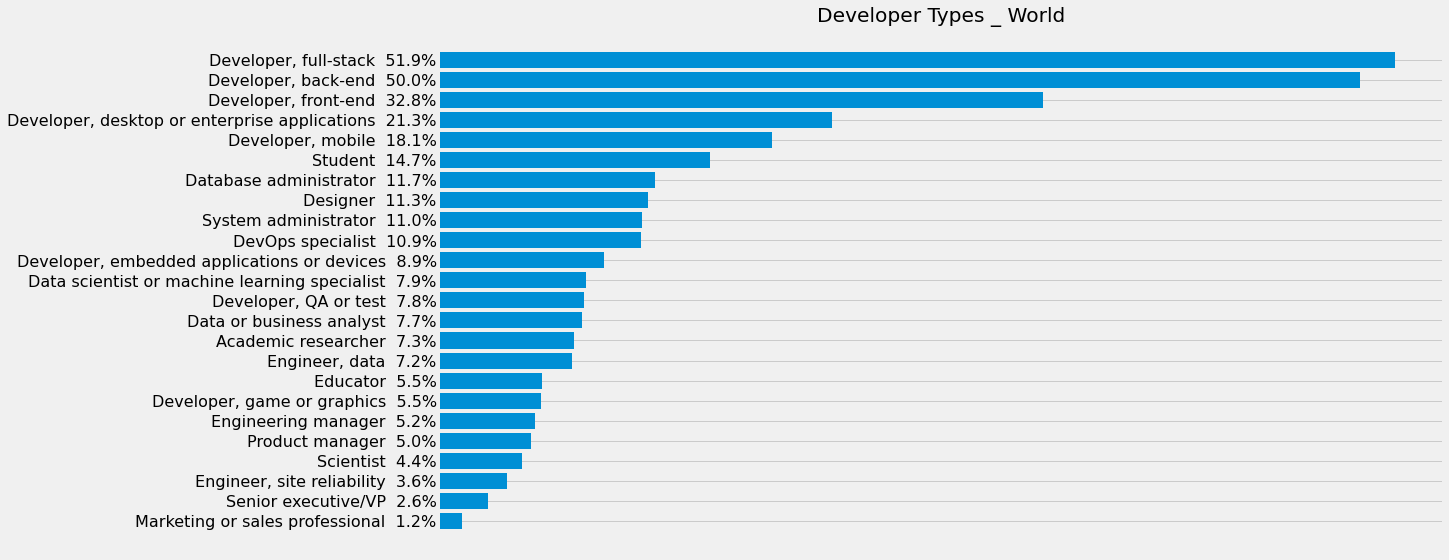

In [131]:
DevType = data["DevType"]  #calling data from developer types
 
DevType.dropna( inplace=True)  #filtering the data from empty and unnecessary answers

DevType = DevType.str.split(';')  #fracturing where ";"- s show up and write fractured data in lists


list_sorter_counter(DevType)  #autosorting

Build_Barh_sizes( key_Phrases , Quantity, DevType ,"fivethirtyeight", False , (16,9), "Developer Types _ World") #building barchart


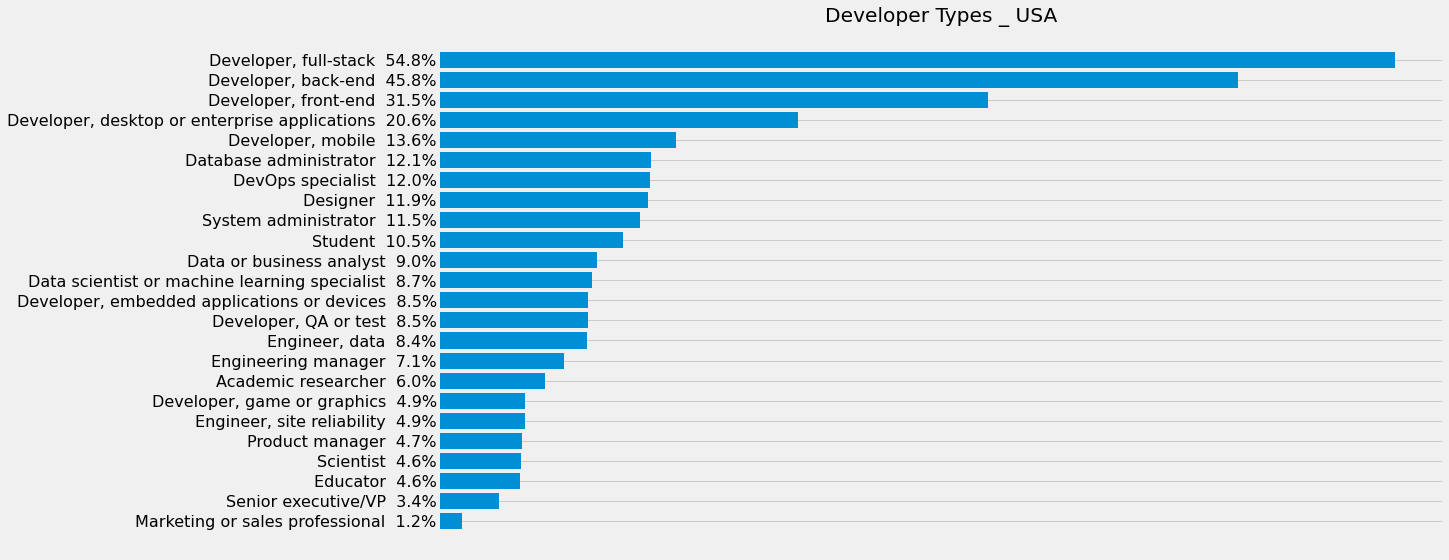

In [18]:

DevType_Filtered = data["DevType"]   #calling data from developer types
 
DevType_Filtered.dropna( inplace=True)  #filtering the data from empty and unnecessary answers

DevType =data[(DevType_Filtered != "NaN") & (data["Country"] == "United States")]  #combining devtype and USA's data 



New_DevType = DevType["DevType"]  #save the combined data in new variable 

New_DevType = New_DevType.str.split(';')  #fracturing where ";"- s show up and write fractured data in lists



list_sorter_counter(New_DevType)   #autosorting 

Build_Barh_sizes( key_Phrases , Quantity, DevType ,"fivethirtyeight", False , (16,9), "Developer Types _ USA") #build barchart

                                                OpenSourcer 

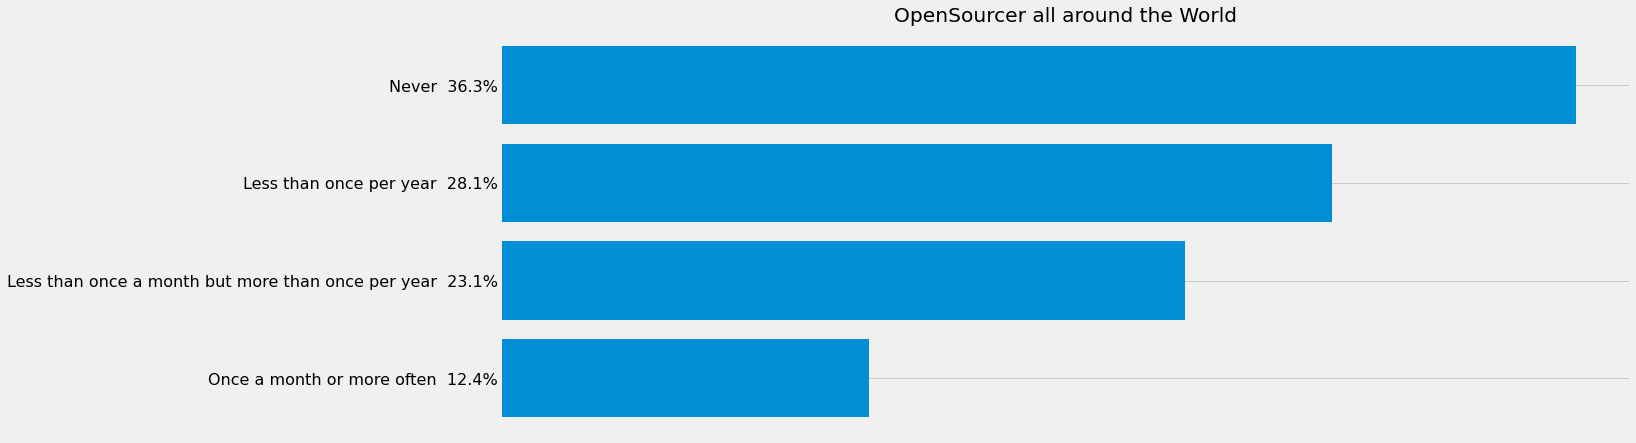

In [134]:
OpenSourcer = data["OpenSourcer"]  #calling data fom OpenSourcer 
OpenSourcer.dropna(inplace = True) #filtering the data from empty and unnecessary answers

counted = Counter(OpenSourcer)  #writing in dictionary and counting 

Counted_sorted = sort_dict_by_value(counted, False)  #sorting data by growth/by reduction 

#empty lists to add related data later 
key_Phrases=[] 
Quantity=[]     

items = Counted_sorted.items() #rewritin =g data into lists

#adding key phrases and quantity to relevant empty list
for item in items:
    key_Phrases.append(item[0])  #the data that is placed at "0" appends on key phrases
    Quantity.append(item[1])     #the data that is placed at "1" appends on Quantity 


Build_Barh_sizes( key_Phrases , Quantity, OpenSourcer ,"fivethirtyeight", False , (18,7), "OpenSourcer all around the World")   #build barchart

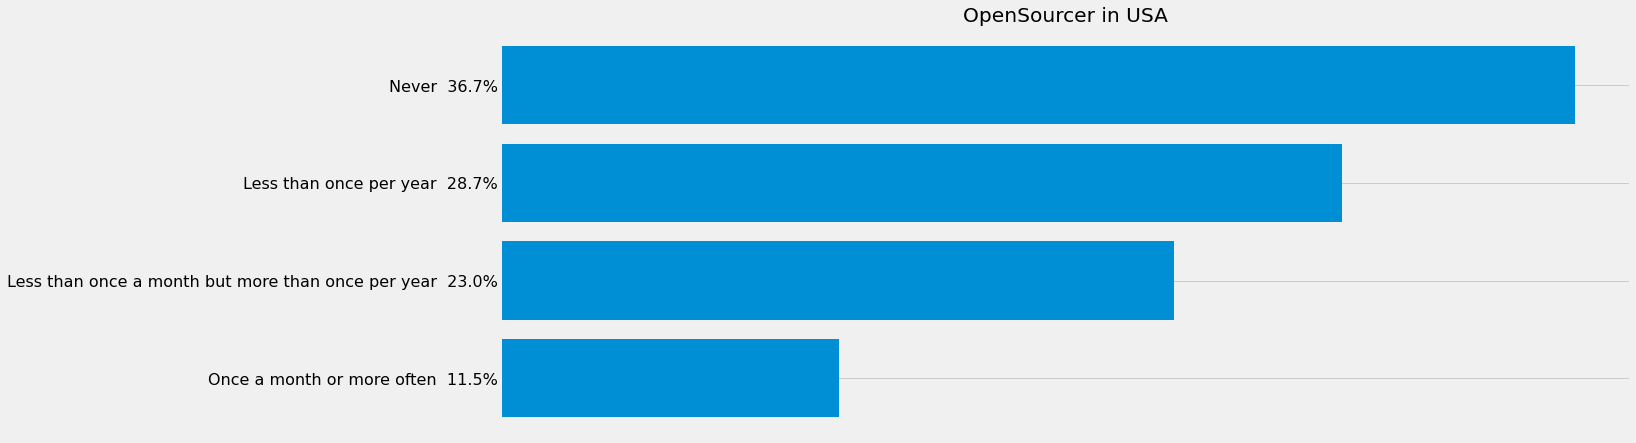

In [135]:
opensourcer =  data["OpenSourcer"]  #calling data fom OpenSourcer 

opensourcer.dropna(inplace = True)   #filtering the data from empty and unnecessary answers

usa_opensourcer =  data[(opensourcer != "NaN") & (data["Country"] == "United States")]  #cobining Opensourcer and USA's data

Usa_opensourcer = usa_opensourcer["OpenSourcer"]  #save the ucombined data in new variable 

counted = Counter(Usa_opensourcer) #writing in dictionary and counting (combined data)


Counted_sorted = sort_dict_by_value(counted, False)  #sorting data by growth/by reduction 

key_Phrases=[]  # list to save key phrases
Quantity=[]     # list to save quantity

items = Counted_sorted.items() #rewriting data into lists

#adding key phrases and quantity to relevant empty list
for item in items:
    key_Phrases.append(item[0]) #the data that is placed at "0" appends on key phrases
    Quantity.append(item[1])    #the data that is placed at "1" appends on Quantity 


Build_Barh_sizes( key_Phrases , Quantity, Usa_opensourcer ,"fivethirtyeight", False , (18,7), "OpenSourcer in USA")   #Building barchart



                                                Hobbyists

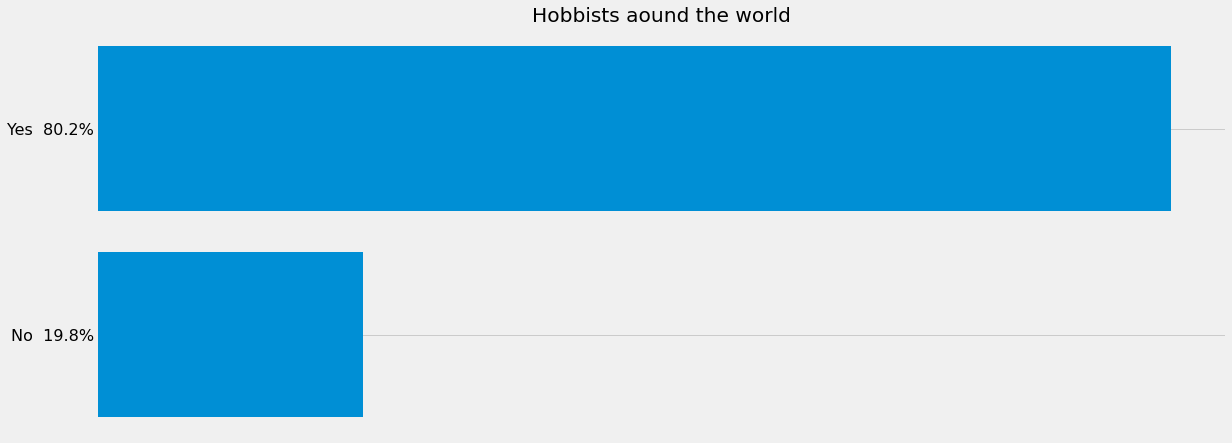

In [21]:
hobbists = data["Hobbyist"]  #calling data from Hobbyists
hobbists.dropna(inplace =  True) #filtering the data from empty and unnecessary answers

counted =  Counter(hobbists)   #writing in dictionary and counting 

counted = sort_dict_by_value(counted) #sorting data by growth/by reduction 

items = counted.items() #rewriting data into lists

key_Phrases= []    # list to save key phrases
Quantity = []      # list to save quantity

#adding key phrases and quantity to relevant empty list
for item in items:
    key_Phrases.append(item[0])     #the data that is placed at "0" appends on key phrases
    Quantity.append(item[1])        #the data that is placed at "1" appends on Quantity 

Build_Barh_sizes( key_Phrases , Quantity, hobbists ,"fivethirtyeight", False , (18,7), "Hobbists aound the world")   #Building Barchart

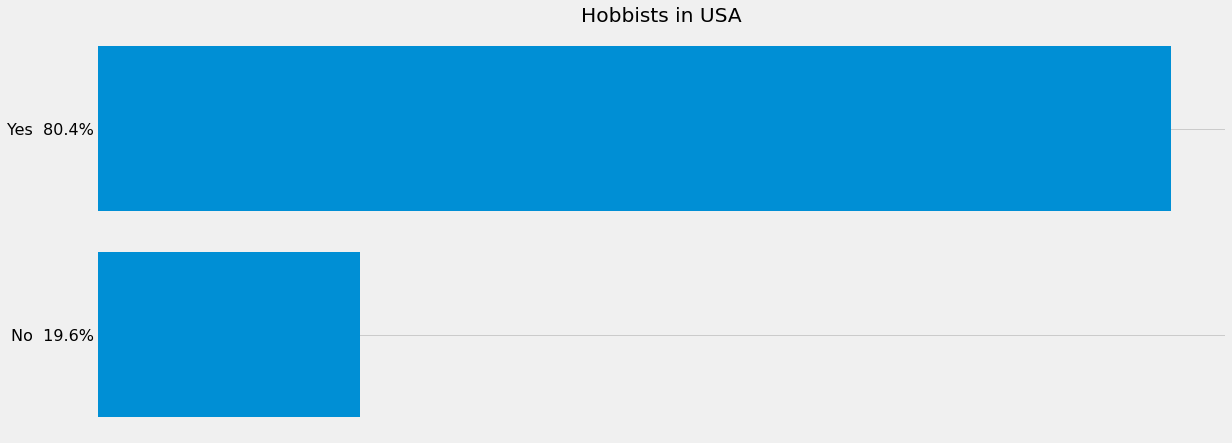

In [22]:
hobbists = data["Hobbyist"]   #calling data from Hobbyists
hobbists.dropna(inplace = True)   #filtering the data from empty and unnecessary answers

usa_hobbists =  data[(hobbists != "NaN") & (data["Country"] ==  "United States")]  #combining Hobbyistsand USA's data

Usa_hobbists = usa_hobbists["Hobbyist"]  #save the combined data in new variable 

counted = Counter(Usa_hobbists)    #writing in dictionary and counting(from combined data)

items =  counted.items()    #rewriting data into lists

key_Phrases = []   # list to save key phrases
Quantity = []      # list to save quantity

#adding key phrases and quantity to relevant empty list
for item in items:
    key_Phrases.append(item[0])   #the data that is placed at "0" appends on key phrases
    Quantity.append(item[1])      #the data that is placed at "1" appends on Quantity 

Build_Barh_sizes(key_Phrases, Quantity, Usa_hobbists, "fivethirtyeight", False , (18,7), "Hobbists in USA") #Building barchart

                                            Years Of Coding

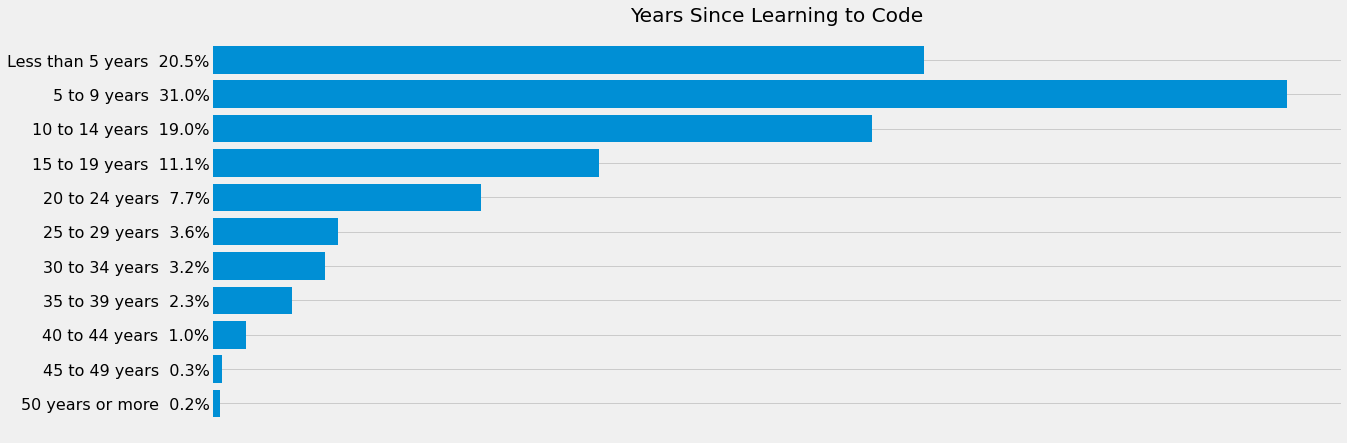

In [23]:
years_of_coding =  data["YearsCode"]  #calling data from years of coding
years_of_coding.dropna(inplace =  True) #filtering the data from empty and unnecessary answers

years_of_coding =  np.array(years_of_coding) #transfers data in list
years_of_coding = np.where(years_of_coding == "Less than 1 year", "1", years_of_coding) # changing "less than 1 year" variable as 1 year
years_of_coding = np.where(years_of_coding == "More than 50 years", "50", years_of_coding) # changing "more then 50 years" variable as 50 years

#creating the function where is written logics for sorting data
def logics_for_years_of_coding(years_of_coding):
    #Creating empty lists with specific ages where the related data will be placed 
    less_than_5 = []
    five_to_9 = []
    ten_to_14 = []
    fifteen_to_19 = []
    twenty_to_24 = []
    twentyfive_to_29 = []
    thirty_to_34 = []
    thirtyfive_to_39 = []
    fourty_to_44 = []
    fourtyfive_to_49 = []
    fifty_or_more = []

    
    #adding data to related lists 
    for i in years_of_coding:
        if int(i) in list(range(0,5)):
            less_than_5.append(i)
        elif int(i) in list(range(5,10)):
            five_to_9.append(i)
        elif int(i) in list(range(10,15)):
            ten_to_14.append(i)
        elif int(i) in list(range(15,20)):
            fifteen_to_19.append(i)
        elif int(i) in list(range (20,25)):
            twenty_to_24.append(i)
        elif int(i) in list(range(25,30)):
            twentyfive_to_29.append(i)
        elif int(i) in list(range (30,35)):
            thirty_to_34.append(i)
        elif int(i) in list(range (35,40)):
            thirtyfive_to_39.append(i)
        elif int(i) in list(range (40,45)):
            fourty_to_44.append(i)
        elif int(i) in list(range(45,50)):
            fourtyfive_to_49.append(i)
        else:
            fifty_or_more.append(i)


    #defining length of the lists that have been created after adding data 
    len_less_than_5 = len(less_than_5)
    len_five_to_9 = len(five_to_9)
    len_ten_to_14 = len(ten_to_14)
    len_fifteen_to_19 = len(fifteen_to_19)
    len_twenty_to_24 = len(twenty_to_24)
    len_twentyfive_to_29 = len(twentyfive_to_29)
    len_thirty_to_34 = len(thirty_to_34)
    len_thirtyfive_to_39 = len(thirtyfive_to_39)
    len_fourty_to_44 = len(fourty_to_44)
    len_fourtyfive_to_49 = len(fourtyfive_to_49)
    len_fifty_or_more = len(fifty_or_more)
    
    global key_Phrases  #declaring key phrases as global 
    global Quantity     #declaring Quantity as global 

    #writing the key phrases and quantity iformation by hand 
    # where the key phrases are presented as list with specific ages in it 
    #and quantity is the list with the length of the lists where the data was added 
    key_Phrases = ["Less than 5 years", "5 to 9 years", "10 to 14 years", "15 to 19 years", "20 to 24 years", "25 to 29 years", 
                 "30 to 34 years", "35 to 39 years", "40 to 44 years", "45 to 49 years", "50 years or more"]
    Quantity = [len_less_than_5, len_five_to_9, len_ten_to_14, len_fifteen_to_19, len_twenty_to_24, len_twentyfive_to_29,
               len_thirty_to_34, len_thirtyfive_to_39, len_fourty_to_44, len_fourtyfive_to_49, len_fifty_or_more ]



#calling the function to sort the data
logics_for_years_of_coding(years_of_coding)

#reversing key phrases and quantity 
key_Phrases.reverse()  
Quantity.reverse() 

Build_Barh_sizes(key_Phrases, Quantity, years_of_coding, "fivethirtyeight", False , (18,7), "Years Since Learning to Code")  #building barchart


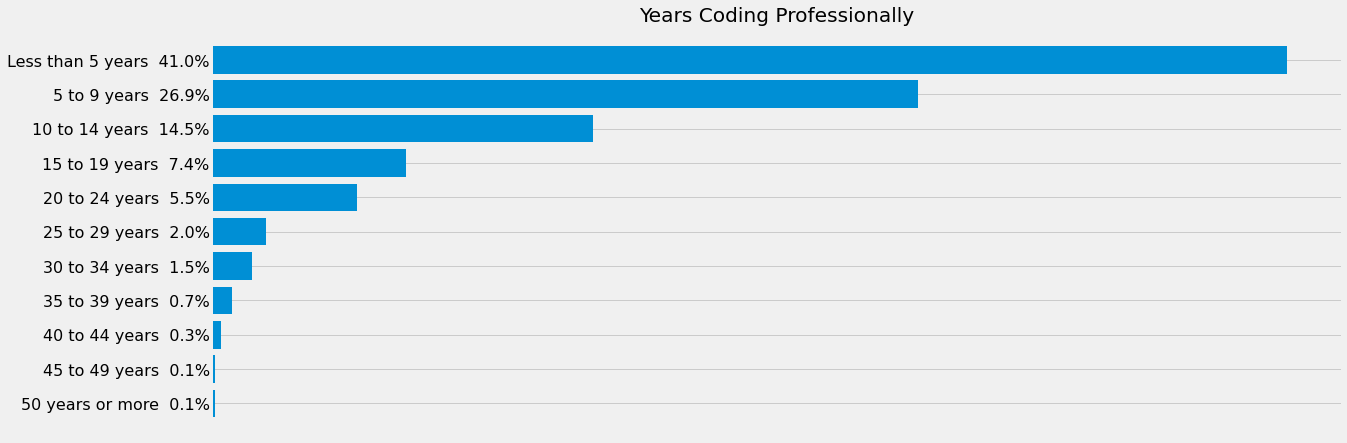

In [24]:
years_coding_as_pro =  data["YearsCodePro"] #calling data from years of coding as pro 

years_coding_as_pro.dropna(inplace =  True)  #filtering the data from empty and unnecessary answers


years_coding_as_pro =  np.array(years_coding_as_pro) #transfers data in list
years_coding_as_pro = np.where(years_coding_as_pro == "Less than 1 year", "1", years_coding_as_pro) # changing "less than 1 year" variable as 1 year
years_coding_as_pro = np.where(years_coding_as_pro == "More than 50 years", "50", years_coding_as_pro) # changing "more then 50 years" variable as 50 years

#calling the function to sort the data
logics_for_years_of_coding(years_coding_as_pro)

#reversing key phrases and quantity 
key_Phrases.reverse()
Quantity.reverse()

Build_Barh_sizes(key_Phrases, Quantity, years_coding_as_pro, "fivethirtyeight", False , (18,7), "Years Coding Professionally") #building barchart


                                        Writing that First line of code 

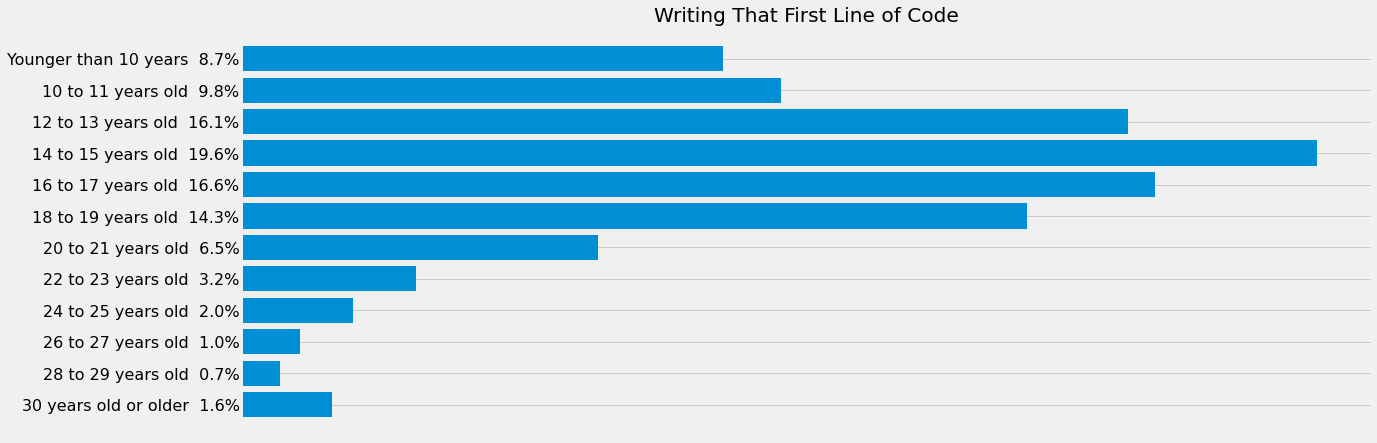

In [140]:
age_of_1st_code = data["Age1stCode"]  #calling data fromm age of first code 
age_of_1st_code.dropna(inplace = True) #filtering the data from empty and unnecessary answers

age_of_1st_code =  np.array(age_of_1st_code)  #transfers data in list
age_of_1st_code = np.where(age_of_1st_code == "Younger than 5 years", "1", age_of_1st_code) # changing "Younger than 5" variable as 1 year
age_of_1st_code = np.where(age_of_1st_code == "Older than 85", "30", age_of_1st_code)   # changing "Older than 85" variable as 30 years

#creating the function where is written logics for sorting data
def logics_for_age_of_1st_code(age_of_1st_code):
   #Creating empty lists with specific ages where the related data will be placed 
    younger_10 = []
    from_10_to_11 = []
    from_12_to_13 = []
    from_14_to_15 = []
    from_16_to_17 = []
    from_18_to_19 = []
    from_20_to_21 = []
    from_22_to_23 = []
    from_24_to_25 = []
    from_26_to_27 = [] 
    from_28_to_29 = []
    thirty_or_older = []


    #adding data to related lists 
    for i in age_of_1st_code:
        if int(i) in list(range(0,10)):
            younger_10.append(i)
        elif int(i) in list(range(10,12)):
            from_10_to_11.append(i)
        elif int(i) in list(range(12,14)):
            from_12_to_13.append(i)
        elif int(i) in list(range(14,16)):
            from_14_to_15.append(i)
        elif int(i) in list(range (16,18)):
            from_16_to_17.append(i)
        elif int(i) in list(range(18,20)):
            from_18_to_19.append(i)
        elif int(i) in list(range (20,22)):
            from_20_to_21.append(i)
        elif int(i) in list(range (22,24)):
            from_22_to_23.append(i)
        elif int(i) in list(range (24,26)):
            from_24_to_25.append(i)
        elif int(i) in list(range(26,28)):
            from_26_to_27.append(i)
        elif int(i) in list(range(28,30)):
            from_28_to_29.append(i)
        else:
            thirty_or_older.append(i)

    #defining length of the lists that have been created after adding data 
    len_younger_10 = len(younger_10)
    len_from_10_to_11 = len(from_10_to_11)
    len_from_12_to_13 = len(from_12_to_13)
    len_from_14_to_15 = len(from_14_to_15)
    len_from_16_to_17 = len(from_16_to_17)
    len_from_18_to_19 = len(from_18_to_19)
    len_from_20_to_21 = len(from_20_to_21)
    len_from_22_to_23 = len(from_22_to_23)
    len_from_24_to_25 = len(from_24_to_25)
    len_from_26_to_27 = len(from_26_to_27) 
    len_from_28_to_29 = len(from_28_to_29)
    len_thirty_or_older = len(thirty_or_older)

            
    global key_Phrases  #declaring key phrases as global 
    global Quantity     #declaring Quantity as global 

    #writing the key phrases and quantity iformation by hand 
    # where the key phrases are presented as list with specific ages in it 
    #and quantity is the list with the length of the lists where the data was added 
    key_Phrases = ["Younger than 10 years", "10 to 11 years old", "12 to 13 years old", "14 to 15 years old", "16 to 17 years old", 
                    "18 to 19 years old", "20 to 21 years old", "22 to 23 years old", "24 to 25 years old", "26 to 27 years old", 
                    "28 to 29 years old", "30 years old or older"]
    Quantity = [ len_younger_10, len_from_10_to_11 ,len_from_12_to_13, len_from_14_to_15, len_from_16_to_17, len_from_18_to_19,
                 len_from_20_to_21, len_from_22_to_23, len_from_24_to_25, len_from_26_to_27, len_from_28_to_29, len_thirty_or_older]

#calling the function to sort the data
logics_for_age_of_1st_code(age_of_1st_code)

#reversing key phrases and quantity
key_Phrases.reverse()
Quantity.reverse()

Build_Barh_sizes(key_Phrases, Quantity, age_of_1st_code, "fivethirtyeight", False , (18,7), "Writing That First Line of Code") #building barchart


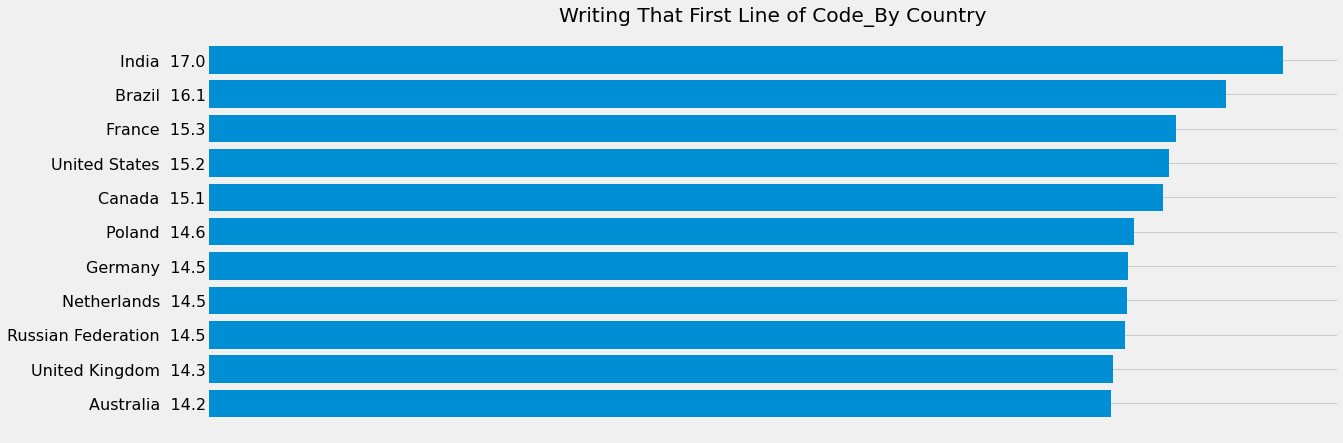

In [26]:
writing_1st_linecode = data["Age1stCode"]    #calling data from age of first code 
writing_1st_linecode.dropna(inplace = True) #filtering the data from empty and unnecessary answers

#creating list which contains countries that I want to get data from
countries = ["India"  , "Brazil" , "France" , "United States" , "Canada" , "Poland" , "Germany" , "Netherlands" , "Russian Federation" , "United Kingdom", "Australia"]

#empty lists to add related data later
key_Phrases=[]    
Quantity=[]



for i in countries:
    writing_1st_linecode_by_countries =  data[(writing_1st_linecode != "nan") & (data["Country"] == i) ]  #combining datas from first code age and country from previous list. 

    Writing_1st_linecode_by_countries = np.array(writing_1st_linecode_by_countries["Age1stCode"])  #transfers data in list
    Writing_1st_linecode_by_countries = np.where(Writing_1st_linecode_by_countries == "Younger than 5 years", 5, Writing_1st_linecode_by_countries) # changing "Younger than 5" variable as 5 year
    Writing_1st_linecode_by_countries = np.where(Writing_1st_linecode_by_countries == "Older than 85", 85,Writing_1st_linecode_by_countries ) # changing "Older than 85" variable as 85 years

    Writing_1st_linecode_by_countries = list(map( int, Writing_1st_linecode_by_countries)) #changing variables from string to integers

    number_of_people = len(Writing_1st_linecode_by_countries)  #number of respodents
    sum_all_ages = sum(Writing_1st_linecode_by_countries)      #sum all ages

    average_age = (sum_all_ages / number_of_people)   #calculating average age

    key_Phrases.append(i)   #adding counties from previous list as key phrases
    Quantity.append(average_age)  #adding average ages to quantity list

#reversing key phrases and quantity
key_Phrases.reverse()
Quantity.reverse()

    
Build_Barh_sizes_withot_percent (key_Phrases , Quantity  ,"fivethirtyeight", False , (18,7), "Writing That First Line of Code_By Country" ) #building barchart

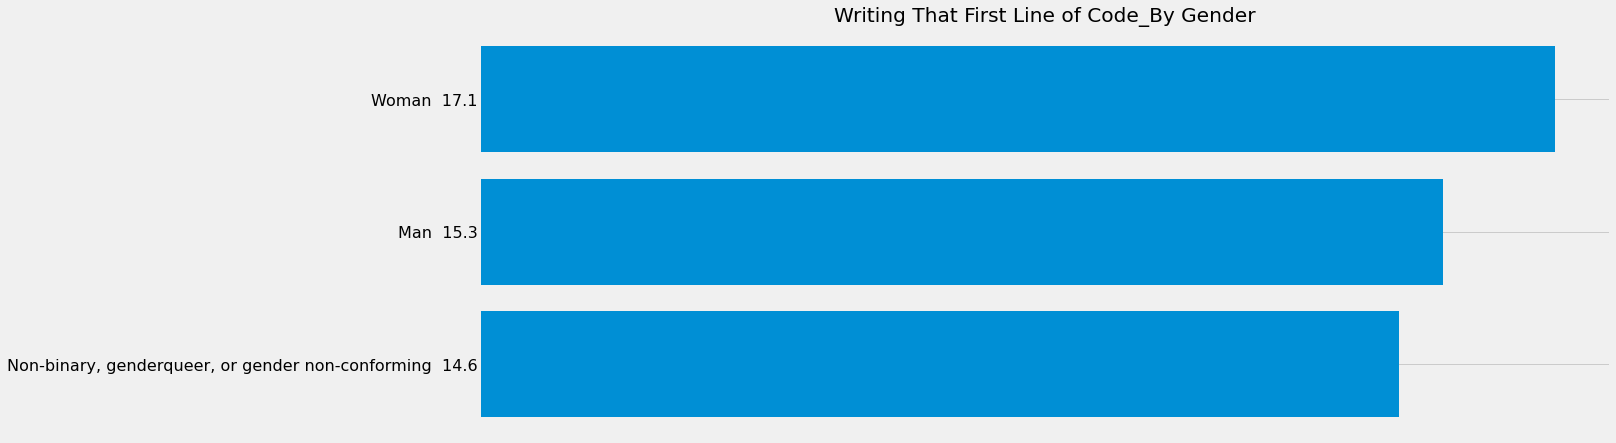

In [27]:
writing_1st_linecode = data["Age1stCode"] #calling data from age of first code 
writing_1st_linecode.dropna(inplace = True) #filtering the data from empty and unnecessary answers

#creating list which contains gender that I want to get data from
gender = ["Woman", "Man", "Non-binary, genderqueer, or gender non-conforming"]

#empty lists to add related data later
key_Phrases = []
Quantity = []

for i in gender:
    writing_1st_linecode_gender = data[(writing_1st_linecode != "nan")  & (data["Gender"] == i)] #combining datas from first code age and gender from previous list. 

    Writing_1st_linecode_gender = np.array(writing_1st_linecode_gender["Age1stCode"]) #transfers data in list
    Writing_1st_linecode_gender = np.where(Writing_1st_linecode_gender == "Younger than 5 years", 5, Writing_1st_linecode_gender)  # changing "Younger than 5" variable as 5 year
    Writing_1st_linecode_gender = np.where(Writing_1st_linecode_gender == "Older than 85", 85, Writing_1st_linecode_gender) # changing "Older than 85" variable as 85 years

    Writing_1st_linecode_gender = list(map(int, Writing_1st_linecode_gender)) #changing variables from string to integers

    number_of_people = len(Writing_1st_linecode_gender) #number of respodents
    ages_all = sum(Writing_1st_linecode_gender) #sum all ages 

    average_age =(ages_all / number_of_people)  #calculating average age

    key_Phrases.append(i)  #adding gender from previous list as key phrases
    Quantity.append(average_age) #adding average ages to quantity list

#reversing key phrases and quantity
key_Phrases.reverse()
Quantity.reverse()


Build_Barh_sizes_withot_percent (key_Phrases , Quantity  ,"fivethirtyeight", False , (18,7), "Writing That First Line of Code_By Gender" )  #building barchart

                                                 Education

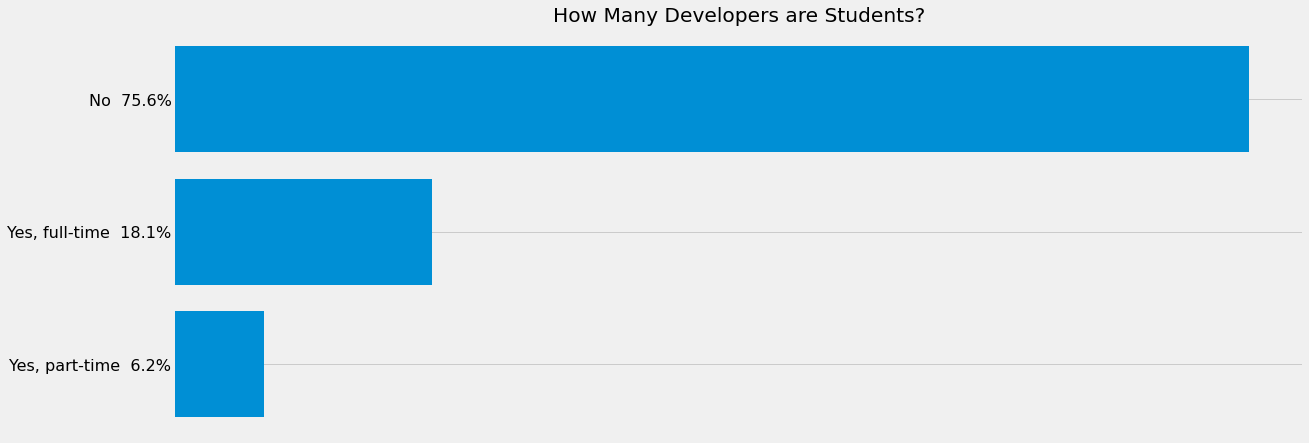

In [28]:
edu = data["Student"]  #calling data from students 
edu.dropna(inplace = True) #filtering the data from empty and unnecessary answers

counted = Counter(edu)   #writing in dictionary and counting 

items = counted.items() #rewriting data into lists

key_Phrases= []   # list to save key phrases
Quantity = []     # list to save quantity

#adding key phrases and quantity to relevant empty list
for item in items:
    key_Phrases.append(item[0])   #the data that is placed at "0" appends on key phrases
    Quantity.append(item[1])      #the data that is placed at "1" appends on Quantity 

#reversing key phrases and quantity
key_Phrases.reverse()
Quantity.reverse()

Build_Barh_sizes(key_Phrases, Quantity, edu, "fivethirtyeight", False , (18,7), "How Many Developers are Students?") #building barchart


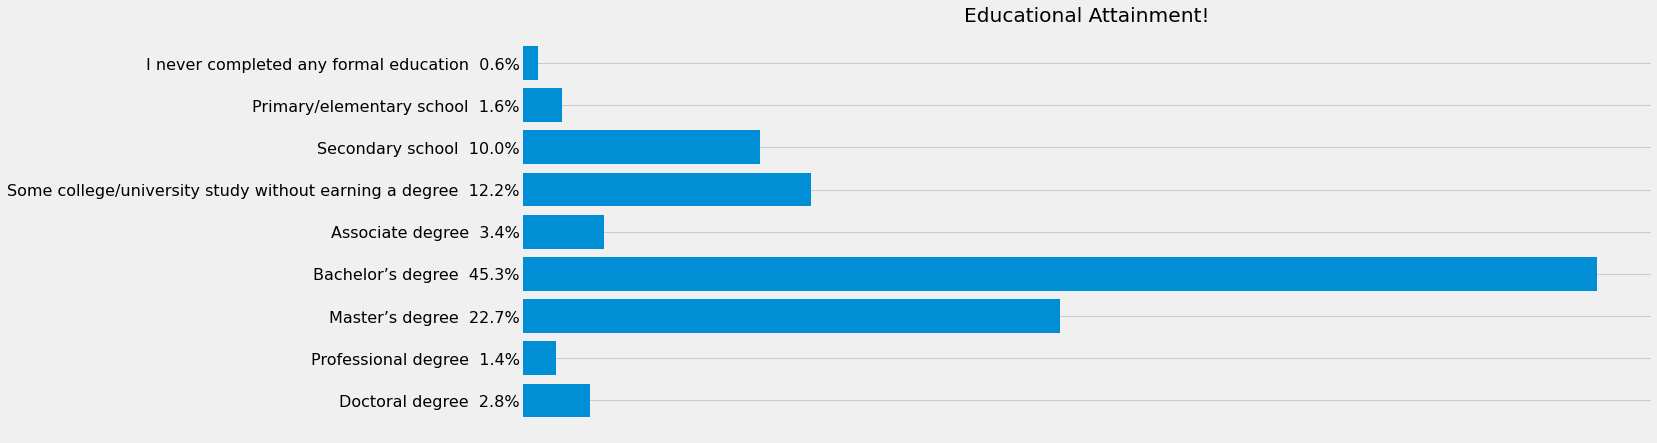

In [29]:
edu_level = data["EdLevel"]  #calling data fom educational level
edu_level.dropna(inplace = True) #filtering the data from empty and unnecessary answers

#rewriting data to be more convenient for reading. 
edu_level = np.where(edu_level == "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)", "Secondary school", edu_level)
edu_level = np.where(edu_level == "Bachelor’s degree (BA, BS, B.Eng., etc.)", "Bachelor’s degree", edu_level)
edu_level = np.where(edu_level == "Master’s degree (MA, MS, M.Eng., MBA, etc.)", "Master’s degree", edu_level)
edu_level = np.where(edu_level == "Professional degree (JD, MD, etc.)", "Professional degree", edu_level)
edu_level = np.where(edu_level == "Other doctoral degree (Ph.D, Ed.D., etc.)", "Doctoral degree", edu_level)

#writing relevant info for kay phrases by hand 
key_Phrases= ["I never completed any formal education", "Primary/elementary school" , "Secondary school",
"Some college/university study without earning a degree", "Associate degree", "Bachelor’s degree", 
"Master’s degree", "Professional degree", "Doctoral degree"]

counted = Counter(edu_level) #writing in dictionary and counting

Quantity = [] # list to save quantity

#reversing key phrases and quantity
key_Phrases.reverse()
Quantity.reverse()

for i in key_Phrases:
    Quantity.append(counted[i]) #adding data in quantity that is relevant for info in key phrases


Build_Barh_sizes(key_Phrases, Quantity, edu_level, "fivethirtyeight", False , (18,7), "Educational Attainment!") #building barchart

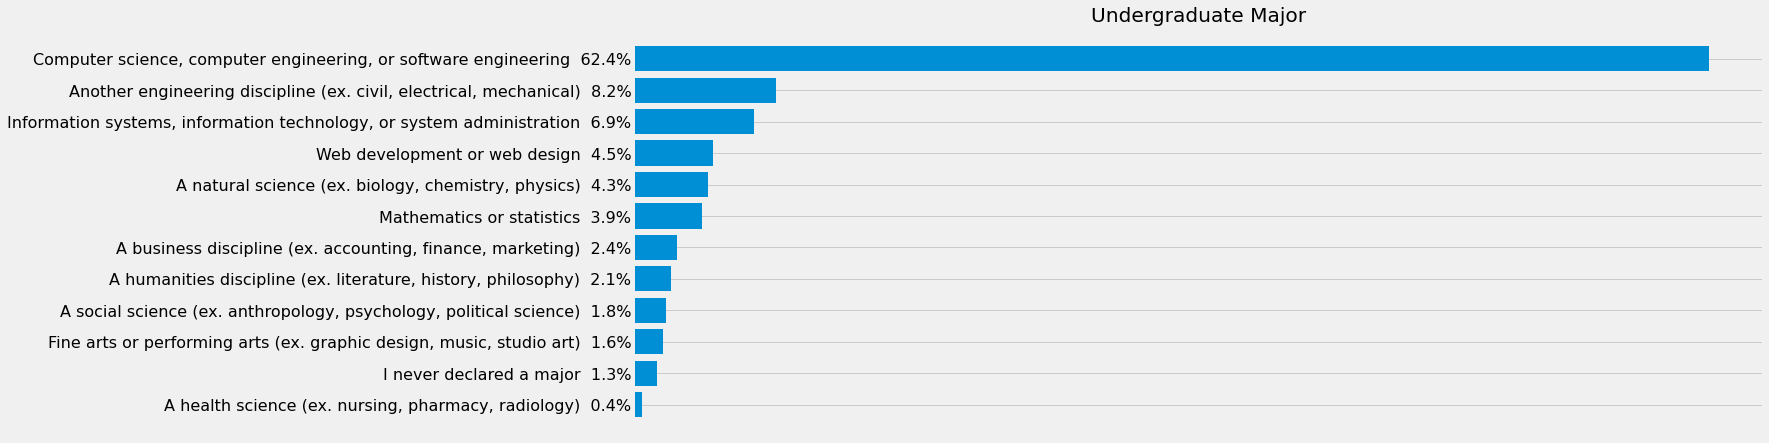

In [30]:
undergraduate_major = data["UndergradMajor"] #calling data fom undergraduate major 
undergraduate_major.dropna(inplace = True ) #filtering the data from empty and unnecessary answers

counted = Counter(undergraduate_major) #writing in dictionary and counting 

Counted_sorted = sort_dict_by_value(counted, False) #sorting data by growth/by reduction from OpenSourcer

items =  Counted_sorted.items()  #rewriting data into listsy

#empty lists to add related data later
key_Phrases = []
Quantity = []

#adding key phrases and quantity to relevant empty list
for item in items:
    key_Phrases.append(item[0])  #the data that is placed at "0" appends on key phrases
    Quantity.append(item[1])     #the data that is placed at "1" appends on Quantity 


Build_Barh_sizes(key_Phrases, Quantity, undergraduate_major, "fivethirtyeight", False , (18,7), "Undergraduate Major") #building barchart

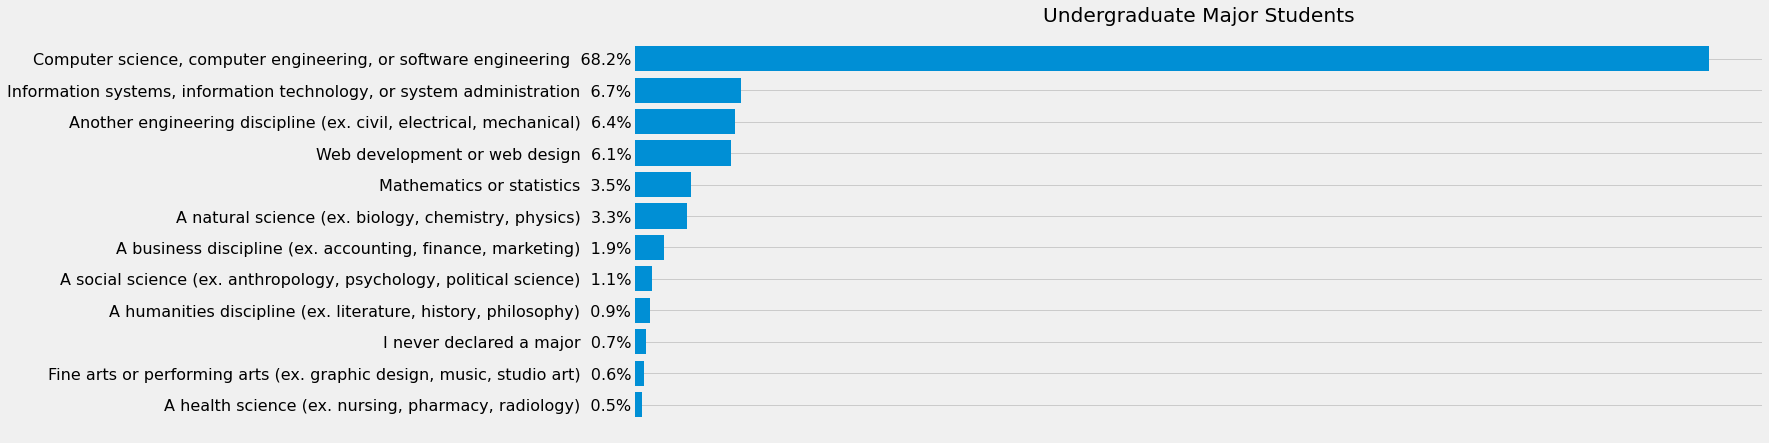

15764

In [31]:
undergraduate_major = data["UndergradMajor"] #calling data fom undergraduate major 
undergraduate_major.dropna(inplace = True)   #filtering the data from empty and unnecessary answers

undergraduate_major_students  = data[(undergraduate_major != "NaN") &  ((data ["Student"] == "Yes, full-time") | (data ["Student"] == "Yes, part-time"))]  #combinig undergraduate major and student's data 

Undergraduate_major_students = undergraduate_major_students["UndergradMajor"] #save the combined data in new variable

counted =  Counter(Undergraduate_major_students) #writing in dictionary and counting(for combined data)

counted_sorted = sort_dict_by_value(counted, False)  #sorting data by growth/by reduction

items = counted_sorted.items()  #rewriting data into lists

#empty lists to add related data later
key_Phrases = []
Quantity = []

#adding key phrases and quantity to relevant empty list
for item in items:
    key_Phrases.append(item[0])  #the data that is placed at "0" appends on key phrases
    Quantity.append(item[1])      #the data that is placed at "1" appends on Quantity 
 
Build_Barh_sizes(key_Phrases, Quantity, Undergraduate_major_students, "fivethirtyeight", False , (18,7), "Undergraduate Major Students") #building barchart 

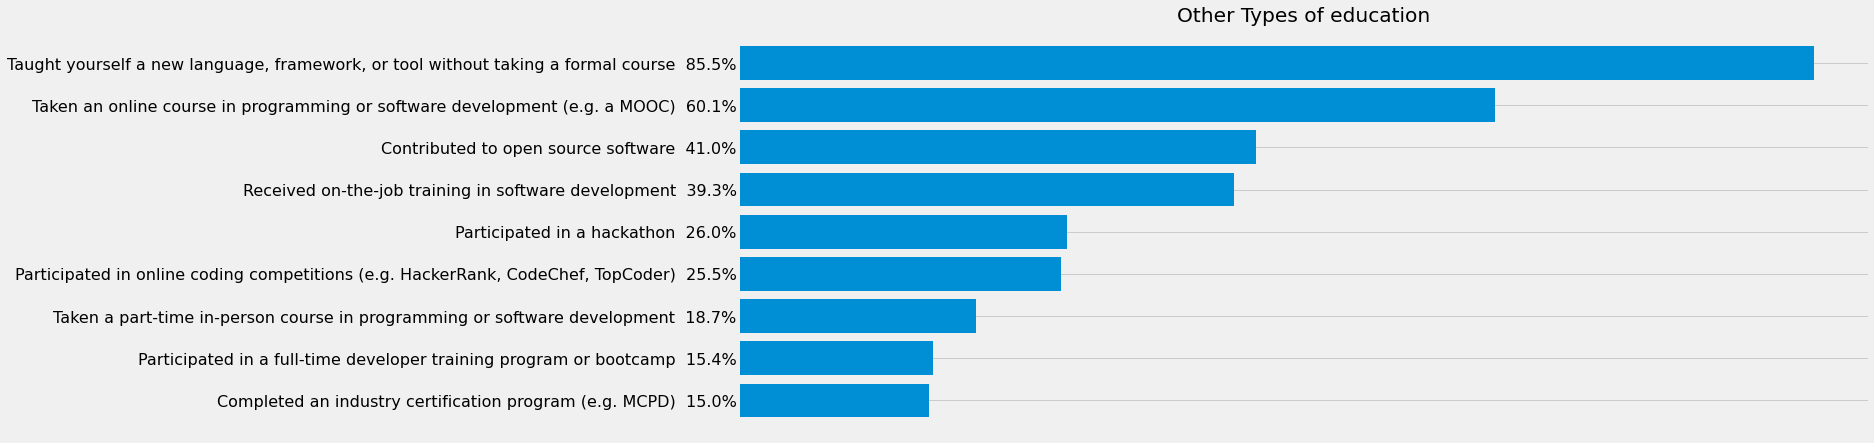

In [32]:
other_types_of_education =  data["EduOther"]     #calling data fom other types of education
other_types_of_education.dropna(inplace = True)  #filtering the data from empty and unnecessary answers

other_types_of_education = other_types_of_education.str.split(";") #fracturing where ";"- s show up and write fractured data in lists

list_sorter_counter(other_types_of_education) #autosorting



Build_Barh_sizes(key_Phrases, Quantity, other_types_of_education, "fivethirtyeight", False , (18,7), "Other Types of education") #building barchart

                                                 Ethnicity

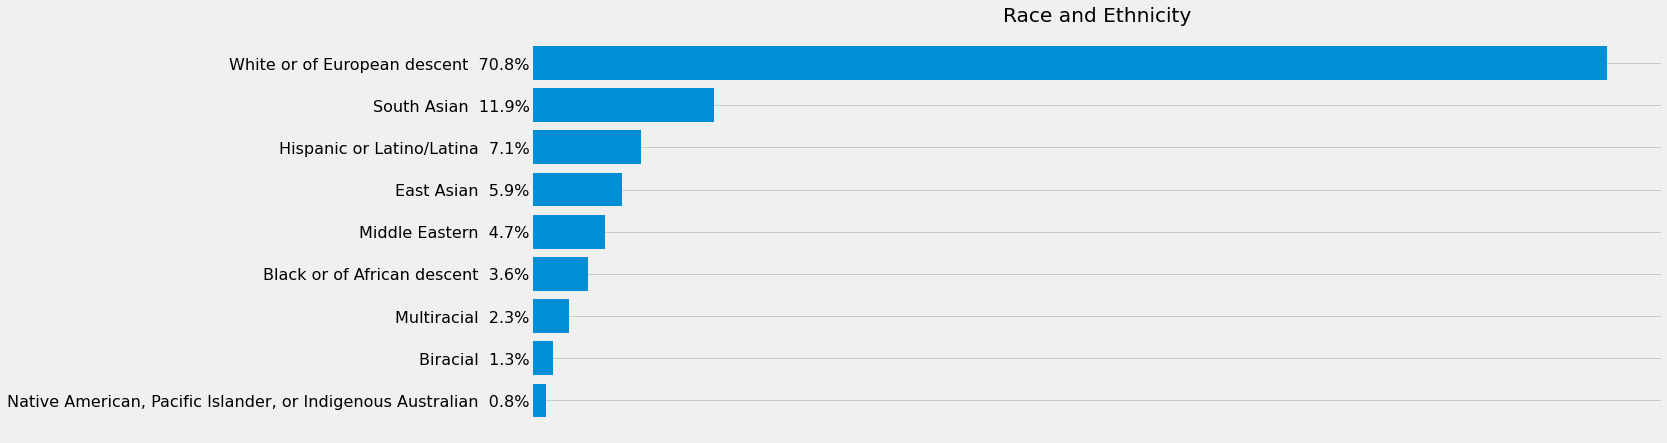

In [33]:
race_and_ethnicity = data["Ethnicity"] #calling data from ethnicity
race_and_ethnicity.dropna(inplace = True) #filtering the data from empty and unnecessary answers

race_and_ethnicity = race_and_ethnicity.str.split(";") #fracturing where ";"- s show up and write fractured data in lists

list_sorter_counter(race_and_ethnicity) #autosorting

Build_Barh_sizes(key_Phrases, Quantity, race_and_ethnicity, "fivethirtyeight", False , (18,7), "Race and Ethnicity") #building barchart

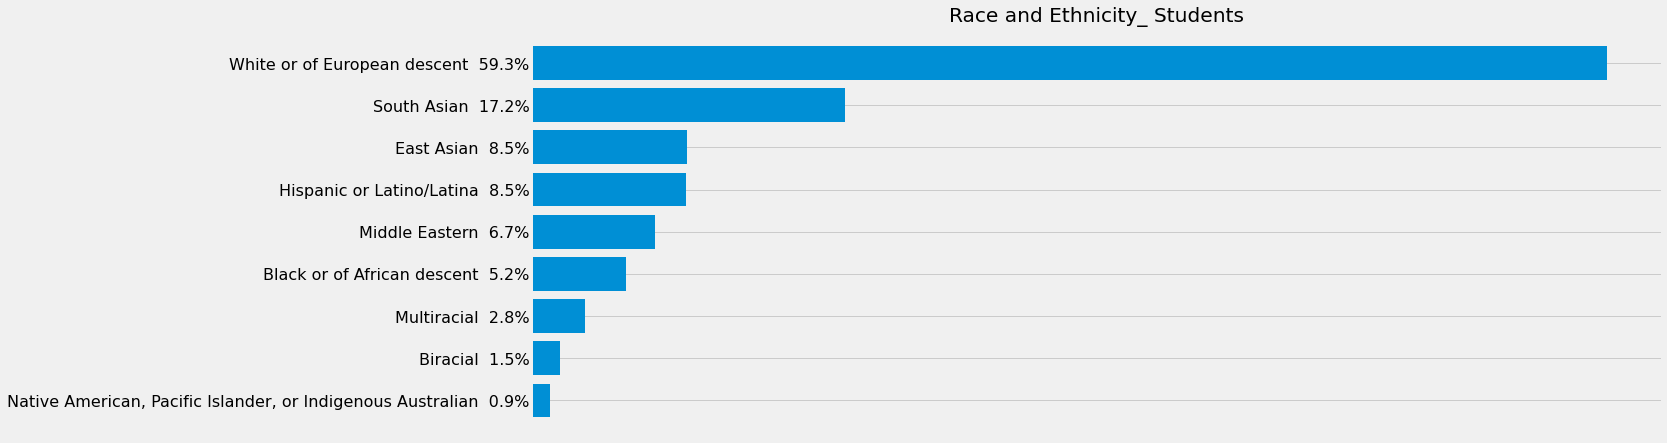

In [34]:
race_and_ethnicity = data["Ethnicity"]  #calling data from ethnicity
race_and_ethnicity.dropna(inplace = True) #filtering the data from empty and unnecessary answers

race_etcn_europe  = data[(race_and_ethnicity != "NaN") &  ((data ["Student"] == "Yes, full-time") | (data ["Student"] == "Yes, part-time"))]  #combining ethnicity and student's data 
Race_etnc_europ = race_etcn_europe["Ethnicity"] #save the combined data in new variable

Race_etnc_europ = Race_etnc_europ.str.split(";")  #fracturing where ";"- s show up and write fractured data in lists

list_sorter_counter(Race_etnc_europ) #autosorting

Build_Barh_sizes(key_Phrases, Quantity, Race_etnc_europ, "fivethirtyeight", False , (18,7), "Race and Ethnicity_ Students") #building barchart


                                                Gender

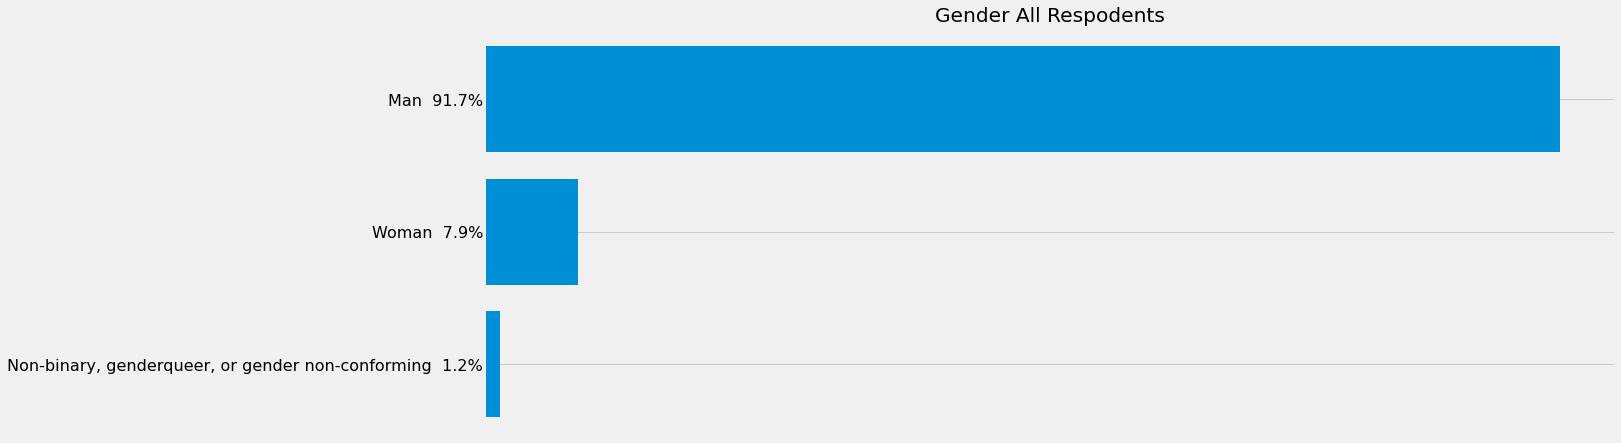

In [35]:
gender = data ["Gender"] #calling data from gender 
gender.dropna(inplace = True ) #filtering the data from empty and unnecessary answers

gender = gender.str.split(";")  #fracturing where ";"- s show up and write fractured data in lists

list_sorter_counter(gender) #autosorting

Build_Barh_sizes(key_Phrases, Quantity, gender, "fivethirtyeight", False , (18,7), "Gender All Respodents") #building barchart

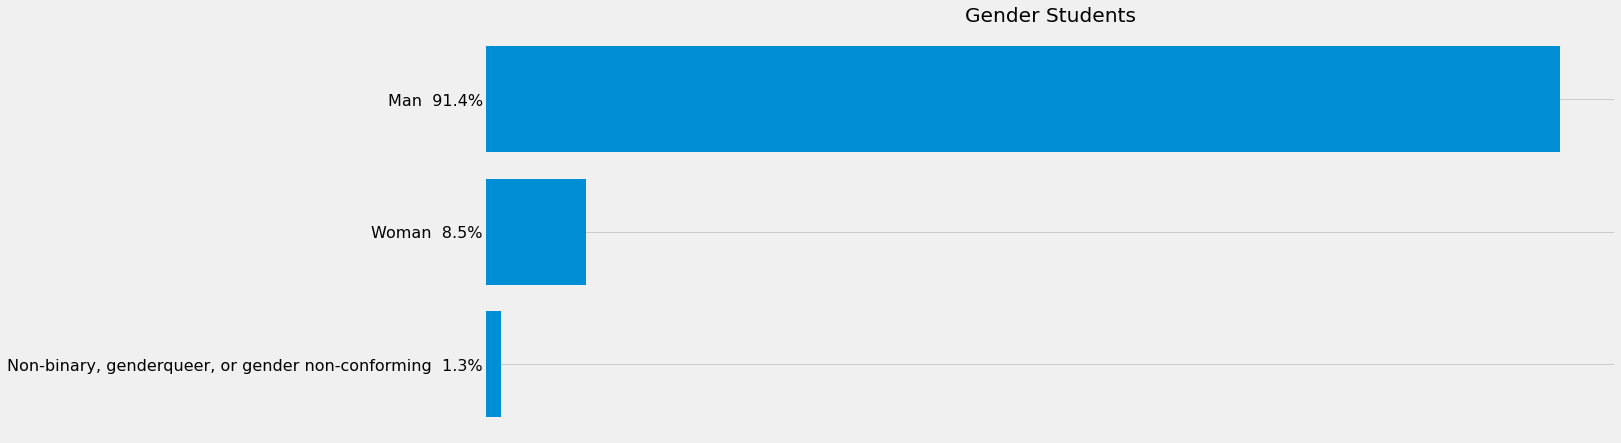

In [36]:
gender = data ["Gender"]  #calling data from gender 
gender.dropna(inplace = True ) #filtering the data from empty and unnecessary answers

gender_students = data[(gender  != "NaN")  & ((data ["Student"] == "Yes, full-time") | (data ["Student"] == "Yes, part-time"))]  #combining gender and student's data 

Gender_students = gender_students["Gender"] #save the combined data in new variable

Gender_students = Gender_students.str.split(";") #fracturing where ";"- s show up and write fractured data in lists

list_sorter_counter(Gender_students) #autosorting

Build_Barh_sizes(key_Phrases, Quantity, Gender_students, "fivethirtyeight", False , (18,7), "Gender Students") #building barchart

                                            Experience and Gender

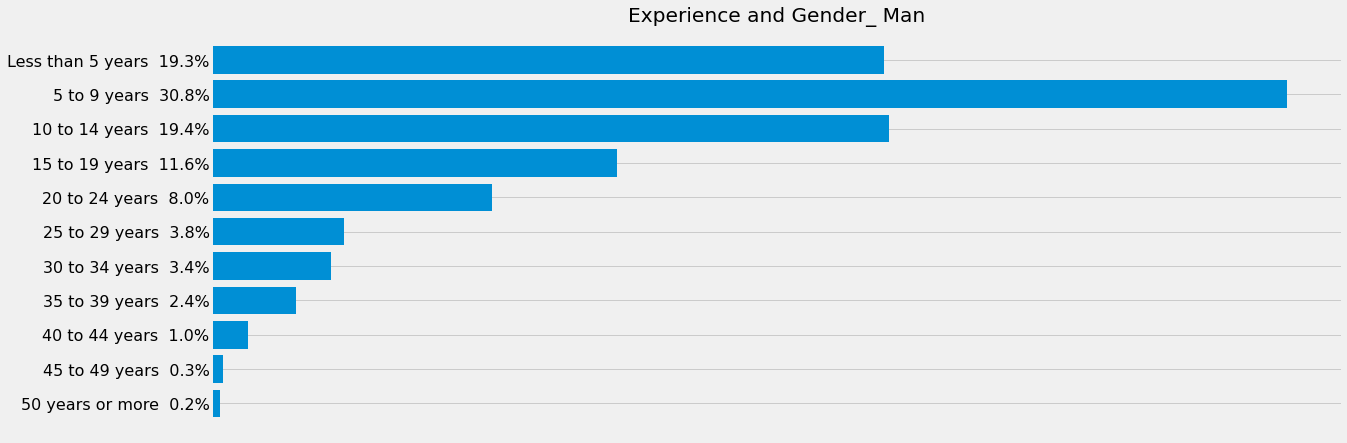

In [37]:
years_of_coding = data["YearsCode"]  #calling data from years of coding
years_of_coding.dropna(inplace = True) #filtering the data from empty and unnecessary answers

yearscode_men = data[(years_of_coding != "nan") & (data["Gender"] == "Man")] #combining years of coding and gender's data 
Yearscode_men = yearscode_men["YearsCode"] #save the combined data in new variable

Yearscode_men = np.where(Yearscode_men == "Less than 1 year", "1", Yearscode_men) # changing "less than 1 year" variable as 1 year
Yearscode_men = np.where(Yearscode_men == "More than 50 years", "50", Yearscode_men)  # changing "more then 50 years" variable as 50 years

#calling the function to sort the data
logics_for_years_of_coding(Yearscode_men)

#reversing key phrases and quantity 
key_Phrases.reverse()
Quantity.reverse() 

Build_Barh_sizes(key_Phrases, Quantity, Yearscode_men, "fivethirtyeight", False , (18,7), "Experience and Gender_ Man") #building barchart

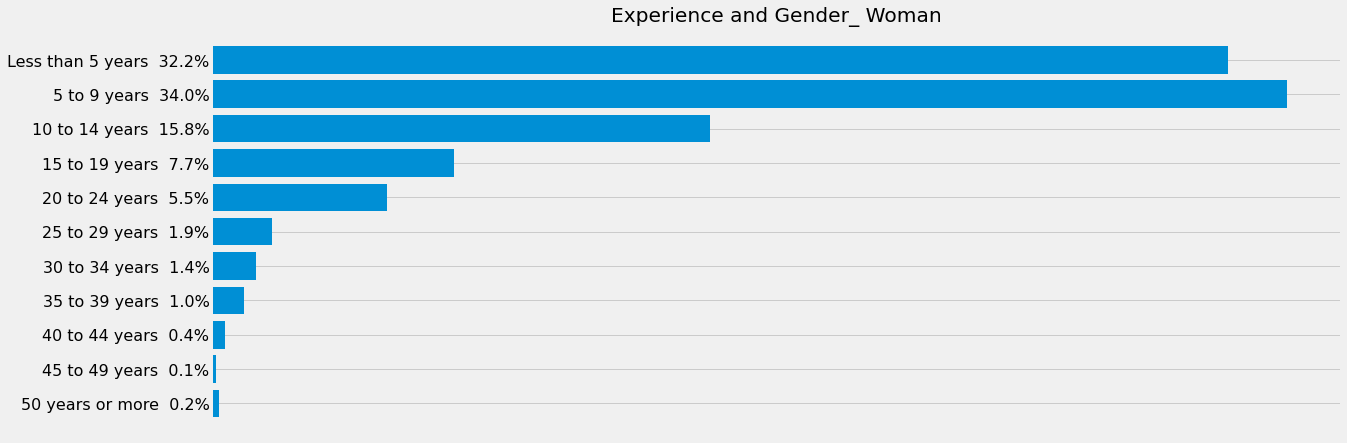

In [38]:
years_of_coding = data["YearsCode"] #calling data from years of coding
years_of_coding.dropna(inplace = True) #filtering the data from empty and unnecessary answers

yearscode_woman = data[(years_of_coding != "nan") & ((data["Gender"] == "Woman") | (data["Gender"] == "Woman;Man") | 
(data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming") | (data["Gender"] == "Woman;Non-binary, genderqueer, or gender non-conforming"))]  #combining years of coding and gender's data 
Yearscode_woman = yearscode_woman["YearsCode"] #save the combined data in new variable

Yearscode_woman = np.where(Yearscode_woman == "Less than 1 year", "1", Yearscode_woman) # changing "less than 1 year" variable as 1 year
Yearscode_woman = np.where(Yearscode_woman == "More than 50 years", "50", Yearscode_woman) # changing "more then 50 years" variable as 50 years

#calling the function to sort the data
logics_for_years_of_coding(Yearscode_woman)

#reversing key phrases and quantity 
key_Phrases.reverse()
Quantity.reverse() 

Build_Barh_sizes(key_Phrases, Quantity, Yearscode_woman, "fivethirtyeight", False , (18,7), "Experience and Gender_ Woman") #building barchart

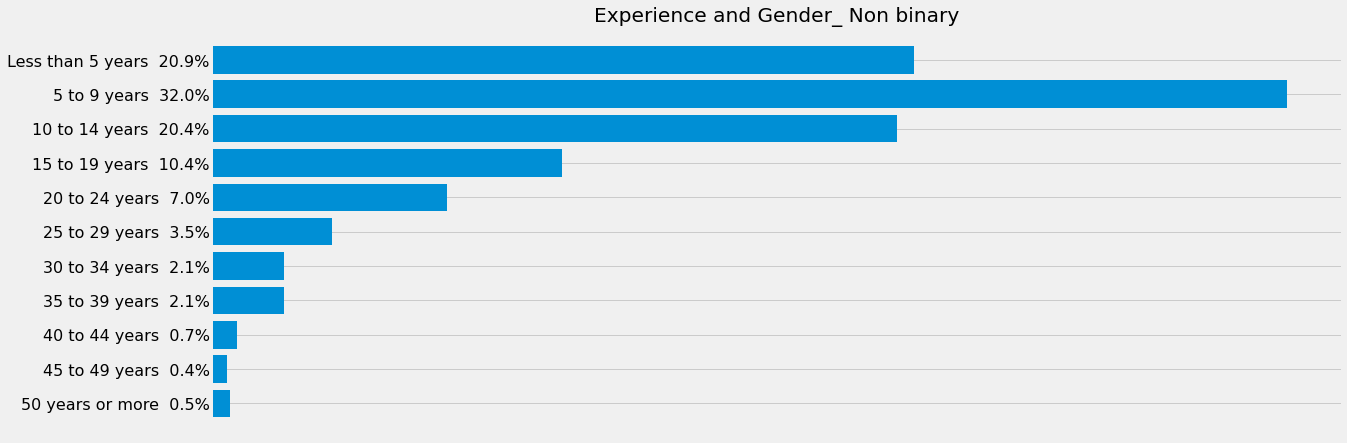

In [39]:
years_of_coding = data["YearsCode"] #calling data from years of coding
years_of_coding.dropna(inplace = True) #filtering the data from empty and unnecessary answers

yearscode_non_binary = data[(years_of_coding != "nan") & ((data["Gender"] == "Non-binary, genderqueer, or gender non-conforming") | (data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming") | 
(data["Gender"] == "Man;Non-binary, genderqueer, or gender non-conforming") | (data["Gender"] == "Woman;Non-binary, genderqueer, or gender non-conforming"))] #combining years of coding and gender's data 
Yearscode_non_binary = yearscode_non_binary["YearsCode"] #save the combined data in new variable

Yearscode_non_binary = np.where(Yearscode_non_binary == "Less than 1 year", "1", Yearscode_non_binary) # changing "less than 1 year" variable as 1 year
Yearscode_non_binary = np.where(Yearscode_non_binary == "More than 50 years", "50", Yearscode_non_binary) # changing "more then 50 years" variable as 50 years

#calling the function to sort the data
logics_for_years_of_coding(Yearscode_non_binary)

#reversing key phrases and quantity 
key_Phrases.reverse()
Quantity.reverse() 

Build_Barh_sizes(key_Phrases, Quantity, Yearscode_non_binary, "fivethirtyeight", False , (18,7), "Experience and Gender_ Non binary") #building barchart

                                                Sexual Orientation

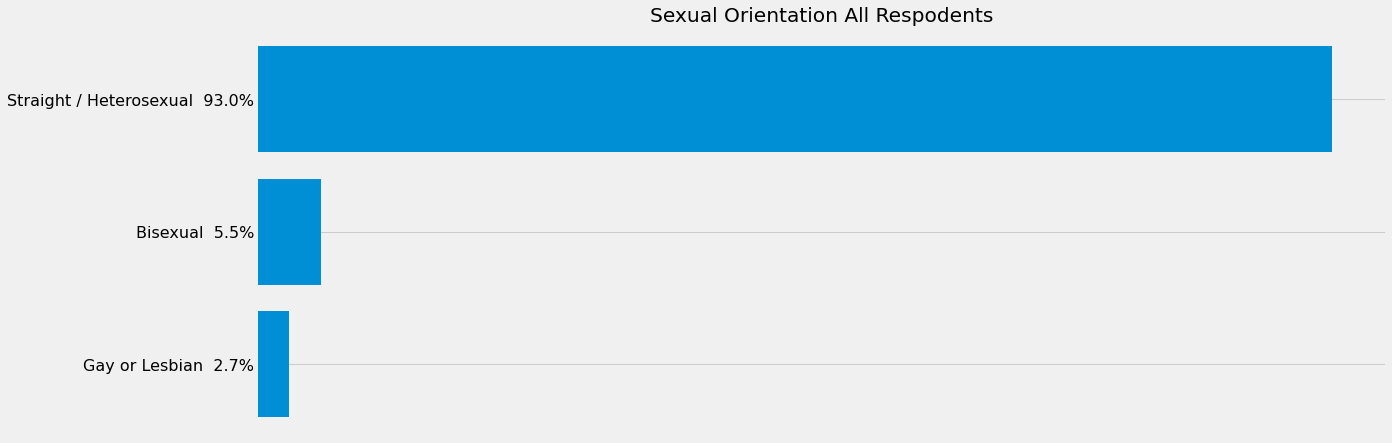

In [40]:
sexual_orientation = data["Sexuality"]  #calling data from sexuality
sexual_orientation.dropna(inplace = True )  #filtering the data from empty and unnecessary answers

sexual_orientation = sexual_orientation.str.split(";") #fracturing where ";"- s show up and write fractured data in lists

list_sorter_counter(sexual_orientation) #autosorting 

Build_Barh_sizes(key_Phrases, Quantity, sexual_orientation, "fivethirtyeight", False , (18,7), "Sexual Orientation All Respodents") #building barcart

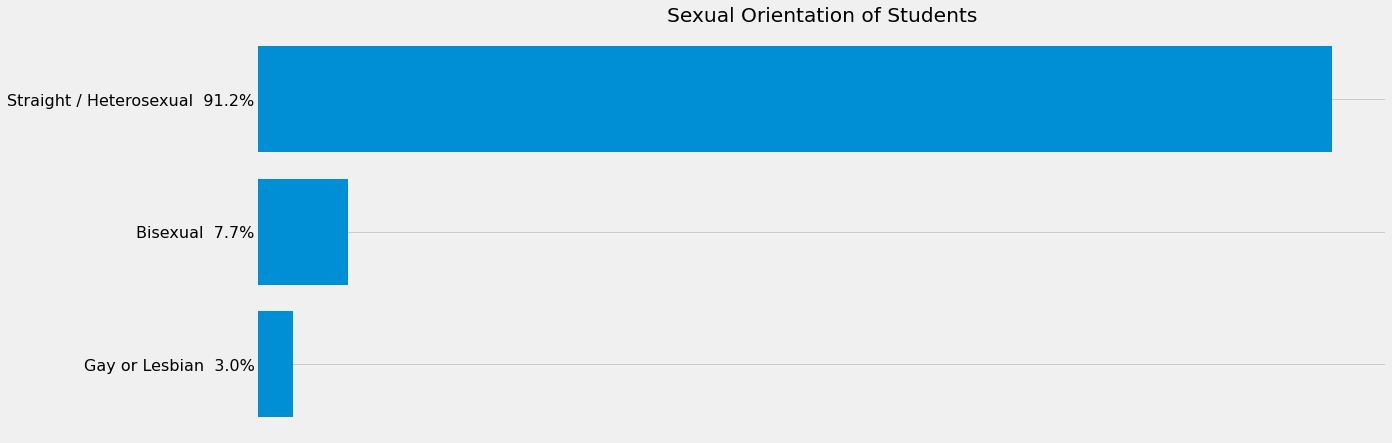

In [41]:
sexual_orientation = data["Sexuality"] #calling data from sexuality
sexual_orientation.dropna(inplace = True ) #filtering the data from empty and unnecessary answers

sexual_orientation_students = data[(sexual_orientation  != "NaN")  & ((data ["Student"] == "Yes, full-time") | (data ["Student"] == "Yes, part-time"))] #combining sexuality and student's data 
Sexual_orientation_students = sexual_orientation_students["Sexuality"]  #save the combined data in new variable 

Sexual_orientation_students = Sexual_orientation_students.str.split(";") #fracturing where ";"- s show up and write fractured data in lists

list_sorter_counter(Sexual_orientation_students) #autosorting

Build_Barh_sizes(key_Phrases, Quantity, Sexual_orientation_students, "fivethirtyeight", False , (18,7), "Sexual Orientation of Students") #building barchart


                                                    Age

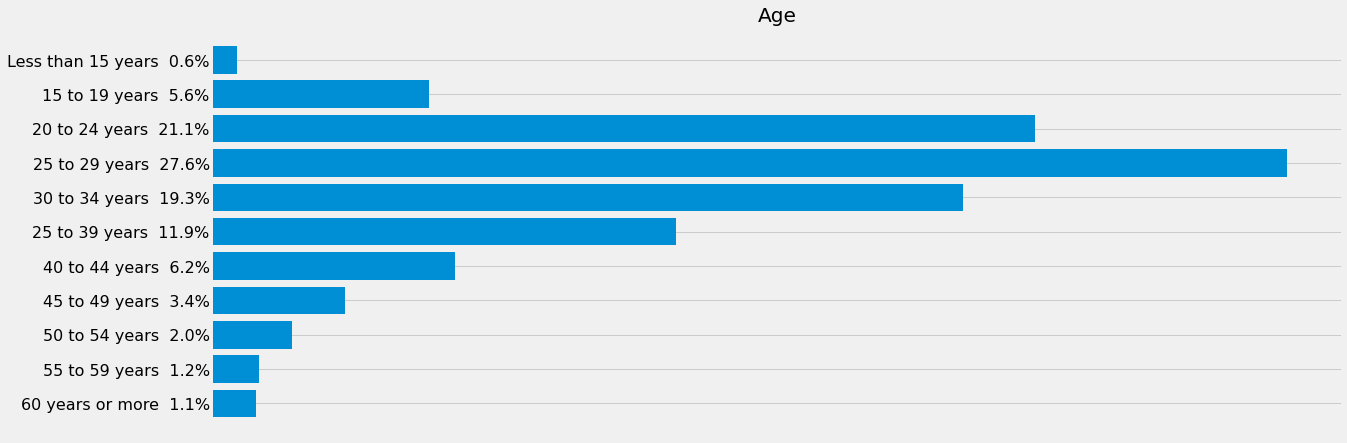

In [42]:
age = data["Age"]  #calling data from age
age.dropna(inplace = True)  #filtering the data from empty and unnecessary answers

#creating the function where is written logics for sorting data
def logics_for_ages(age):
    #Creating empty lists with specific ages where the related data will be placed  
    less_than_15 = []
    fifteen_to_19 = []
    twenty_to_24 = []
    twentyfive_to_29 = []
    thirty_to_34 = []
    thirtyfive_to_39 = []
    fourty_to_44 = []
    fourtyfive_to_49 = []
    fifty_to_54 = []
    fiftyfive_to_59 = []
    more_than_60 = []

    #adding data to related lists 
    for i in age:
        if int(i) in list(range(0,15)):
            less_than_15.append(i)
        elif int(i) in list(range(15,20)):
            fifteen_to_19.append(i)
        elif int(i) in list(range(20,25)):
            twenty_to_24.append(i)
        elif int(i) in list(range(25,30)):
            twentyfive_to_29.append(i)
        elif int(i) in list(range (20,25)):
            twenty_to_24.append(i)
        elif int(i) in list(range(25,30)):
            twentyfive_to_29.append(i)
        elif int(i) in list(range (30,35)):
            thirty_to_34.append(i)
        elif int(i) in list(range (35,40)):
            thirtyfive_to_39.append(i)
        elif int(i) in list(range (40,45)):
            fourty_to_44.append(i)
        elif int(i) in list(range(45,50)):
            fourtyfive_to_49.append(i)
        elif int(i) in list(range(50,55)):
            fifty_to_54.append(i)
        elif int(i) in list(range(55,60)):
            fiftyfive_to_59.append(i)
        else:
            more_than_60.append(i)

    #defining length of the lists that have been created after adding data  
    len_less_than_15 = len(less_than_15)
    len_fifteen_to_19 = len(fifteen_to_19)
    len_twenty_to_24 = len(twenty_to_24)
    len_twentyfive_to_29 = len(twentyfive_to_29)
    len_thirty_to_34 = len(thirty_to_34)
    len_thirtyfive_to_39 = len(thirtyfive_to_39)
    len_fourty_to_44 = len(fourty_to_44)
    len_fourtyfive_to_49 = len(fourtyfive_to_49)
    len_fifty_to_54 = len(fifty_to_54)
    len_fiftyfive_to_59 = len(fiftyfive_to_59)
    len_more_than_60 = len(more_than_60)
    
    global key_Phrases    #declaring key phrases as global 
    global Quantity       #declaring Quantity as global 

    #writing the key phrases and quantity iformation by hand 
    # where the key phrases are presented as list with specific ages in it 
    #and quantity is the list with the length of the lists where the data was added  
    key_Phrases = ["Less than 15 years", "15 to 19 years", "20 to 24 years", "25 to 29 years", "30 to 34 years", "25 to 39 years", 
                 "40 to 44 years", "45 to 49 years", "50 to 54 years", "55 to 59 years", "60 years or more"]
    Quantity = [len_less_than_15, len_fifteen_to_19, len_twenty_to_24, len_twentyfive_to_29, len_thirty_to_34, len_thirtyfive_to_39,
               len_fourty_to_44, len_fourtyfive_to_49, len_fifty_to_54, len_fiftyfive_to_59, len_more_than_60 ]

#calling the function to sort the data
logics_for_ages(age)

#reversing key phrases and quantity 
key_Phrases.reverse()
Quantity.reverse()

Build_Barh_sizes(key_Phrases, Quantity, age, "fivethirtyeight", False , (18,7), "Age") #building barchart


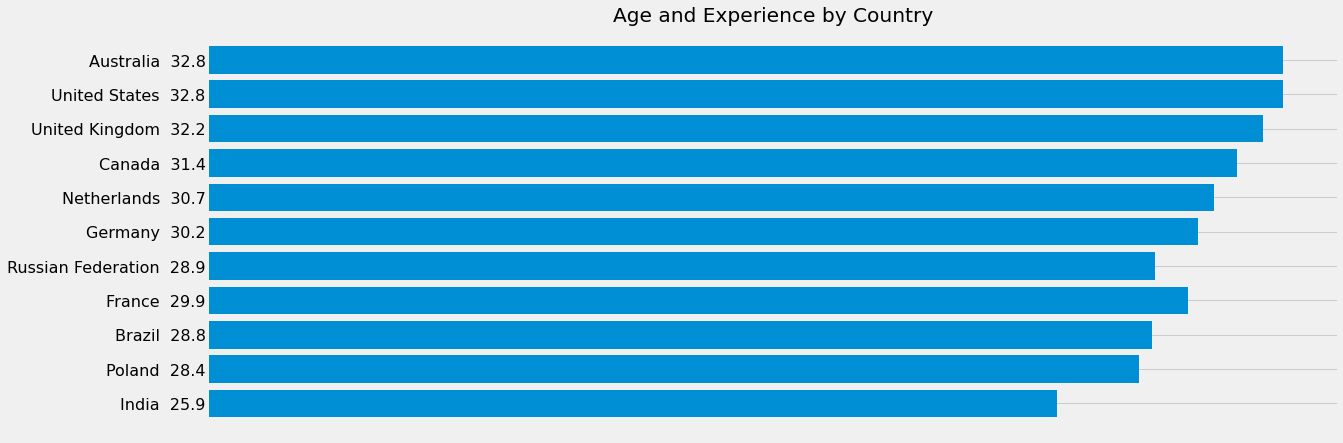

In [43]:
age = data["Age"] #calling data from age
age.dropna(inplace = True)  #filtering the data from empty and unnecessary answers

#creating list which contains countries that I want to get data from
Countries = ["India"  ,  "Poland"  , "Brazil" , "France",  "Russian Federation" , "Germany" , "Netherlands" , "Canada", "United Kingdom" , "United States" , "Australia"]

#empty lists to add related data later     
key_Phrases = []
Quantity = []


for i in Countries:
    age_by_countries = data[(age != "nan") & (data["Country"] == i)] #combining datas from  age and country from previous list. 
    Age_by_countries = np.array(age_by_countries ["Age"])  #transfers data in list
    Age_by_countries = list(map(int, Age_by_countries)) #changing variables from string to integers

    number_of_people = len(Age_by_countries)  #number of respodents
    all_ages = sum(Age_by_countries)           #sum all ages

    average_age =round(all_ages / number_of_people , 1)  #calculating average age

    key_Phrases.append(i)        #adding counties from previous list as key phrases
    Quantity.append(average_age) #adding average ages to quantity list

Build_Barh_sizes_withot_percent( key_Phrases , Quantity ,"fivethirtyeight", False , (18,7), "Age and Experience by Country") #building barchart

                                                Competence 

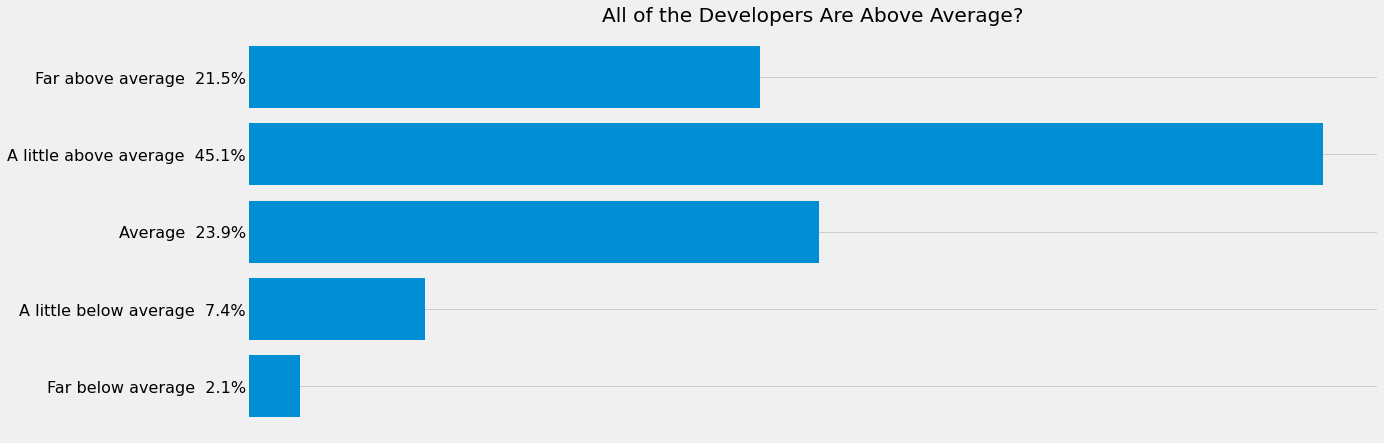

In [44]:
if_above_average  = data["ImpSyn"]  #calling data from "ImpSyn"
if_above_average.dropna(inplace = True) #filtering the data from empty and unnecessary answers

counted = Counter(if_above_average)  #writing in dictionary and counting 

key_Phrases = ["Far above average", "A little above average", "Average", "A little below average", "Far below average"]  #writing key phrases in specific sequence 
Quantity = [] #empty list to add quantity later 

#reversing key phrases and quantity 
key_Phrases.reverse()
Quantity.reverse()

#adding  quantity to relevant empty list
for i in key_Phrases:
    Quantity.append(counted[i]) #the data that is placed at the place of "i" in key phrases appends on Quantity


Build_Barh_sizes(key_Phrases, Quantity, if_above_average, "fivethirtyeight", False , (18,7), "All of the Developers Are Above Average?") #building barchart


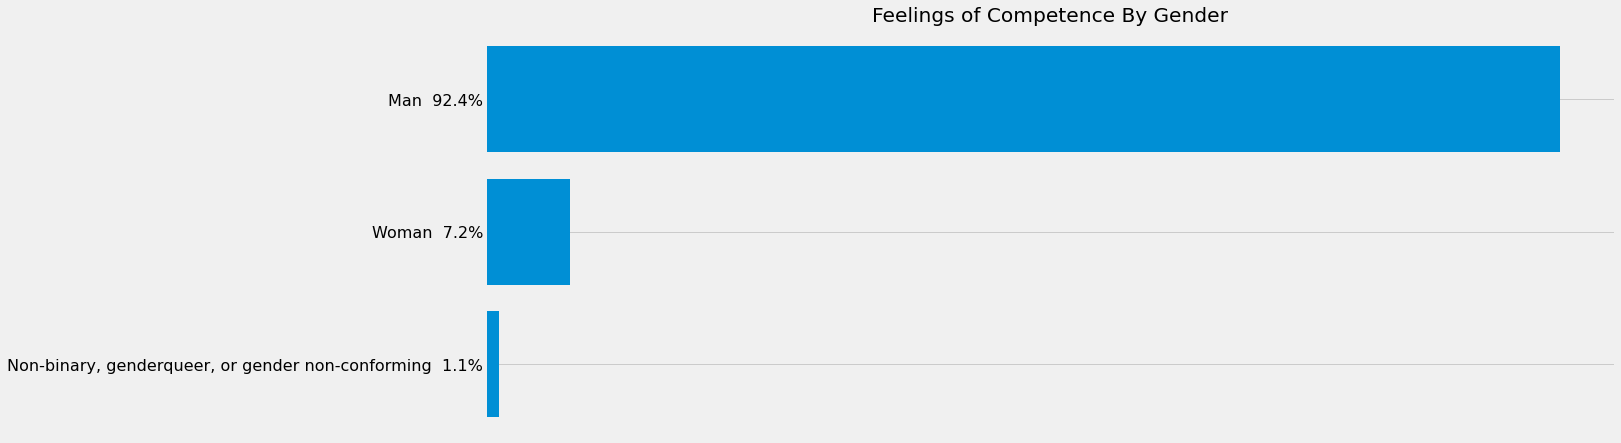

In [45]:
gender = data ["Gender"] #calling data from gender
gender.dropna(inplace = True ) #filtering the data from empty and unnecessary answers

#combinig gender and competence data together
gender_competence  = data[(gender  != "NaN")  & ((data ["ImpSyn"] == "Far above average") | (data ["ImpSyn"] == "A little above average") | (data ["ImpSyn"] == "Average") )]
Gender_competence = gender_competence["Gender"] #save the combined data in new variable

Gender_competence = Gender_competence.str.split(";") #fracturing where ";"- s show up and write fractured data in lists

list_sorter_counter(Gender_competence) #autosorting 

Build_Barh_sizes(key_Phrases, Quantity, Gender_competence, "fivethirtyeight", False , (18,7), "Feelings of Competence By Gender") #building barchart



                                             Life Outside Work

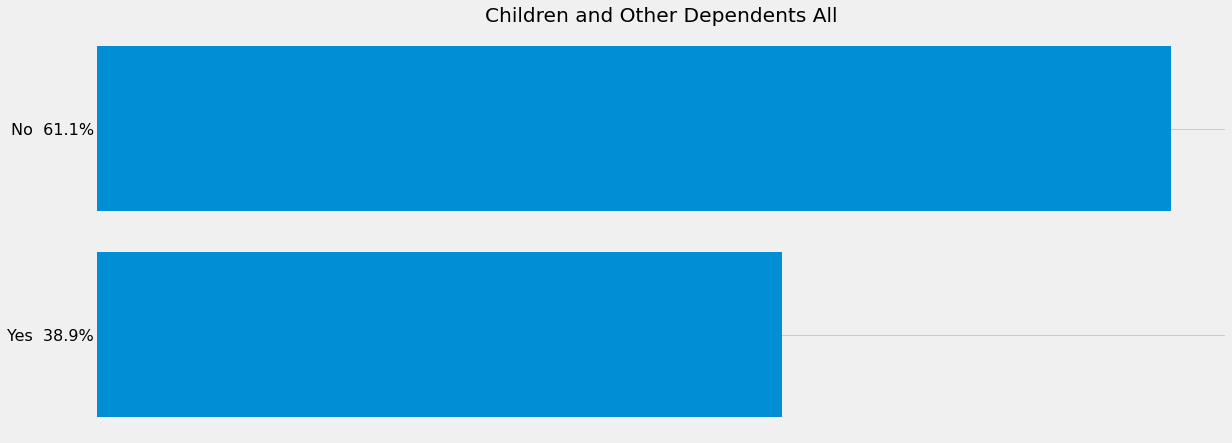

In [46]:
dependents = data["Dependents"]  #calling data from dependents 
dependents.dropna( inplace = True)  #filtering the data from empty and unnecessary answers


counted = Counter(dependents) #writing in dictionary and counting 

items = counted.items()   #rewriting data into lists

key_Phrases = [] # list to save key phrases
Quantity = []    # list to save quantity

#adding key phrases and quantity to relevant empty list
for item in items:
    key_Phrases.append(item[0])  #the data that is placed at "0" appends on key phrases
    Quantity.append(item[1])      #the data that is placed at "1" appends on Quantity 

#reversing key phrases and quantity 
key_Phrases.reverse()
Quantity.reverse()


Build_Barh_sizes(key_Phrases, Quantity, dependents, "fivethirtyeight", False , (18,7), "Children and Other Dependents All") #buildng barchart


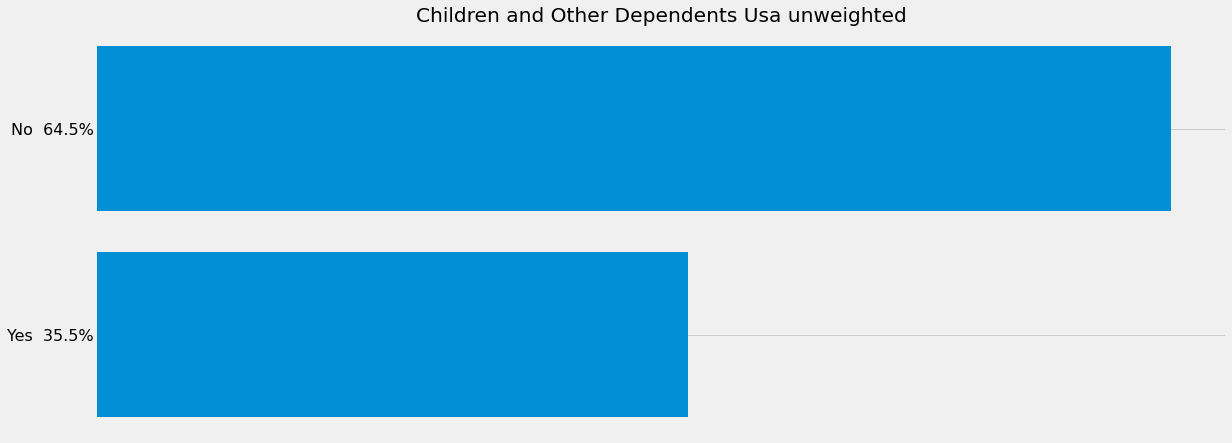

In [47]:
dependents = data["Dependents"] #calling data from dependents 
dependents.dropna( inplace = True)  #filtering the data from empty and unnecessary answers

dependents_usa =  data[(dependents != "NaN") & (data ["Country"] == "United States")] #combinig dependents and USA data together

Dependents_usa = dependents_usa["Dependents"]  #save the combined data in new variable

counted = Counter(Dependents_usa)   #writing in dictionary and counting 

items = counted.items()  #rewriting data into lists

key_Phrases = [] # list to save key phrases
Quantity = []    # list to save quantity


#adding key phrases and quantity to relevant empty list
for item in items:
    key_Phrases.append(item[0])  #the data that is placed at "0" appends on key phrases
    Quantity.append(item[1])      #the data that is placed at "1" appends on Quantity 

#reversing key phrases and quantity 
key_Phrases.reverse()
Quantity.reverse()

Build_Barh_sizes(key_Phrases, Quantity, Dependents_usa, "fivethirtyeight", False , (18,7), "Children and Other Dependents Usa unweighted") #building barchart


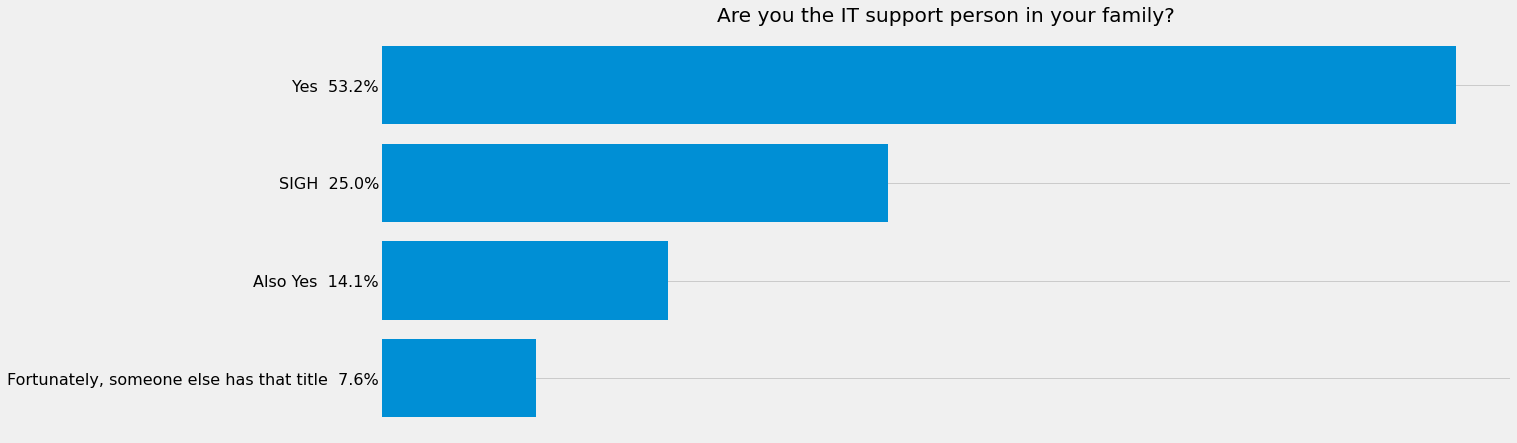

In [48]:
it_sup = data["ITperson"]   #calling data from ITperson
it_sup.dropna(inplace = True) #filtering the data from empty and unnecessary answers

counted  = Counter(it_sup)  #writing in dictionary and counting 

counted_sorted = sort_dict_by_value(counted, True) #sorting data by growth/by reduction 
items = counted_sorted.items() #rewritingdata into lists

key_Phrases = [] # list to save key phrases
Quantity = []    # list to save quantity

#adding key phrases and quantity to relevant empty list
for item in items:
    key_Phrases.append(item[0])   #the data that is placed at "0" appends on key phrases
    Quantity.append(item[1])      #the data that is placed at "1" appends on Quantity 

#reversing key phrases and quantity 
key_Phrases.reverse()
Quantity.reverse()

Build_Barh_sizes(key_Phrases, Quantity, it_sup, "fivethirtyeight", False , (18,7), "Are you the IT support person in your family?") #building barchart


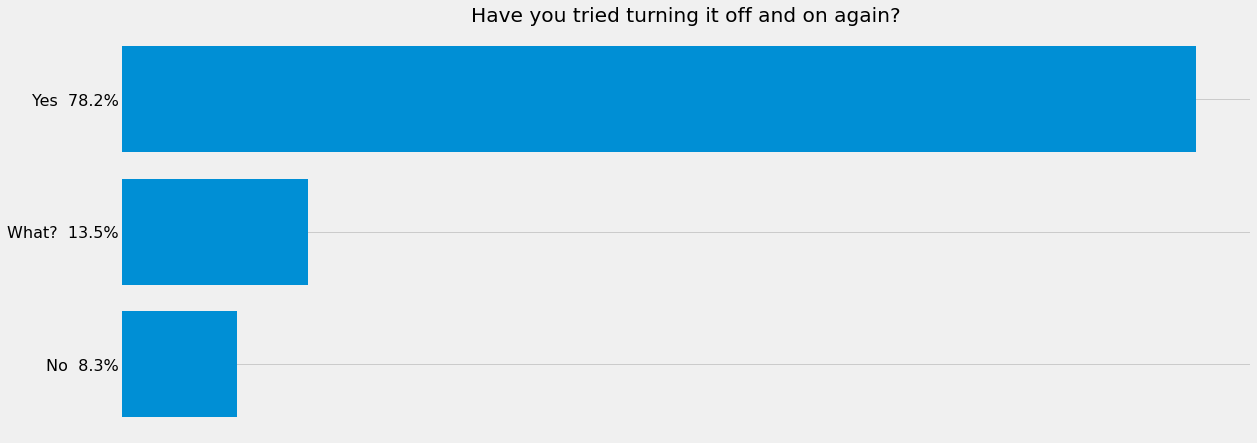

In [49]:
on_off = data["OffOn"]         #calling data from "OffOn"
on_off.dropna(inplace = True ) #filtering the data from empty and unnecessary answers

counted = Counter(on_off)       #writing in dictionary and counting 
counted_sorted = sort_dict_by_value(counted, True)   #sorting data by growth/by reduction 

items = counted_sorted.items() #rewriting data into lists

key_Phrases = [] # list to save key phrases
Quantity = []    # list to save quantity

#adding key phrases and quantity to relevant empty list
for item in items:
    key_Phrases.append(item[0])  #the data that is placed at "0" appends on key phrases
    Quantity.append(item[1])     #the data that is placed at "1" appends on Quantity 

#reversing key phrases and quantity
key_Phrases.reverse()
Quantity.reverse()

Build_Barh_sizes(key_Phrases, Quantity, on_off, "fivethirtyeight", False , (18,7), "Have you tried turning it off and on again?") #building barchart


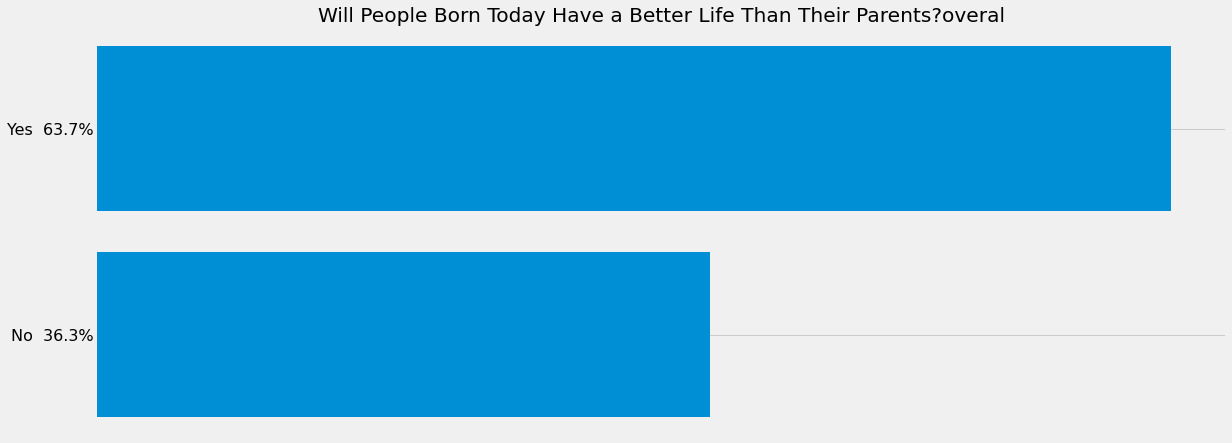

In [50]:
better_life = data["BetterLife"]  #calling data from better life  
better_life.dropna(inplace =True) #filtering the data from empty and unnecessary answers

counted = Counter(better_life)  #writing in dictionary and counting 
items = counted.items()        #rewriting data into lists

key_Phrases = []  # list to save key phrases
Quantity = []     # list to save quantity

#adding key phrases and quantity to relevant empty list
for item in items:
    key_Phrases.append(item[0])  #the data that is placed at "0" appends on key phrases
    Quantity.append(item[1])     #the data that is placed at "1" appends on Quantity

#reversing key phrases and quantity 
key_Phrases.reverse()
Quantity.reverse()

Build_Barh_sizes(key_Phrases, Quantity, better_life, "fivethirtyeight", False , (18,7), "Will People Born Today Have a Better Life Than Their Parents?overal") #building barchart


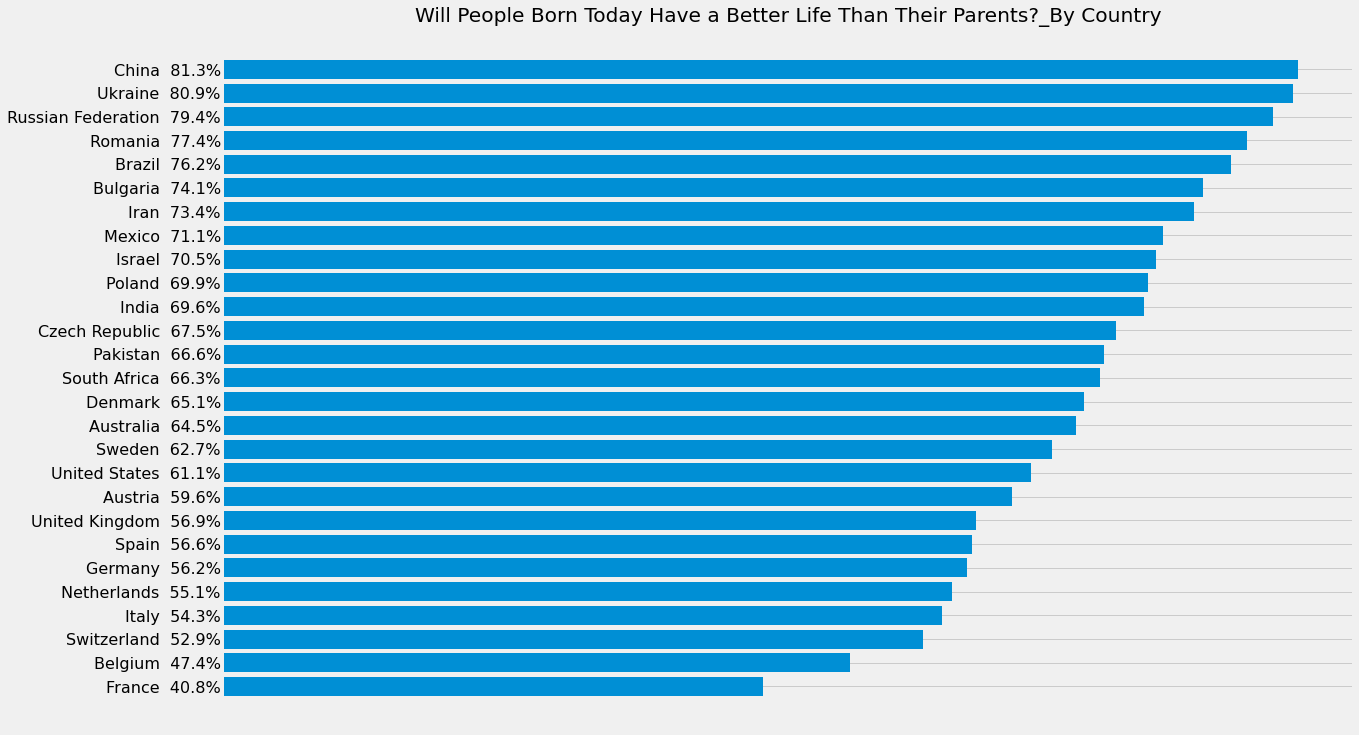

In [51]:
better_life = data["BetterLife"]   #calling data from better life 
better_life.dropna(inplace =True)  #filtering the data from empty and unnecessary answers

#creating list which contains countries that I want to get data from
Countries = ["France", "Belgium", "Switzerland", "Italy", "Netherlands", "Germany", "Spain", "United Kingdom", "Canada"
"Turkey", "Austria", "United States", "Sweden", "Australia", "Denmark", "South Africa", "Pakistan", "Czech Republic", 
"India", "Poland", "Israel", "Mexico", "Iran", "Bulgaria", "Brazil", "Romania" , "Russian Federation", "Ukraine", "China"]

key_Phrases = []   # list to save key phrases
Quantity = []      # list to save quantity

for i in Countries:
    better_life_countries =  data[(better_life != "nan") & (data["Country"] == i)] #combining datas from first code age and country from previous list. 
    Better_life_countries = (better_life_countries["BetterLife"]) #save the combined data in new variable

    counted = Counter(Better_life_countries)  #counting the answers
    #writing logics to avoid bugs 
    if len(Better_life_countries) != 0:
        percent = round((counted["Yes"] / len(Better_life_countries) ) *100, 1)  

        key_Phrases.append(i) #adding counties from previous list as key phrases
        Quantity.append(percent) #adding average percentage to quantity list


Build_Barh_sizes_percentage (key_Phrases , Quantity  ,"fivethirtyeight", False , (18,12), "Will People Born Today Have a Better Life Than Their Parents?_By Country" ) #building barchart


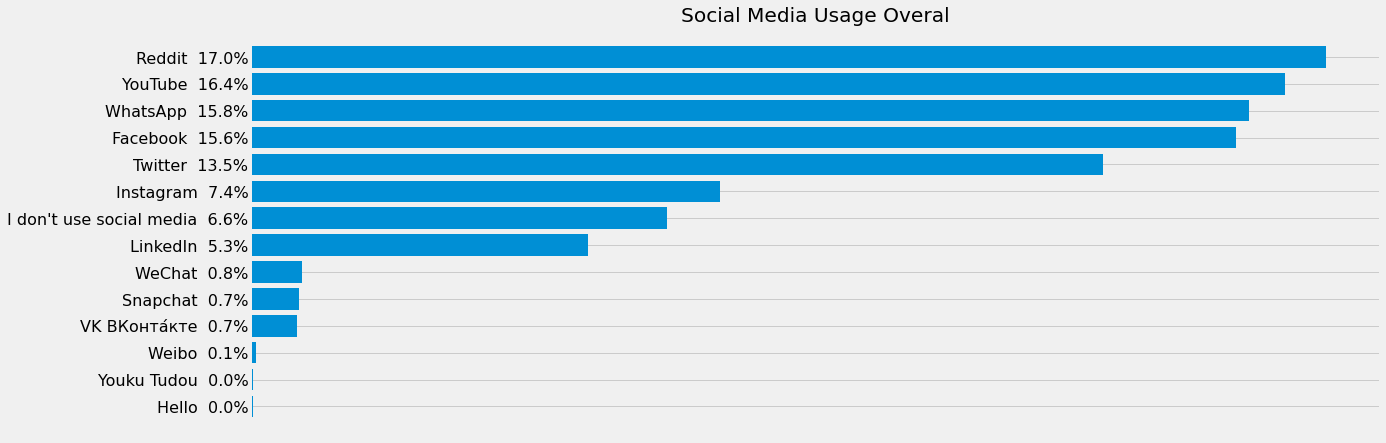

In [52]:
soc_media_use = data["SocialMedia"]  #calling data from social media
soc_media_use.dropna(inplace = True) #filtering the data from empty and unnecessary answers

soc_media_use =  np.array(soc_media_use)  #transfers data in list
  
#rewriting data to be more convenient for reading.
soc_media_use = np.where(soc_media_use == "WeChat 微信", "WeChat", soc_media_use)
soc_media_use = np.where(soc_media_use == "Weibo 新浪微博", "Weibo", soc_media_use)
soc_media_use = np.where(soc_media_use == "Youku Tudou 优酷", "Youku Tudou", soc_media_use)


counted = Counter(soc_media_use)  #writing in dictionary and counting  
counted_sorted = sort_dict_by_value(counted) #sorting data by growth/by reduction

items = counted_sorted.items()   #rewriting data into lists

key_Phrases = [] # list to save key phrases
Quantity = []    # list to save quantity

#adding key phrases and quantity to relevant empty list
for item in items:
    key_Phrases.append(item[0])   #the data that is placed at "0" appends on key phrases
    Quantity.append(item[1])      #the data that is placed at "1" appends on Quantity 


Build_Barh_sizes(key_Phrases, Quantity, soc_media_use, "fivethirtyeight", False , (18,7), "Social Media Usage Overal") #Building Barchart

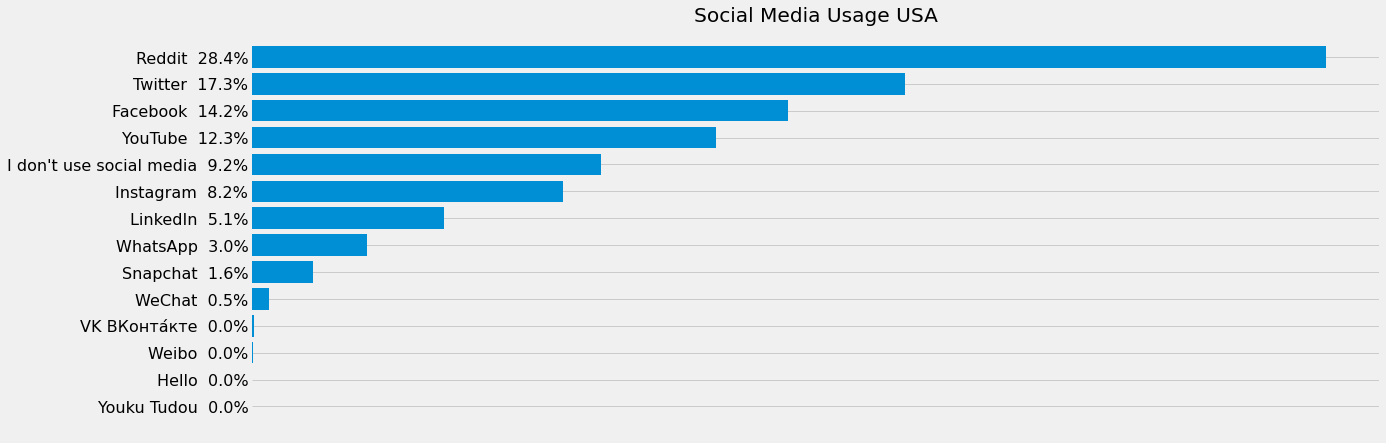

In [53]:
soc_media_use = data["SocialMedia"] #calling data from social media
soc_media_use.dropna(inplace = True) #filtering the data from empty and unnecessary answers



soc_media_use_usa = data[(soc_media_use != "Nan") & (data["Country"] == "United States")] #combining datas from social media and USA
Soc_media_use_usa = soc_media_use_usa["SocialMedia"] #save the combined data in new variable

Soc_media_use_usa =  np.array(Soc_media_use_usa) #transfers data in list

#rewriting data to be more convenient for reading.
Soc_media_use_usa = np.where(Soc_media_use_usa == "WeChat 微信", "WeChat", Soc_media_use_usa)
Soc_media_use_usa = np.where(Soc_media_use_usa == "Weibo 新浪微博", "Weibo", Soc_media_use_usa)
Soc_media_use_usa= np.where(Soc_media_use_usa == "Youku Tudou 优酷", "Youku Tudou", Soc_media_use_usa)

counted = Counter(Soc_media_use_usa)  #writing in dictionary and counting 
counted_sorted = sort_dict_by_value(counted) #sorting data by growth/by reduction 

items = counted_sorted.items() #rewriting data into lists

key_Phrases = []  # list to save key phrases
Quantity = []     # list to save Quantity

#adding key phrases and quantity to relevant empty list
for item in items:
    key_Phrases.append(item[0]) #the data that is placed at "0" appends on key phrases
    Quantity.append(item[1])    #the data that is placed at "1" appends on Quantity 


Build_Barh_sizes(key_Phrases, Quantity, Soc_media_use_usa, "fivethirtyeight", False , (18,7), "Social Media Usage USA") #building barchart

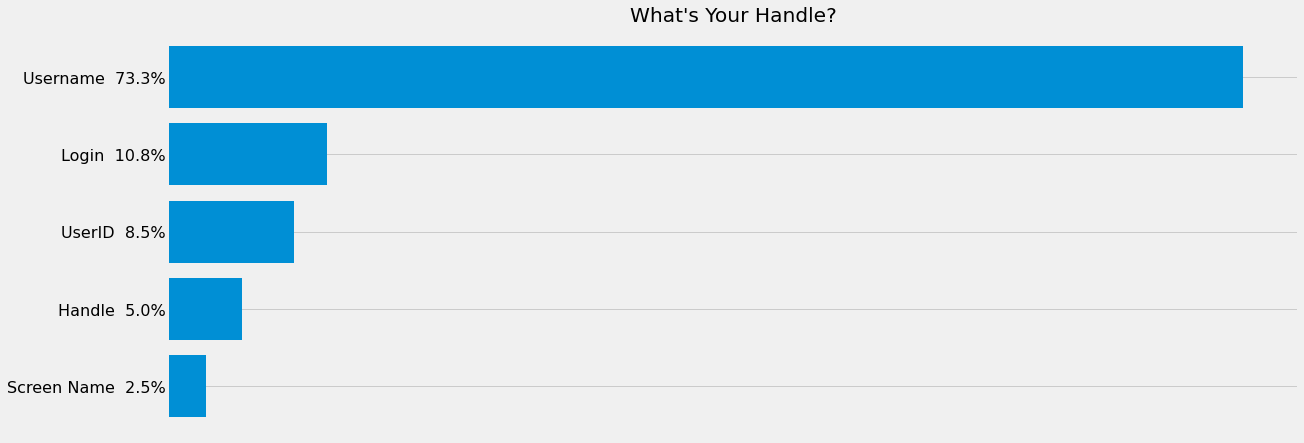

In [54]:
screen_name = data["ScreenName"] #calling data from "ScreenName"
screen_name.dropna(inplace = True)  #filtering the data from empty and unnecessary answers

counted = Counter(screen_name)  #writing in dictionary and counting 
counted_sorted = sort_dict_by_value(counted) #sorting data by growth/by reduction 
items = counted_sorted.items() #rewritingdata into lists

key_Phrases = [] # list to save key phrases
Quantity = []    # list to save Quantity

#adding key phrases and quantity to relevant empty list
for item in items:
    key_Phrases.append(item[0]) #the data that is placed at "0" appends on key phrases
    Quantity.append(item[1])    #the data that is placed at "1" appends on Quantity

Build_Barh_sizes(key_Phrases, Quantity, screen_name, "fivethirtyeight", False , (18,7), "What's Your Handle?") #building barchart


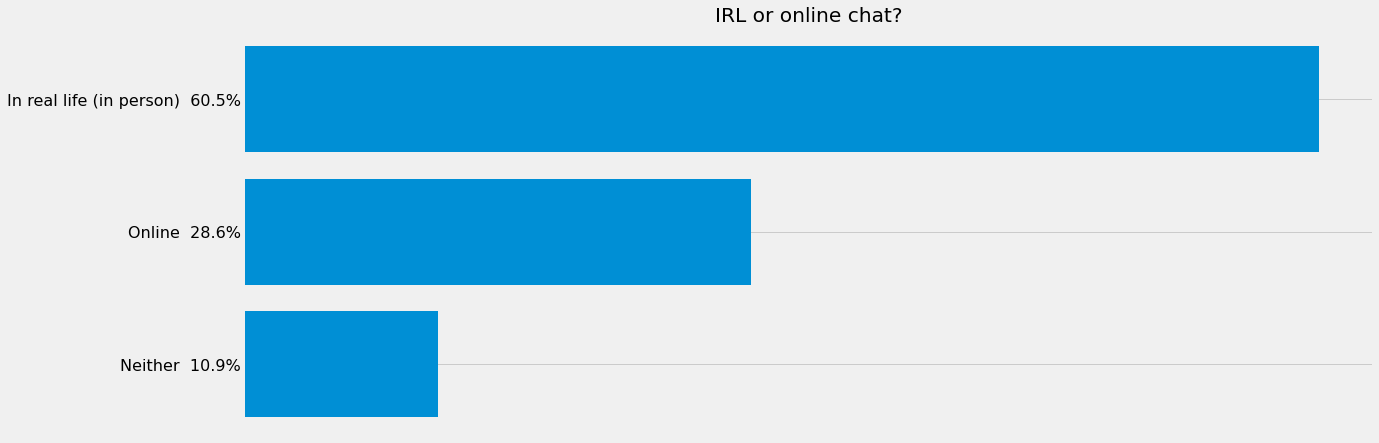

In [143]:
extraversion = data["Extraversion"] #calling data from "Extraversion"
extraversion.dropna(inplace = True) #filtering the data from empty and unnecessary answers

counted = Counter(extraversion) #writing in dictionary and counting 
counted_sorted = sort_dict_by_value(counted) #sorting data by growth/by reduction 

items = counted_sorted.items()  #rewritingdata into lists

#empty lists to add related data later 
key_Phrases = []
Quantity = []

#adding key phrases and quantity to relevant empty list
for item in items:
    key_Phrases.append(item[0]) #the data that is placed at "0" appends on key phrases
    Quantity.append(item[1])    #the data that is placed at "1" appends on Quantity 


Build_Barh_sizes(key_Phrases, Quantity, extraversion, "fivethirtyeight", False , (18,7), "IRL or online chat?") #building barchart


                                        Programming, Scripting, and Markup Languages

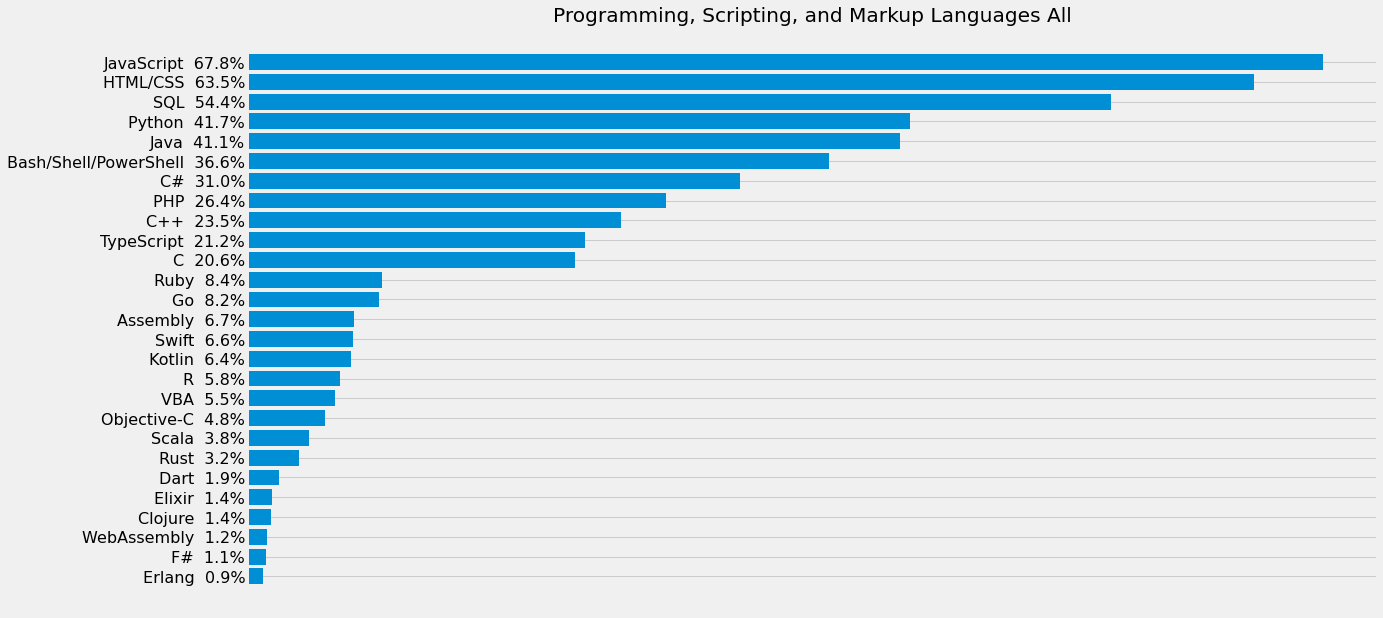

In [56]:
lang_worked_with = data["LanguageWorkedWith"] #calling data from languages worked with
lang_worked_with.dropna(inplace  =True)       #filtering the data from empty and unnecessary answers

 
languageworkedwit_no_others = []  #list whith no "others" after first filtering(filtering separated "others")

# deleting separately standing "others" from lang_worked_with 
for i in lang_worked_with:
  if i == "Other(s):":
    a = 6
  else:
    languageworkedwit_no_others.append(i.split(";")) #adding data except separately standing "others" and fracturing at (;)-s

union = []   #list with no "others" after second filtering (filterin "others" that are put with other data together)                       

# deleting  "others" that are put with other data from languageworkedwit_no_others
for i in languageworkedwit_no_others:
  #deleting "others" which are put with different data
      for k in i: 
        if k ==  "Other(s):" : 
          a = 5
        else:                 
          union.append(k) #adding completely filtered data to union list(without "others")

counted = Counter(union)   #writing in dictionary and counting          

Counted = sort_dict_by_value(counted, False)  #sorting data by growth/by reduction 

#empty lists to add related data later 
key_Phrases = [] 
Quantity = []   
  

items = Counted.items()      #rewriting data into lists

#adding key phrases and quantity to relevant empty list
for item in items:        
    key_Phrases.append(item[0])   #the data that is placed at "0" appends on key phrases
    Quantity.append(item[1])      #the data that is placed at "1" appends on Quantity 

Build_Barh_sizes(key_Phrases, Quantity, languageworkedwit_no_others, "fivethirtyeight", False , (18,10), "Programming, Scripting, and Markup Languages All") #building barchart

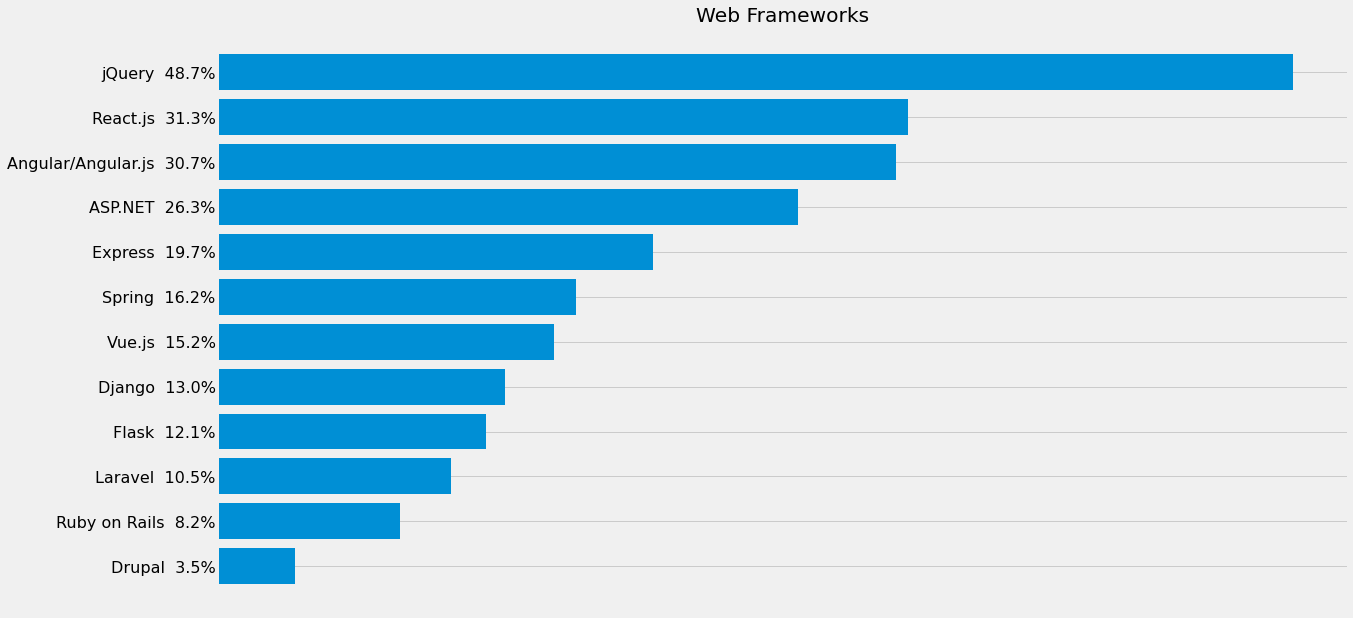

In [57]:
webframe_worked_with = data["WebFrameWorkedWith"] #calling data from webframes worked with
webframe_worked_with.dropna(inplace =  True )     #filtering the data from empty and unnecessary answers


webframe_workedwith_no_others = []  #list whith no "others" after first filtering(filtering separated "others")


# deleting separately standing "others" from webframe_worked_with
for i in webframe_worked_with:
  if i == "Other(s):":
    a = 6
  else:
    webframe_workedwith_no_others.append(i.split(";"))  #adding data except separately standing "others" and fracturing at (;)-s

union = []     #list with no "others" after second filtering (filterin "others" that are put with other data together)                  

# deleting  "others" that are put with other data from webframe_workedwith_no_others
for i in webframe_workedwith_no_others:
  #deleting "others" which are put with different data
      for k in i: 
        if k ==  "Other(s):" : 
          a = 5
        else:                 
          union.append(k)  #adding completely filtered data to union list(without "others")

counted = Counter(union)        #writing in dictionary and counting      

Counted = sort_dict_by_value(counted, False)  #sorting data by growth/by reduction 

#empty lists to add related data later 
key_Phrases = [] 
Quantity = []  

  

items = Counted.items()     #rewriting data into lists

#adding key phrases and quantity to relevant empty list
for item in items:        
    key_Phrases.append(item[0])   #the data that is placed at "0" appends on key phrases
    Quantity.append(item[1])       #the data that is placed at "1" appends on Quantity 

Build_Barh_sizes(key_Phrases, Quantity, webframe_workedwith_no_others, "fivethirtyeight", False , (18,10), "Web Frameworks") #building barchart

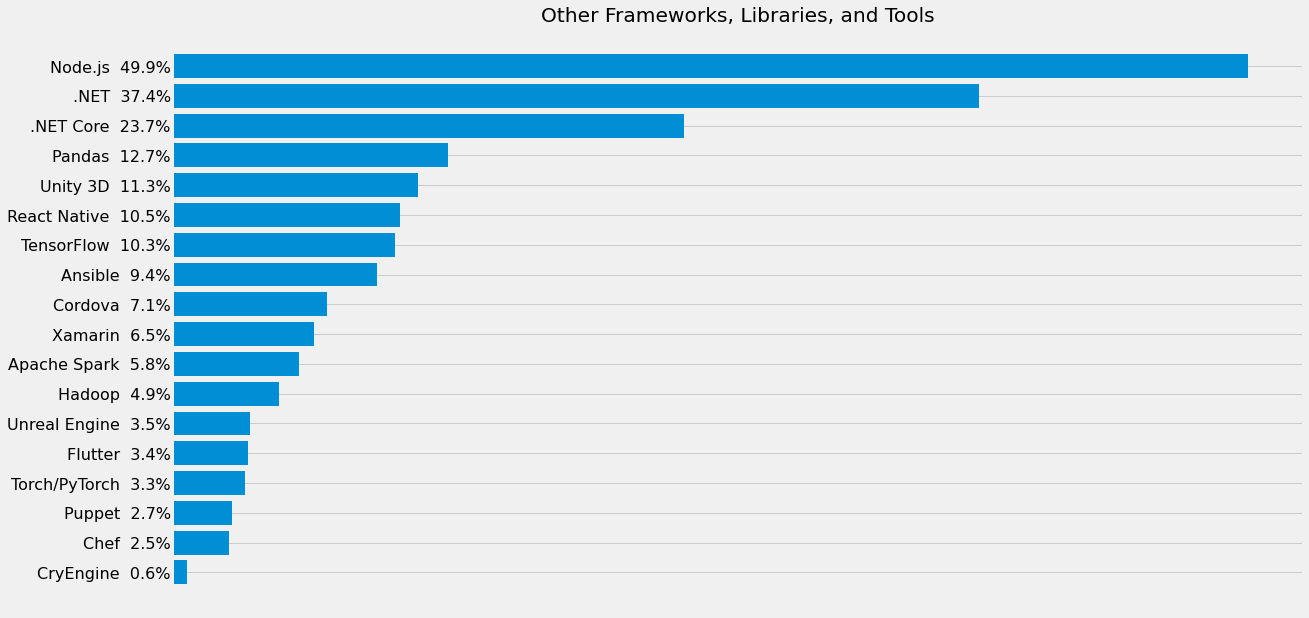

In [58]:
other_frameworks = data["MiscTechWorkedWith"] #calling data from other frameworks worked with
other_frameworks.dropna(inplace = True)   #filtering the data from empty and unnecessary answers

otherframeworks_with_no_others = [] #list whith no "others" after first filtering(filtering separated "others")

# deleting separately standing "others" from other_frameworks
for i in other_frameworks:
  if i == "Other(s):":
    a = 6
  else:
    otherframeworks_with_no_others.append(i.split(";"))  #adding completely filtered data to union list(without "others")

union = []  #list with no "others" after second filtering (filterin "others" that are put with other data together)                        

# deleting  "others" that are put with other data from otherframeworks_with_no_others
for i in otherframeworks_with_no_others:
  #deleting "others" which are put with different data 
      for k in i: 
        if k ==  "Other(s):" : 
          a = 5
        else:                 
          union.append(k)  #adding completely filtered data to union list(without "others")

counted = Counter(union)    #writing in dictionary and counting        

Counted = sort_dict_by_value(counted, False)   #sorting data by growth/by reduction 

#empty lists to add related data later 
key_Phrases = []  
Quantity = []    

items = Counted.items()    #rewriting data into lists

for item in items:        # ანაწილებს ფრაზებს და რაოდენობებს სათანადო სიებში
    key_Phrases.append(item[0])   # უშვებს ფრაზებს
    Quantity.append(item[1])      # უშვებს რიცხვით მნიშვნელობებს

Build_Barh_sizes(key_Phrases, Quantity, otherframeworks_with_no_others, "fivethirtyeight", False , (18,10), "Other Frameworks, Libraries, and Tools")

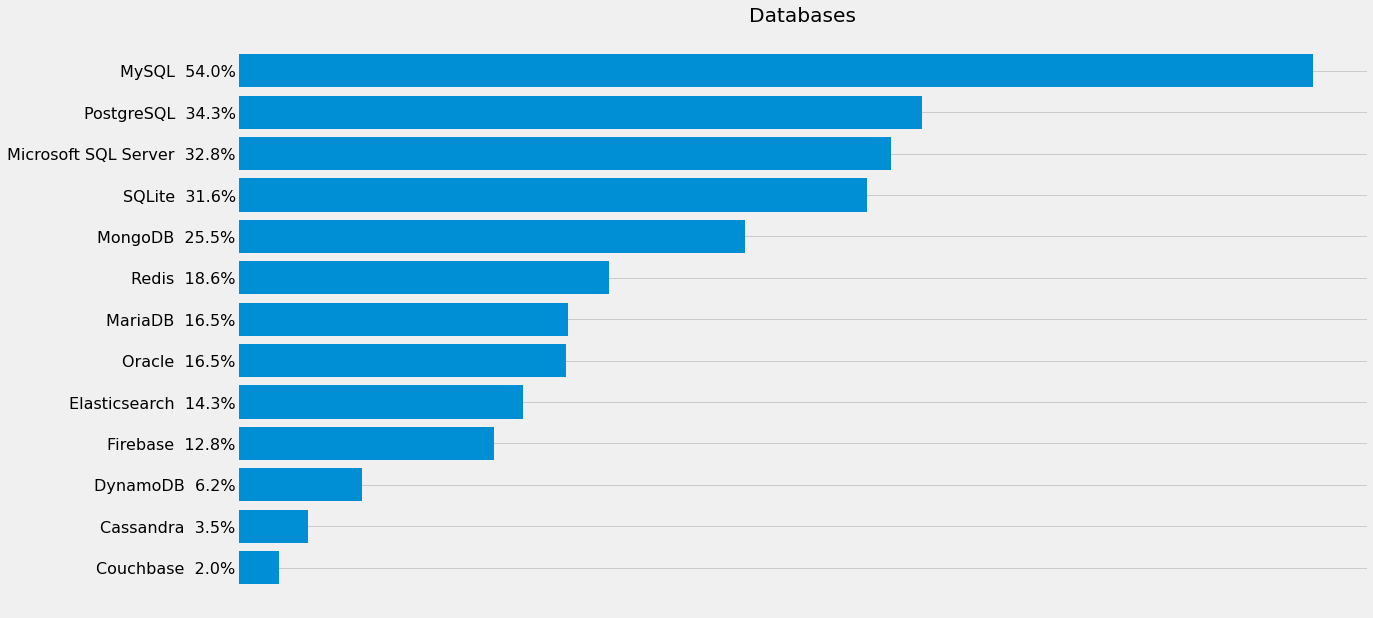

In [59]:
data_bases  = data["DatabaseWorkedWith"]
data_bases.dropna(inplace = True)

#სია რომელშიც  other ები არ იქნება 
databases_with_no_others = []

#lang_worked_with დან ვშლი ცალკეულად მდგომ other ებს 
for i in data_bases:
  if i == "Other(s):":
    a = 6
  else:
    databases_with_no_others.append(i.split(";"))

union = []                          

for i in databases_with_no_others:
  #სხვებთან ერთად მდგომ otherებს ვაქრობ 
      for k in i: 
        if k ==  "Other(s):" : 
          a = 5
        else:                 
          union.append(k)

counted = Counter(union)            

Counted = sort_dict_by_value(counted, False)  #იყენებს ძემოთა ფუქნციას

key_Phrases = []  #ინახავს ფრაზებს
Quantity = []   # ინახავს რაოდენობას 

items = Counted.items()    # ფაქტიურად დიქშინარის გარდაქმნის ლისთად
for item in items:        # ანაწილებს ფრაზებს და რაოდენობებს სათანადო სიებში
    key_Phrases.append(item[0])   # უშვებს ფრაზებს
    Quantity.append(item[1])      # უშვებს რიცხვით მნიშვნელობებს

Build_Barh_sizes(key_Phrases, Quantity, databases_with_no_others, "fivethirtyeight", False , (18,10), "Databases")

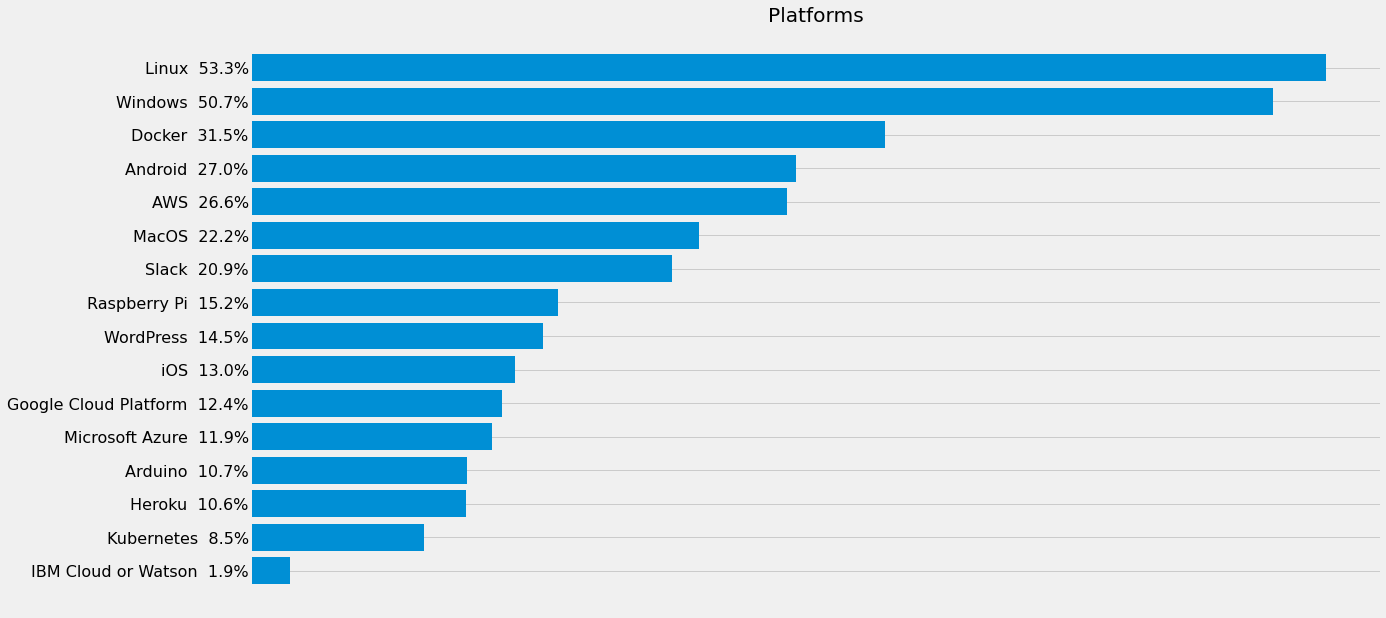

In [60]:
platforms_worked_with = data["PlatformWorkedWith"]
platforms_worked_with.dropna(inplace =True)

#სია რომელშიც  other ები არ იქნება 
platforms_with_no_others = []

#lang_worked_with დან ვშლი ცალკეულად მდგომ other ებს 
for i in platforms_worked_with:
  if i == "Other(s):":
    a = 6
  else:
    platforms_with_no_others.append(i.split(";"))

union = []                          

for i in platforms_with_no_others:
  #სხვებთან ერთად მდგომ otherებს ვაქრობ 
      for k in i: 
        if k ==  "Other(s):" : 
          a = 5
        else:                 
          union.append(k)

counted = Counter(union) 
Counted = sort_dict_by_value(counted, False)  #იყენებს ძემოთა ფუქნციას

key_Phrases = []  #ინახავს ფრაზებს
Quantity = []   # ინახავს რაოდენობას 

items = Counted.items()    # ფაქტიურად დიქშინარის გარდაქმნის ლისთად
for item in items:        # ანაწილებს ფრაზებს და რაოდენობებს სათანადო სიებში
    key_Phrases.append(item[0])   # უშვებს ფრაზებს
    Quantity.append(item[1])      # უშვებს რიცხვით მნიშვნელობებს

Build_Barh_sizes(key_Phrases, Quantity, platforms_with_no_others, "fivethirtyeight", False , (18,10), "Platforms")

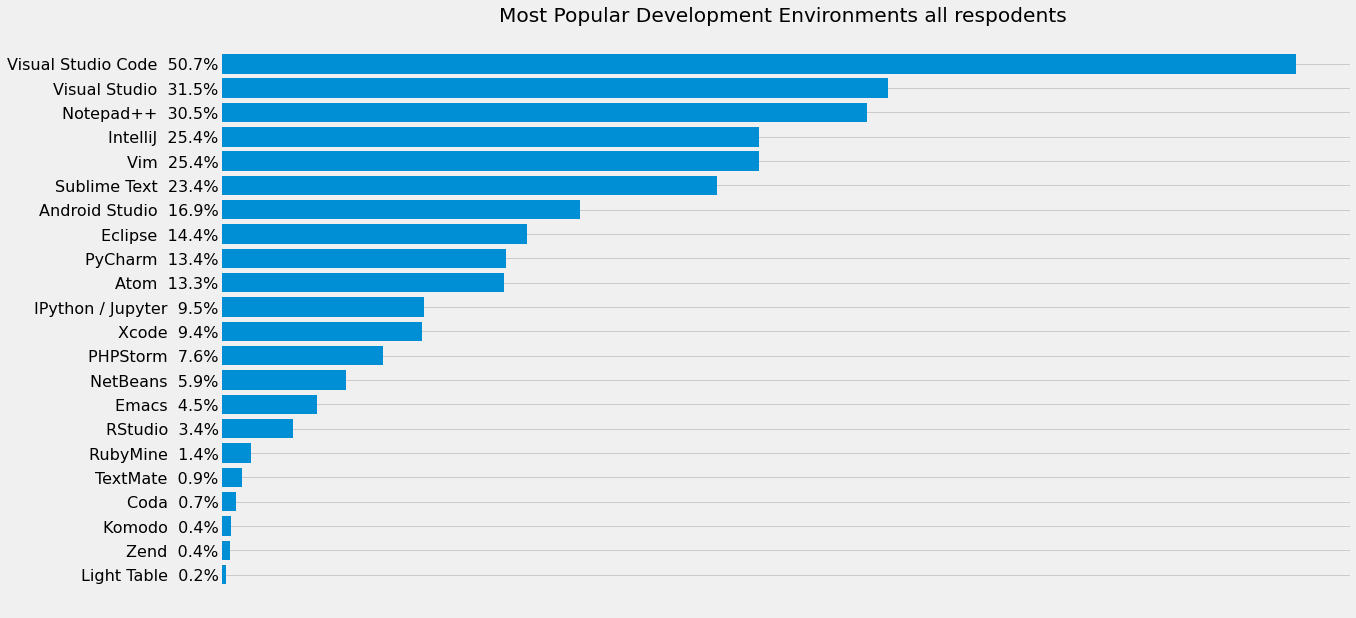

In [61]:
dev_environment = data["DevEnviron"]
dev_environment.dropna(inplace = True)
dev_environment = dev_environment.str.split(";")

list_sorter_counter(dev_environment)

Build_Barh_sizes(key_Phrases, Quantity, dev_environment, "fivethirtyeight", False , (18,10), "Most Popular Development Environments all respodents ")

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


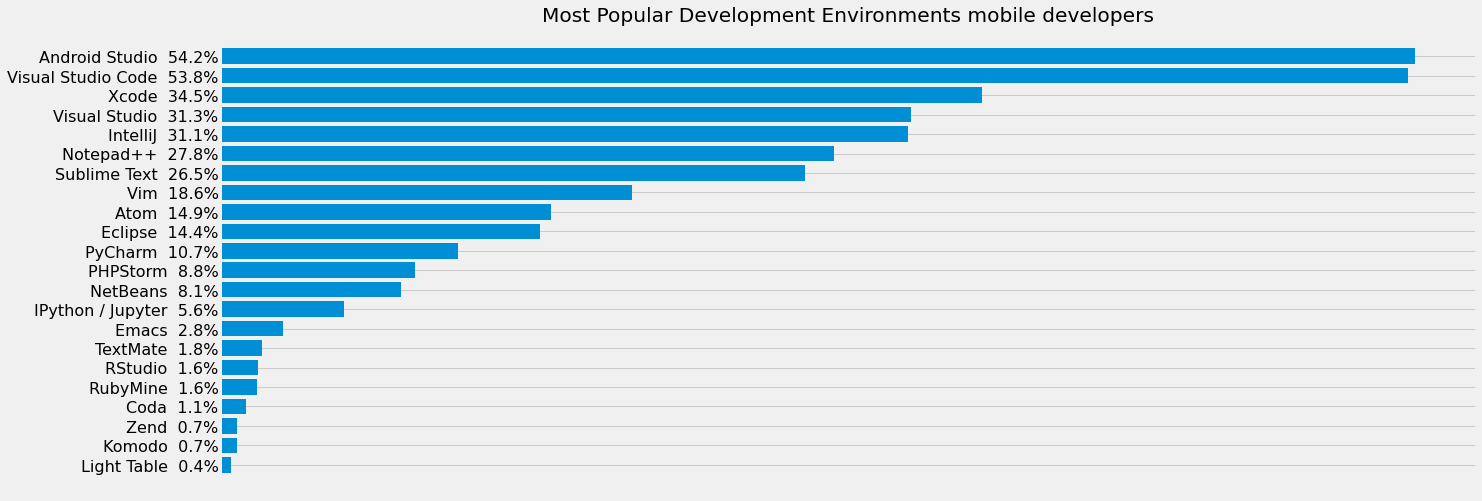

In [62]:
DevType = data["DevType"]    # ვიაძახებ მხოლოდ დეველოპერების პროფესიებს
DevType.dropna(inplace = True)

#აქ ინახება ის წინადადებები სადაც მობაილი ურევია
new_list = []

#ამით ვპოულობ წინადადებებს სადაც მობაილი ურევია და ვამატებ ზედა ლისტს
for i in DevType:
    if "mobile" in i:
       new_list.append(i)

#ვაჯგუფებ რო გამეორება გამოვრიცხო 
counted = Counter(new_list) #ეგი დქშენერია
#ახლა დიშენერი კიდე ლისტად გარდავქმენი  და აქ მაქ 1 ყველა სახის წინადადება სადაც მობაილი ურევია 
key_list = list(counted)




dev_environment = data["DevEnviron"]


all_ifo = []

for i in key_list:
    new_data = data[(dev_environment != "Nan") & (data["DevType"] == i) ]

    new_DevEnviron = new_data['DevEnviron']

    new_DevEnviron.dropna(inplace = True)

    for i in new_DevEnviron:
        all_ifo.append(i.split(";"))




list_sorter_counter(all_ifo)

Build_Barh_sizes( key_Phrases , Quantity, all_ifo ,"fivethirtyeight", False , (20,8), "Most Popular Development Environments mobile developers")


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


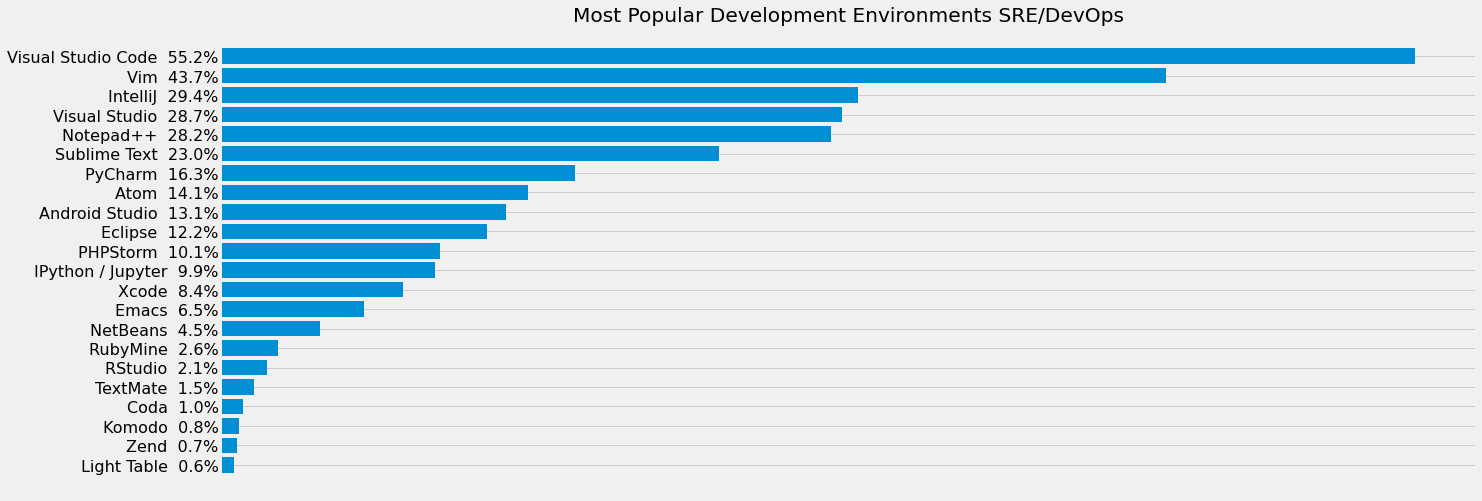

In [63]:
DevType = data["DevType"]    # ვიაძახებ მხოლოდ დეველოპერების პროფესიებს
DevType.dropna(inplace = True)

#აქ ინახება ის წინადადებები სადაც SRE ან DevOps ურევია
list_with_SRE_and_Devops = []

#ამით ვპოულობ წინადადებებს სადაც SRE ან DevOps ურევია და ვამატებ ზედა ლისტს
for i in DevType:
    if "site reliability" in i or "DevOps" in i:
       list_with_SRE_and_Devops.append(i)

#ვაჯგუფებ რო გამეორება გამოვრიცხო 
counted = Counter(list_with_SRE_and_Devops) #ეგი დიქშენერია
#ახლა დიშენერი კიდე ლისტად გარდავქმენი  და აქ მაქ 1 ყველა სახის წინადადება სადაც მობაილი ურევია 
key_list = list(counted)




dev_environment = data["DevEnviron"]

#აქ ჩავყრი იმ საბოლოო მონაცემებს საიდანაც ნახაზს ავაგებ ანუ დევტაიპის შესაბამისი ლაინები და ენვაირომენთის ყველა 
devtype_with_enironment = []

#ქი ლისტის აითემების რაოდენობაჯერ ვაერთაინებ დევტაიპს და დევ ენვირონმენტს და ვამატებ 1 სიას ამას devtype_with_enironment
for i in key_list:
    new_data = data[(dev_environment != "Nan") & (data["DevType"] == i) ]

    new_DevEnviron = new_data['DevEnviron']

    new_DevEnviron.dropna(inplace = True)

    for i in new_DevEnviron:
        devtype_with_enironment.append(i.split(";"))




list_sorter_counter(devtype_with_enironment)

Build_Barh_sizes( key_Phrases , Quantity, devtype_with_enironment ,"fivethirtyeight", False , (20,8), "Most Popular Development Environments SRE/DevOps")


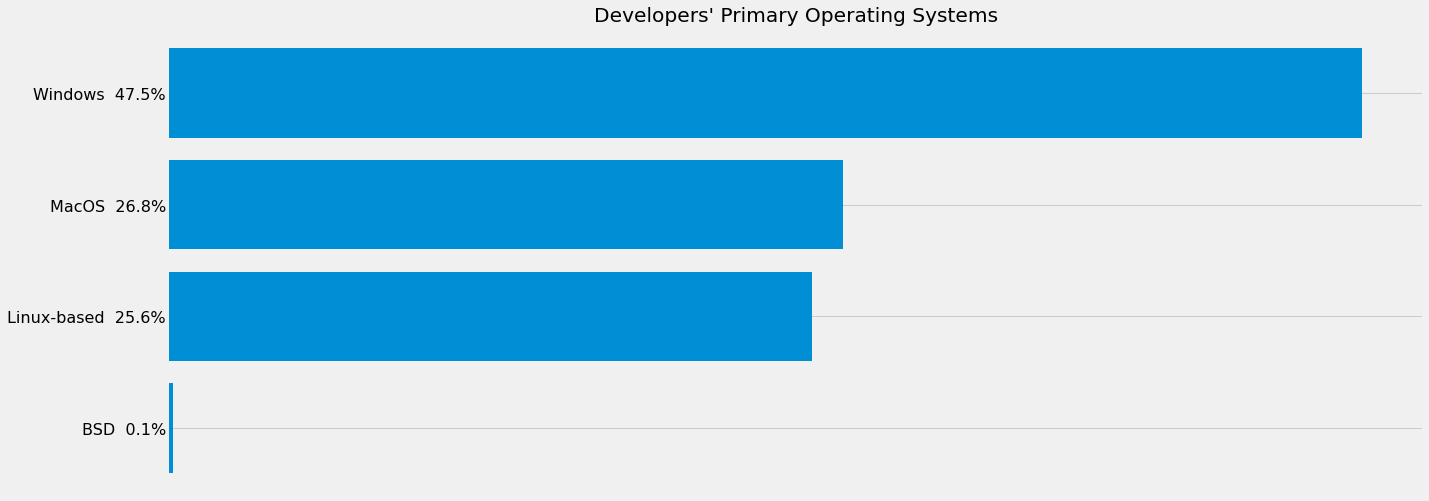

In [64]:
operating_system = data["OpSys"]
operating_system.dropna(inplace = True)

counted = Counter(operating_system)
counted_sorted = sort_dict_by_value(counted)

items = counted_sorted.items()

key_Phrases = []
Quantity =[]

for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])

Build_Barh_sizes( key_Phrases , Quantity, operating_system ,"fivethirtyeight", False , (20,8), "Developers' Primary Operating Systems")


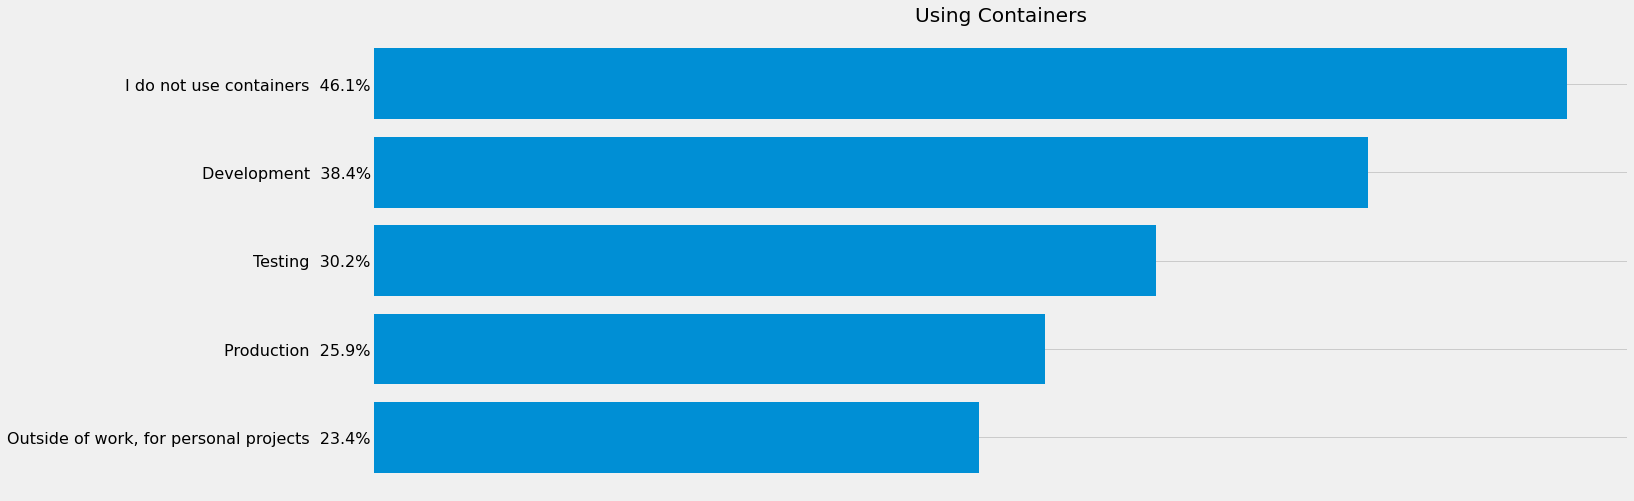

In [65]:
using_containers = data["Containers"]
using_containers.dropna(inplace =True)
using_containers = using_containers.str.split(";")

list_sorter_counter(using_containers)

Build_Barh_sizes( key_Phrases , Quantity, using_containers ,"fivethirtyeight", False , (20,8), "Using Containers")


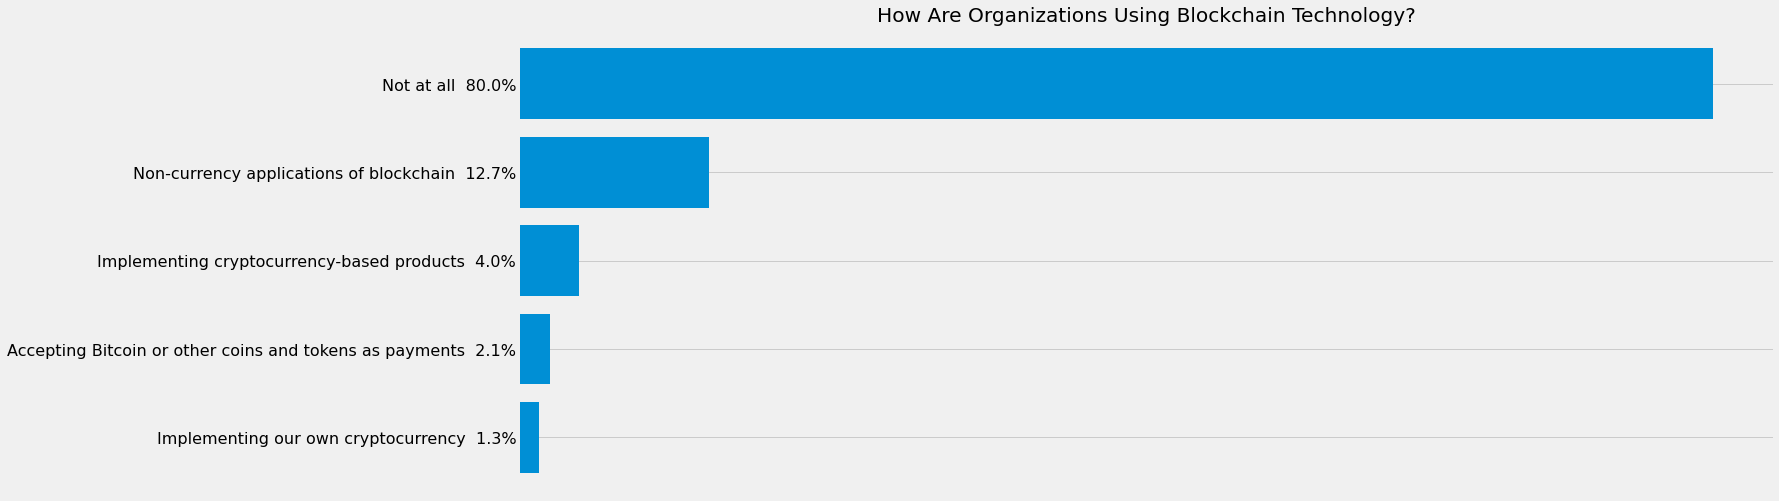

In [66]:
blockchain_use_organizations = data["BlockchainOrg"]
blockchain_use_organizations.dropna(inplace = True) 

counted = Counter(blockchain_use_organizations)
counted_sorted = sort_dict_by_value(counted)

items = counted_sorted.items()

key_Phrases = []
Quantity =[]

for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])

Build_Barh_sizes( key_Phrases , Quantity, blockchain_use_organizations ,"fivethirtyeight", False , (20,8), "How Are Organizations Using Blockchain Technology?")


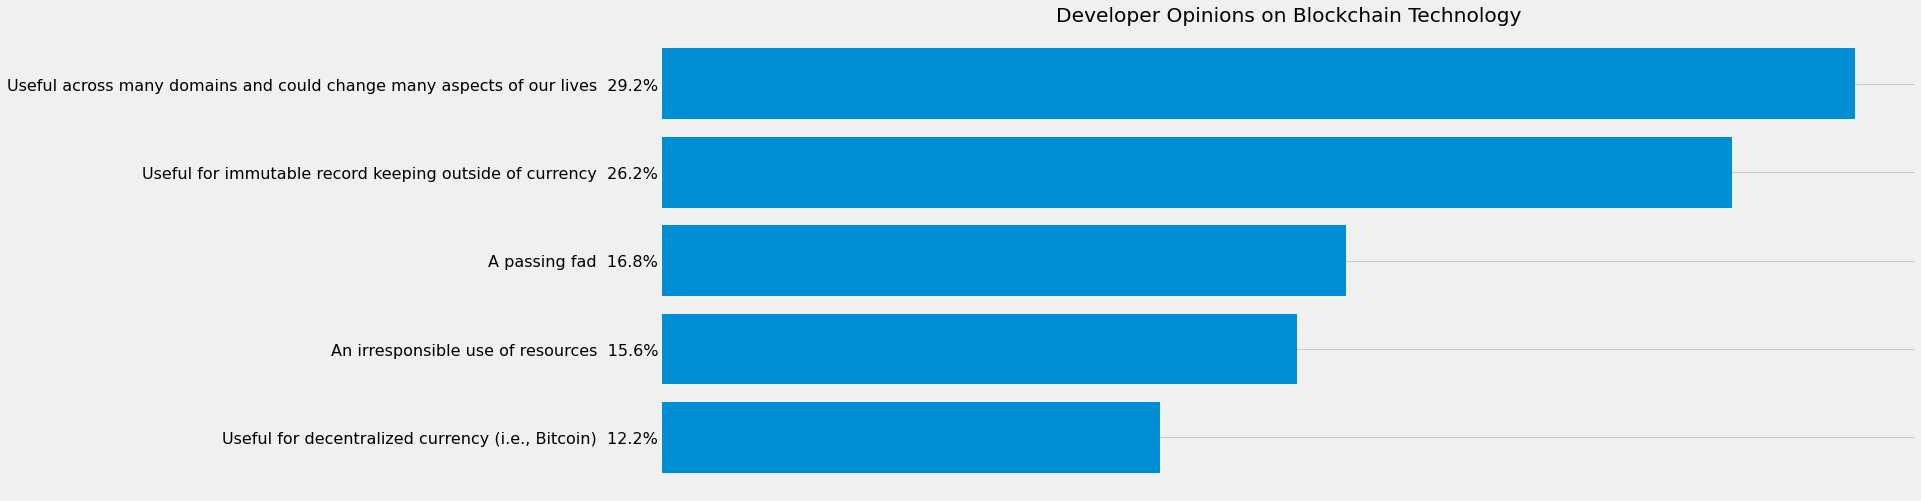

In [67]:
dev_opinion_blockchain = data["BlockchainIs"]
dev_opinion_blockchain.dropna(inplace =True)

counted = Counter(dev_opinion_blockchain)
counted_sorted = sort_dict_by_value(counted)

items = counted_sorted.items()

key_Phrases = []
Quantity =[]

for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])

Build_Barh_sizes( key_Phrases , Quantity, dev_opinion_blockchain ,"fivethirtyeight", False , (20,8), "Developer Opinions on Blockchain Technology")


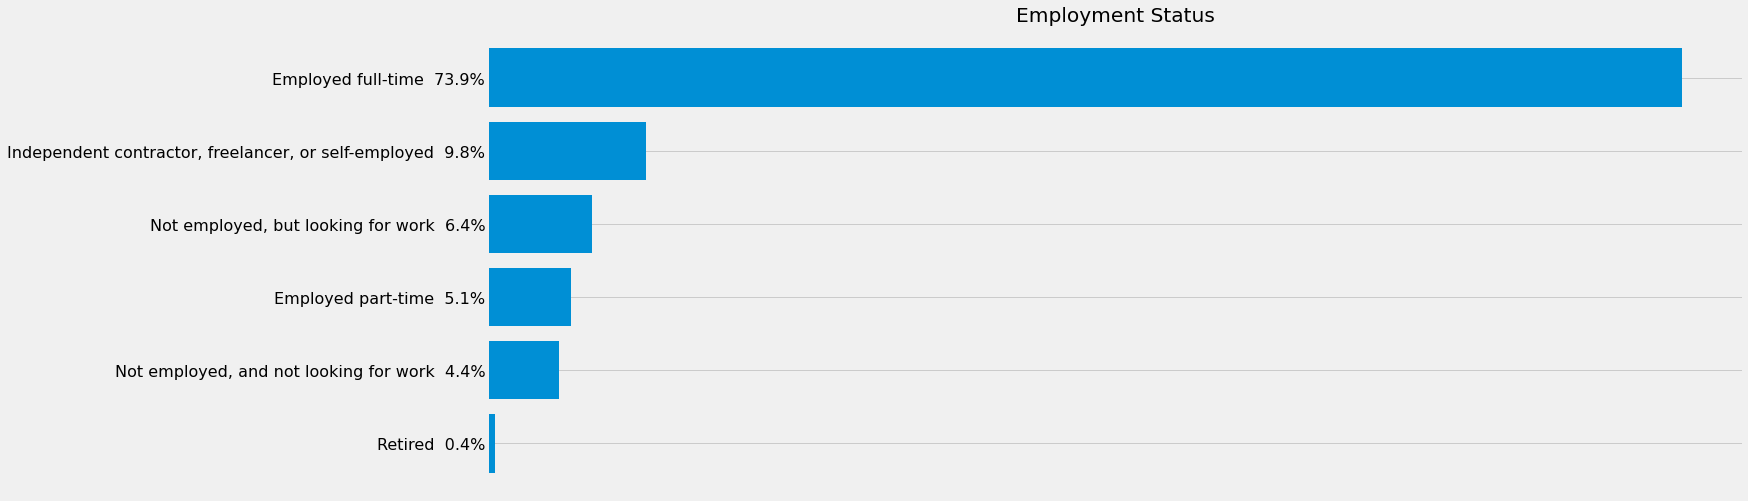

In [70]:
employment_status = data["Employment"]
employment_status.dropna(inplace = True)

counted = Counter(employment_status)

counted_sorted = sort_dict_by_value(counted)

items = counted_sorted.items()

key_Phrases = []
Quantity =[]

for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])

Build_Barh_sizes( key_Phrases , Quantity, employment_status ,"fivethirtyeight", False , (20,8), "Employment Status")


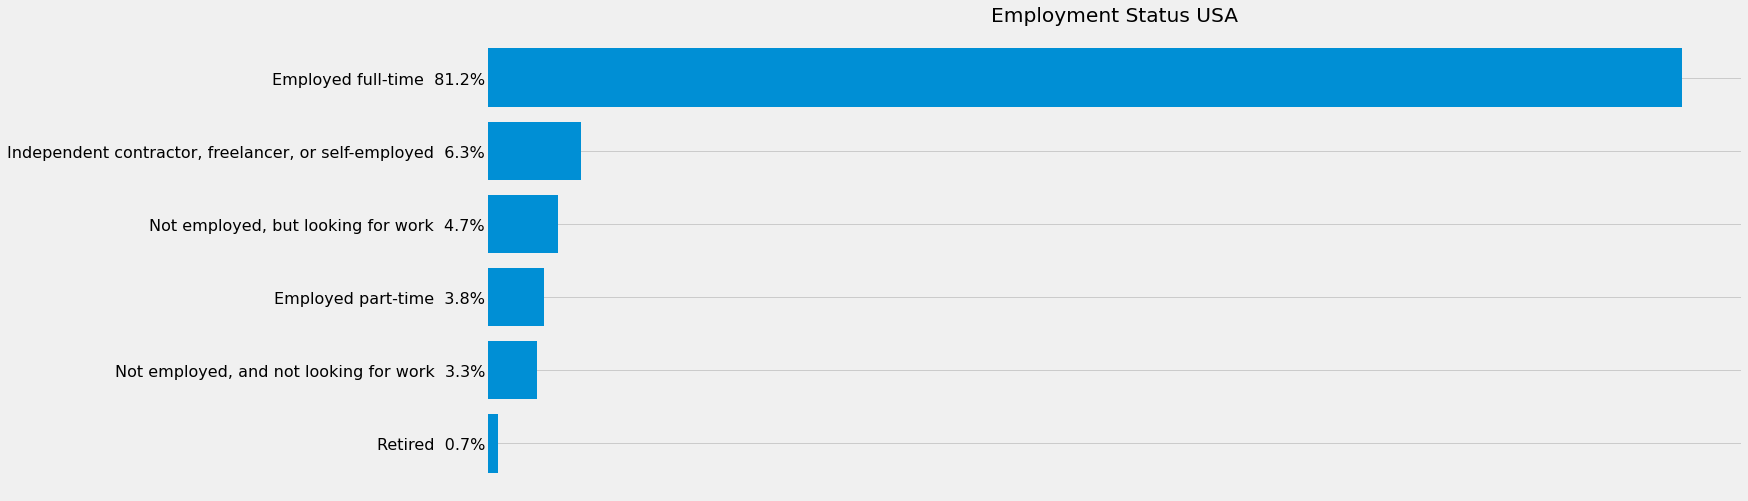

In [71]:
employment_status = data["Employment"]
employment_status.dropna(inplace = True)

employment_status_usa = data[(employment_status != "nan") & (data["Country"] == "United States")]
Employment_status_usa =  employment_status_usa["Employment"]

counted = Counter(Employment_status_usa)

counted_sorted = sort_dict_by_value(counted)

items = counted_sorted.items()

key_Phrases = []
Quantity =[]

for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])

Build_Barh_sizes( key_Phrases , Quantity, Employment_status_usa ,"fivethirtyeight", False , (20,8), "Employment Status USA")


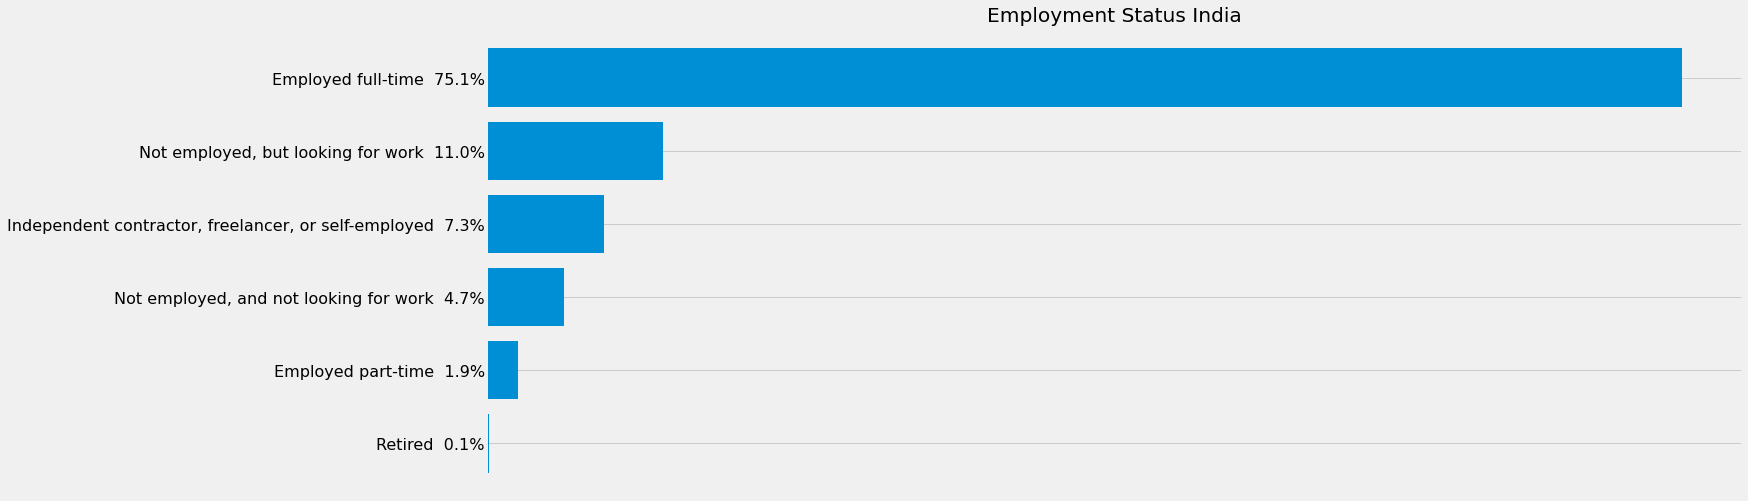

In [72]:
employment_status = data["Employment"]
employment_status.dropna(inplace = True)

employment_status_india = data[(employment_status != "nan") & (data["Country"] == "India")]
Employment_status_india =  employment_status_india["Employment"]

counted = Counter(Employment_status_india)

counted_sorted = sort_dict_by_value(counted)

items = counted_sorted.items()

key_Phrases = []
Quantity =[]

for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])

Build_Barh_sizes( key_Phrases , Quantity, Employment_status_india ,"fivethirtyeight", False , (20,8), "Employment Status India")


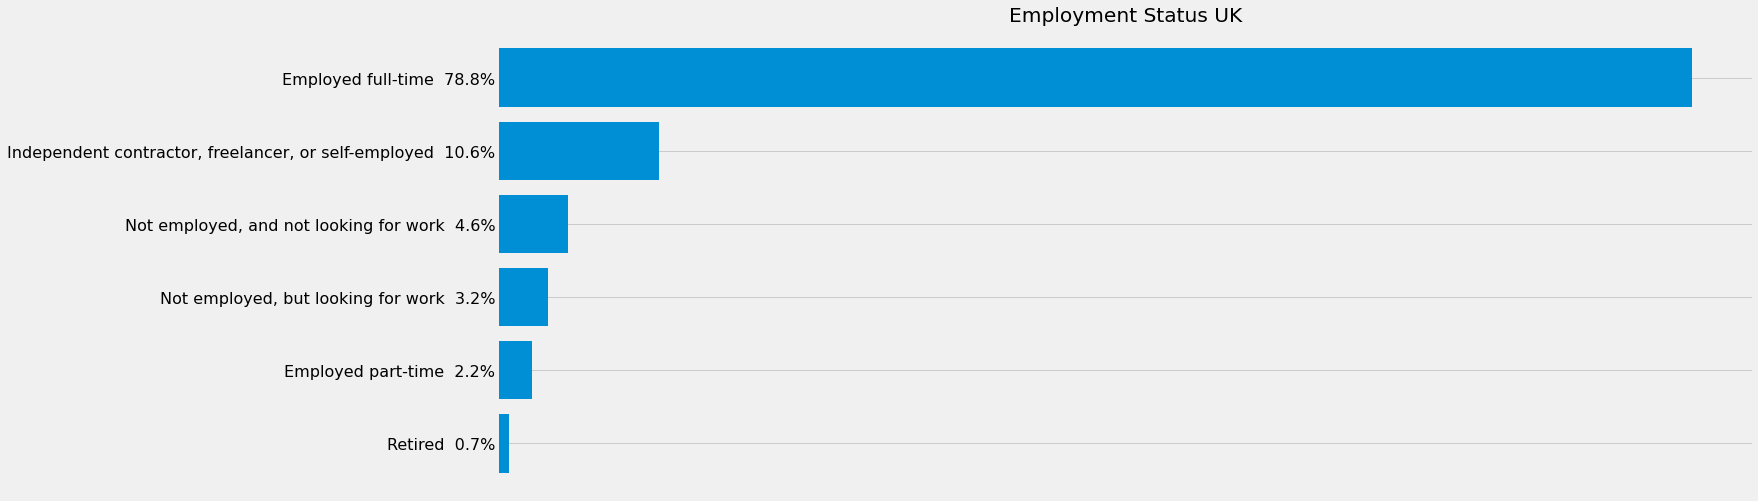

In [73]:
employment_status = data["Employment"]
employment_status.dropna(inplace = True)

employment_status_uk = data[(employment_status != "nan") & ((data["Country"] == "United Kingdom")  | (data["Country"] == "Ireland") )]
Employment_status_uk =  employment_status_uk["Employment"]

counted = Counter(Employment_status_uk)

counted_sorted = sort_dict_by_value(counted)

items = counted_sorted.items()

key_Phrases = []
Quantity =[]

for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])

Build_Barh_sizes( key_Phrases , Quantity, Employment_status_uk ,"fivethirtyeight", False , (20,8), "Employment Status UK")


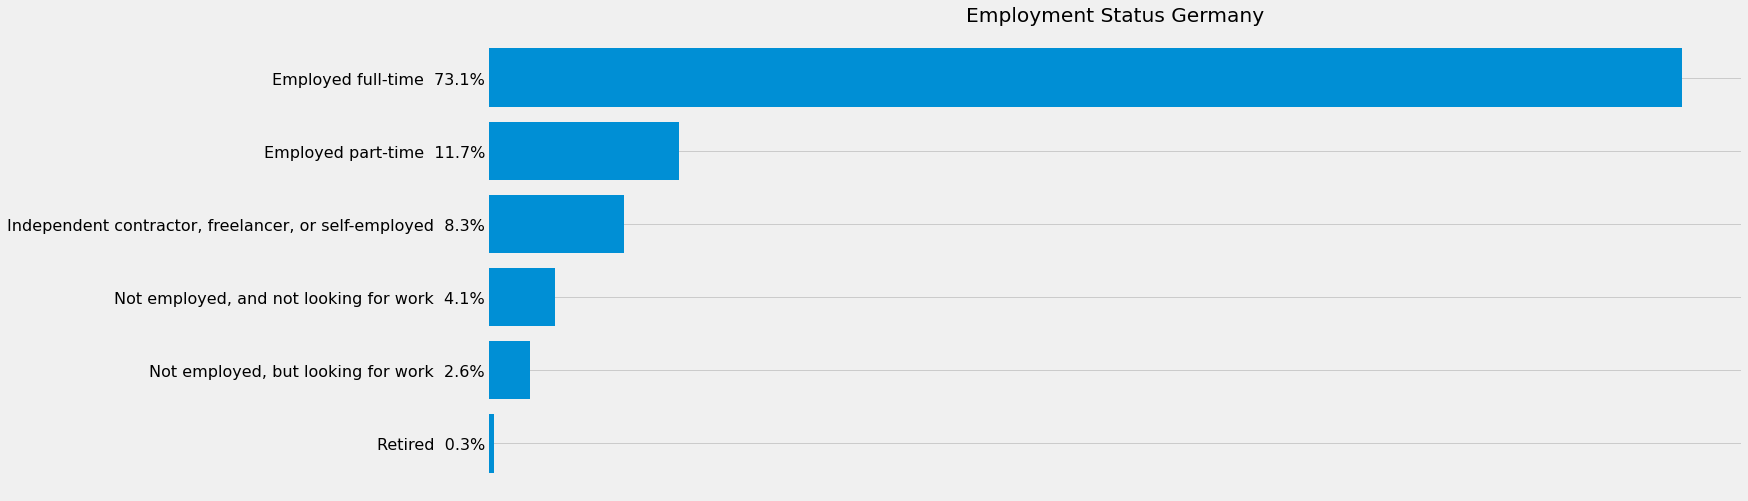

In [74]:
employment_status = data["Employment"]
employment_status.dropna(inplace = True)

employment_status_ger = data[(employment_status != "nan") & (data["Country"] == "Germany")]
Employment_status_ger =  employment_status_ger["Employment"]

counted = Counter(Employment_status_ger)

counted_sorted = sort_dict_by_value(counted)

items = counted_sorted.items()

key_Phrases = []
Quantity =[]

for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])

Build_Barh_sizes( key_Phrases , Quantity, Employment_status_ger ,"fivethirtyeight", False , (20,8), "Employment Status Germany")


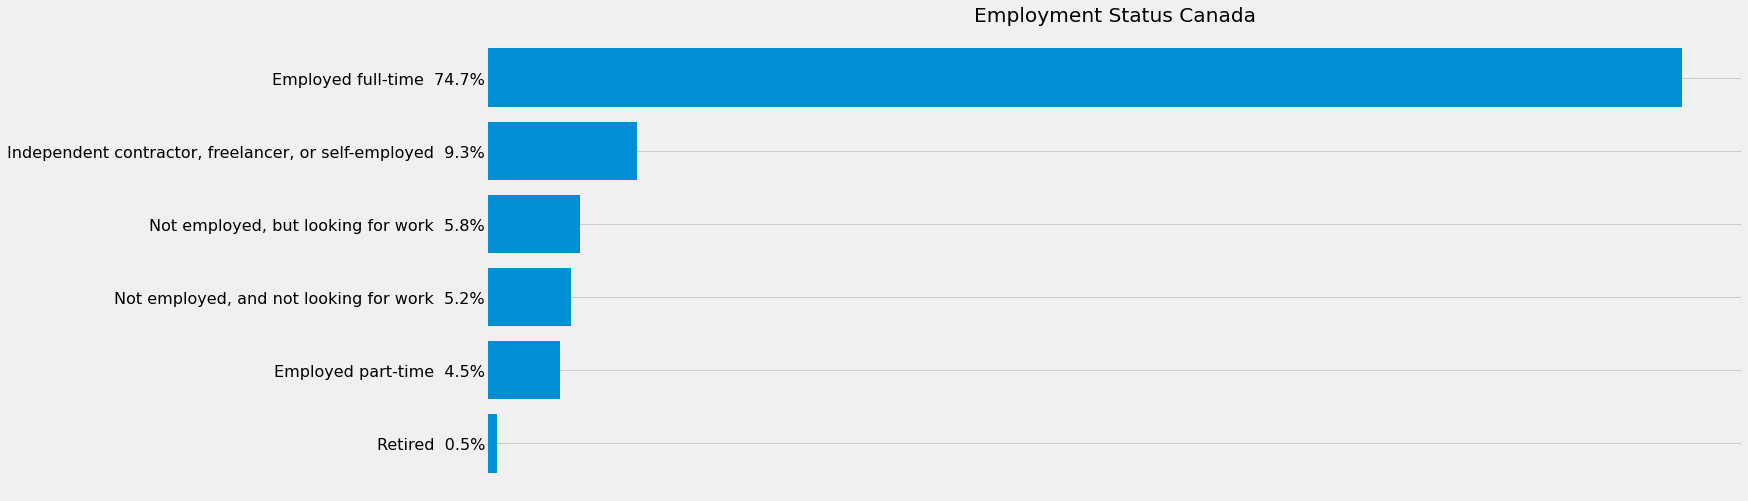

In [75]:
employment_status = data["Employment"]
employment_status.dropna(inplace = True)

employment_status_canada = data[(employment_status != "nan") & (data["Country"] == "Canada")]
Employment_status_canada =  employment_status_canada["Employment"]

counted = Counter(Employment_status_canada)

counted_sorted = sort_dict_by_value(counted)

items = counted_sorted.items()

key_Phrases = []
Quantity =[]

for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])

Build_Barh_sizes( key_Phrases , Quantity, Employment_status_canada ,"fivethirtyeight", False , (20,8), "Employment Status Canada")



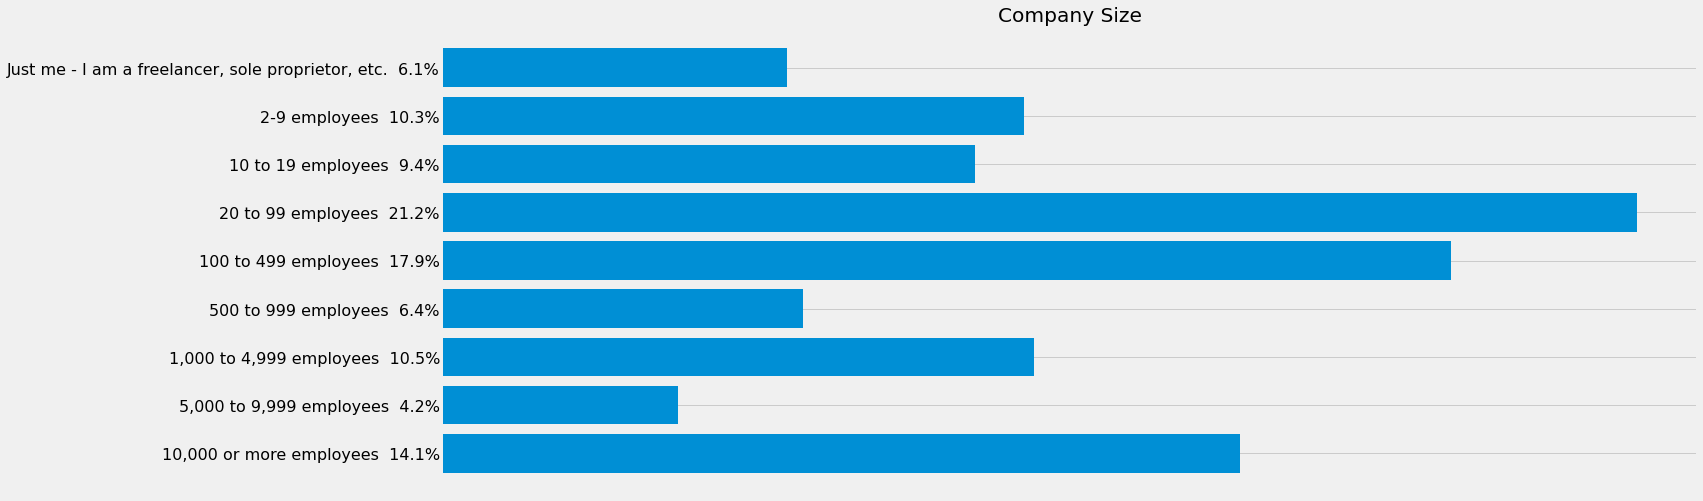

In [76]:
organization_size = data["OrgSize"]
organization_size.dropna(inplace = True)

counted = Counter(organization_size)

key_Phrases = ["Just me - I am a freelancer, sole proprietor, etc.", "2-9 employees", "10 to 19 employees","20 to 99 employees",
"100 to 499 employees", "500 to 999 employees", "1,000 to 4,999 employees", "5,000 to 9,999 employees", "10,000 or more employees"]
Quantity =[]

for i in key_Phrases:
    Quantity.append(counted[i])

key_Phrases.reverse()
Quantity.reverse()

Build_Barh_sizes( key_Phrases , Quantity, organization_size ,"fivethirtyeight", False , (20,8), "Company Size")


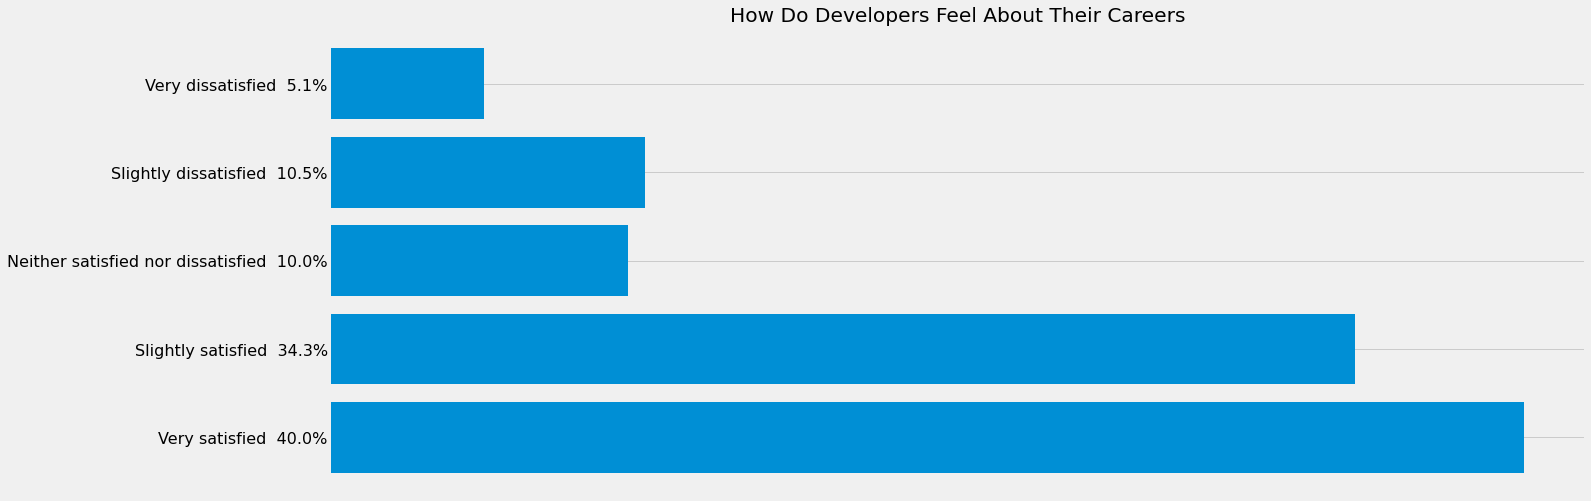

In [77]:
career_satisfaction = data["CareerSat"]
career_satisfaction.dropna(inplace = True)

counted = Counter(career_satisfaction)

key_Phrases = ["Very satisfied", "Slightly satisfied", "Neither satisfied nor dissatisfied", "Slightly dissatisfied", "Very dissatisfied"]
Quantity = []

for i in key_Phrases:
    Quantity.append(counted[i])

Build_Barh_sizes( key_Phrases , Quantity, career_satisfaction ,"fivethirtyeight", False , (20,8), "How Do Developers Feel About Their Careers")


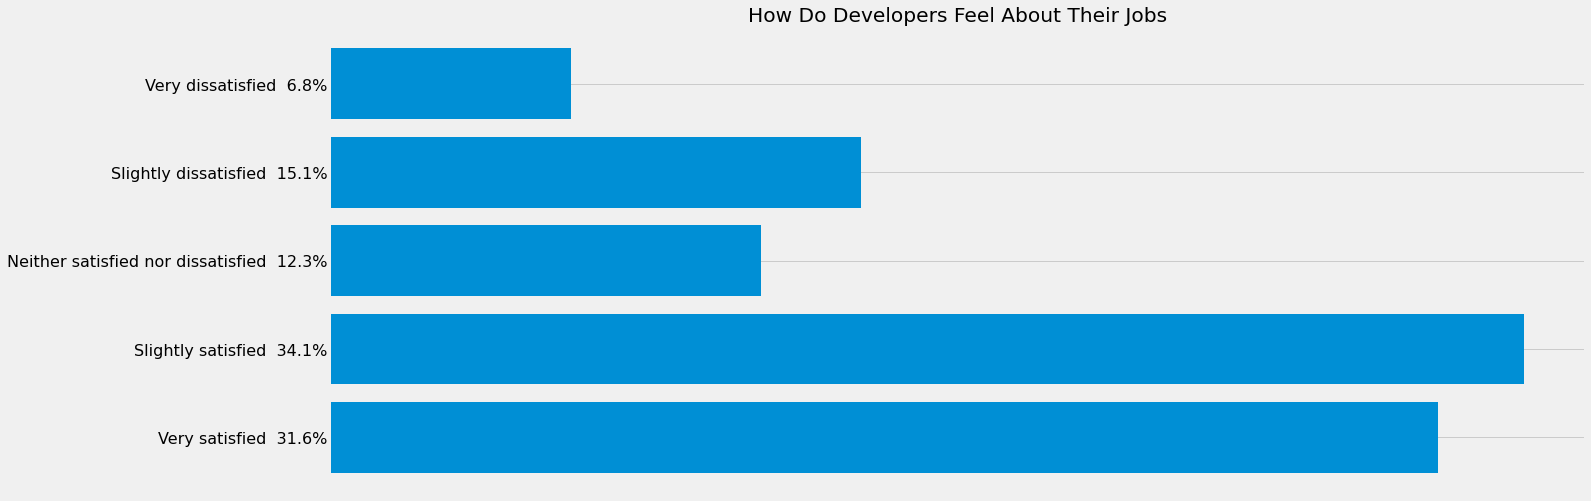

In [78]:
job_satisfaction =  data["JobSat"]
job_satisfaction.dropna(inplace = True)

counted = Counter(job_satisfaction)
key_Phrases = ["Very satisfied", "Slightly satisfied", "Neither satisfied nor dissatisfied", "Slightly dissatisfied", "Very dissatisfied"]
Quantity = []

for i in key_Phrases:
    Quantity.append(counted[i])

Build_Barh_sizes( key_Phrases , Quantity, job_satisfaction ,"fivethirtyeight", False , (20,8), "How Do Developers Feel About Their Jobs")

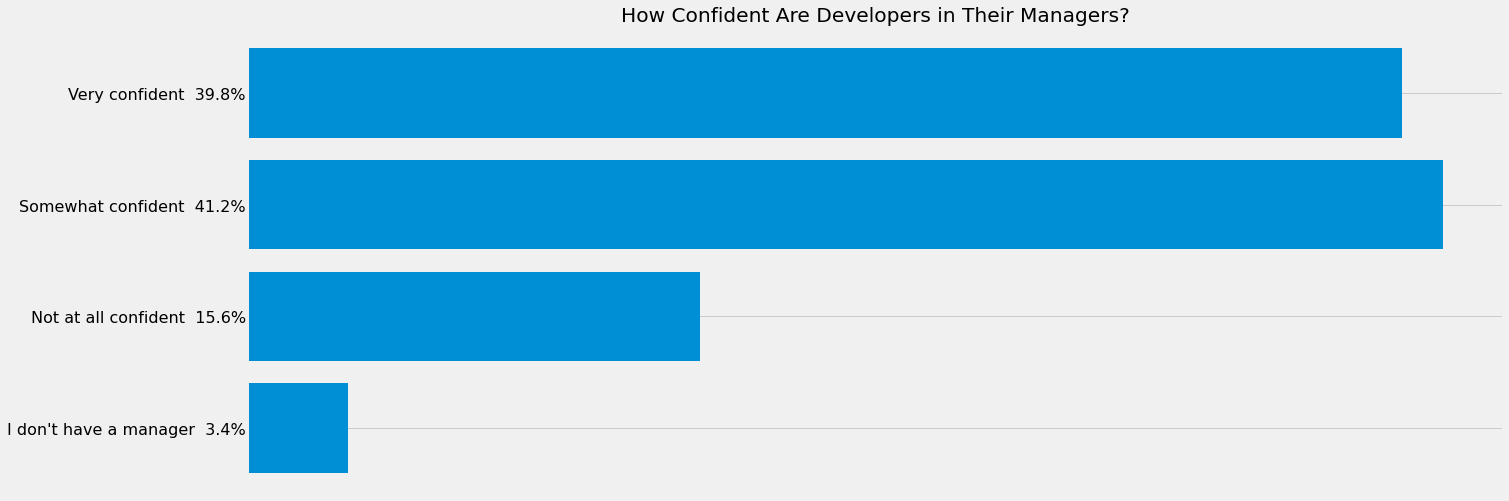

In [79]:
confidence = data["MgrIdiot"]
confidence.dropna(inplace  = True)
counted = Counter(confidence)

key_Phrases = ["I don't have a manager", "Not at all confident", "Somewhat confident", "Very confident"]
Quantity = []

for i in key_Phrases:
    Quantity.append(counted[i])

Build_Barh_sizes( key_Phrases , Quantity, confidence ,"fivethirtyeight", False , (20,8), "How Confident Are Developers in Their Managers?")


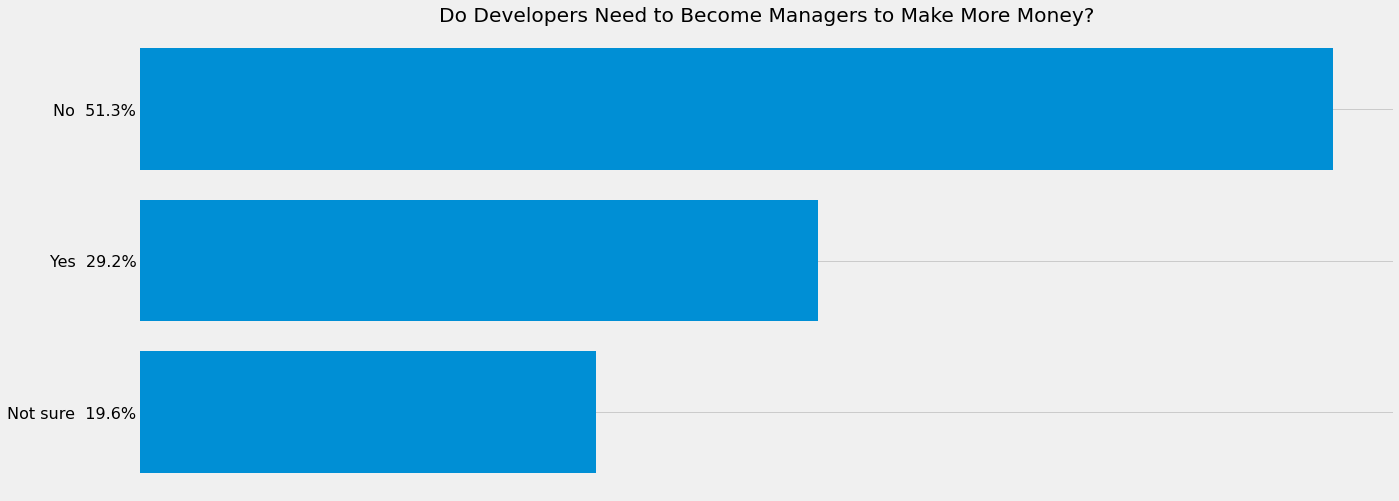

In [80]:
need_to_be_manager4_money = data["MgrMoney"]
need_to_be_manager4_money.dropna(inplace = True)

counted = Counter(need_to_be_manager4_money)
counted_sorted = sort_dict_by_value(counted)

items = counted_sorted.items()

key_Phrases = []
Quantity =[]

for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])

Build_Barh_sizes( key_Phrases , Quantity, need_to_be_manager4_money ,"fivethirtyeight", False , (20,8), "Do Developers Need to Become Managers to Make More Money?")




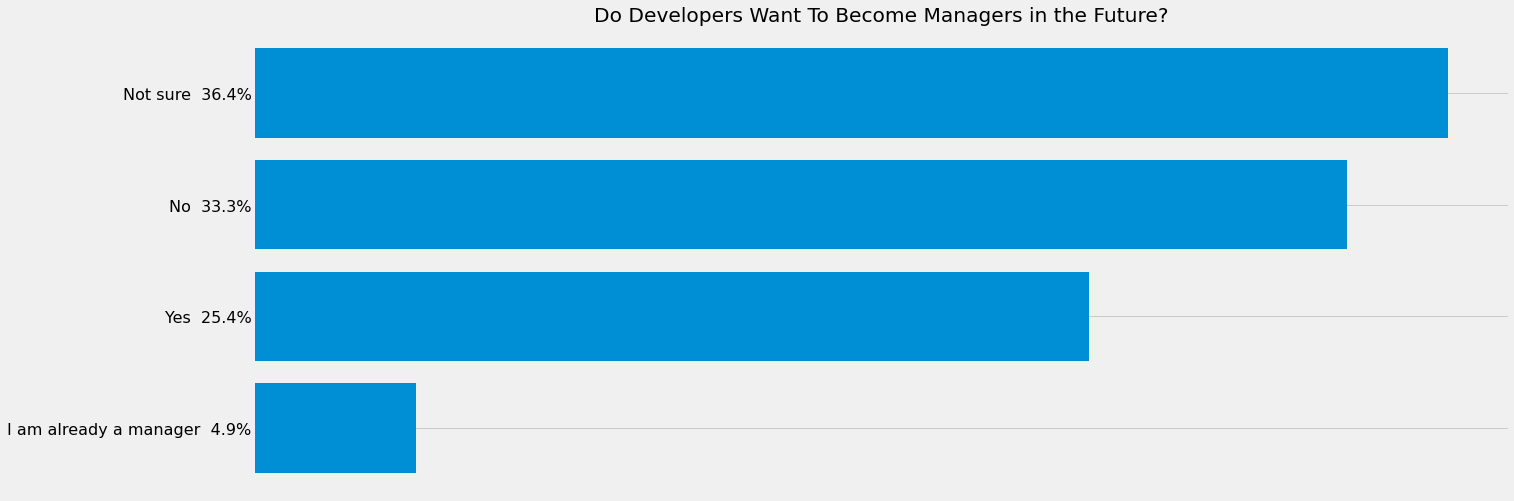

In [81]:
wanna_be_manager = data["MgrWant"]
wanna_be_manager.dropna(inplace = True)

counted = Counter(wanna_be_manager)

counted_sorted = sort_dict_by_value(counted)

items = counted_sorted.items()

key_Phrases = []
Quantity =[]

for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])

Build_Barh_sizes( key_Phrases , Quantity, wanna_be_manager ,"fivethirtyeight", False , (20,8), "Do Developers Want To Become Managers in the Future?")




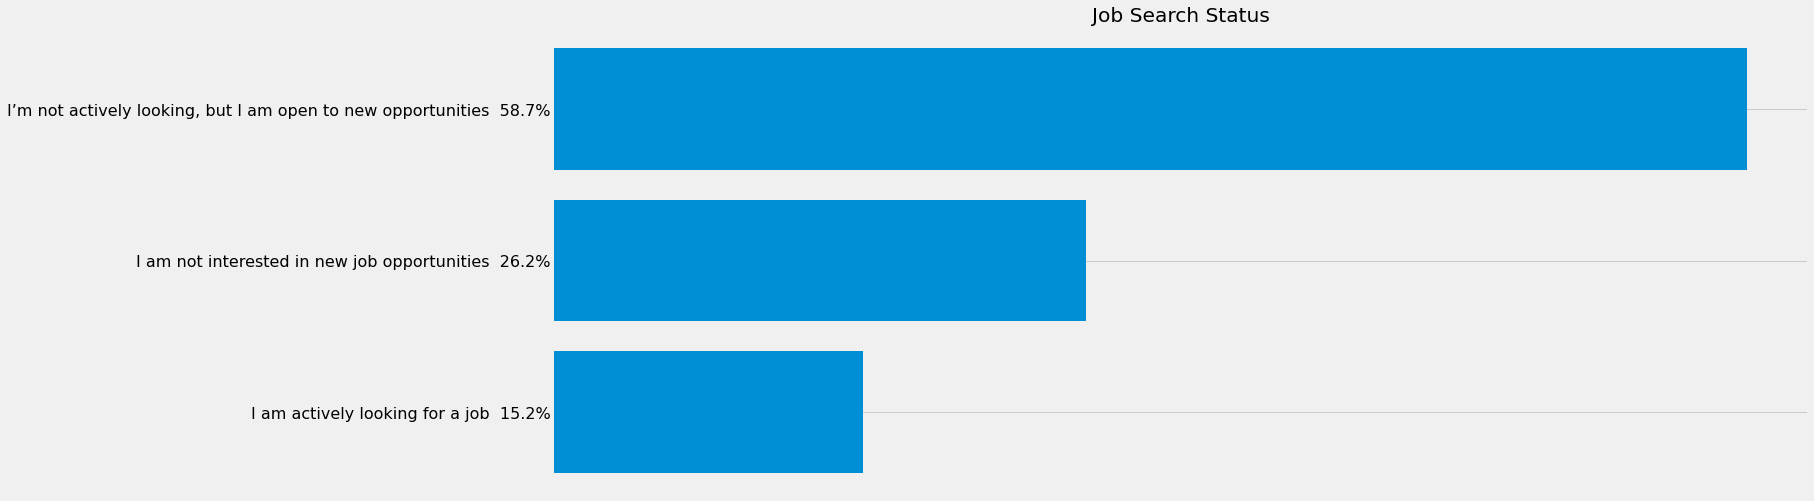

In [82]:
job_seek = data["JobSeek"]
job_seek.dropna(inplace = True)

counted  = Counter(job_seek)

counted_sorted = sort_dict_by_value(counted)

items = counted_sorted.items()

key_Phrases = []
Quantity =[]

for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])

Build_Barh_sizes( key_Phrases , Quantity, job_seek ,"fivethirtyeight", False , (20,8), "Job Search Status")


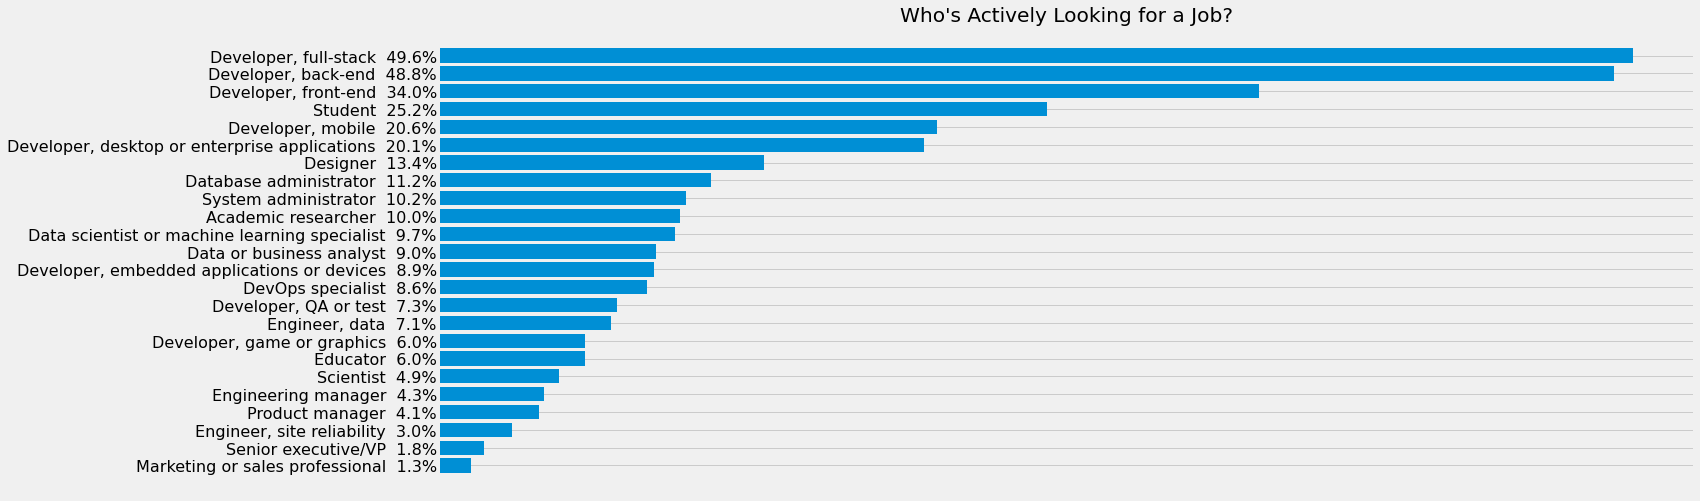

In [83]:
DevType = data["DevType"]    # ვიაძახებ მხოლოდ დეველოპერების პროფესიებს
DevType.dropna( inplace=True)

job_seek_by_devtype = data[(DevType != "nan")  & ((data["JobSeek"] == "I am actively looking for a job") )]
Job_seek_by_devtype = job_seek_by_devtype["DevType"]
Job_seek_by_devtype = Job_seek_by_devtype.str.split(";")

list_sorter_counter(Job_seek_by_devtype)

Build_Barh_sizes( key_Phrases , Quantity, Job_seek_by_devtype ,"fivethirtyeight", False , (20,8), "Who's Actively Looking for a Job?")


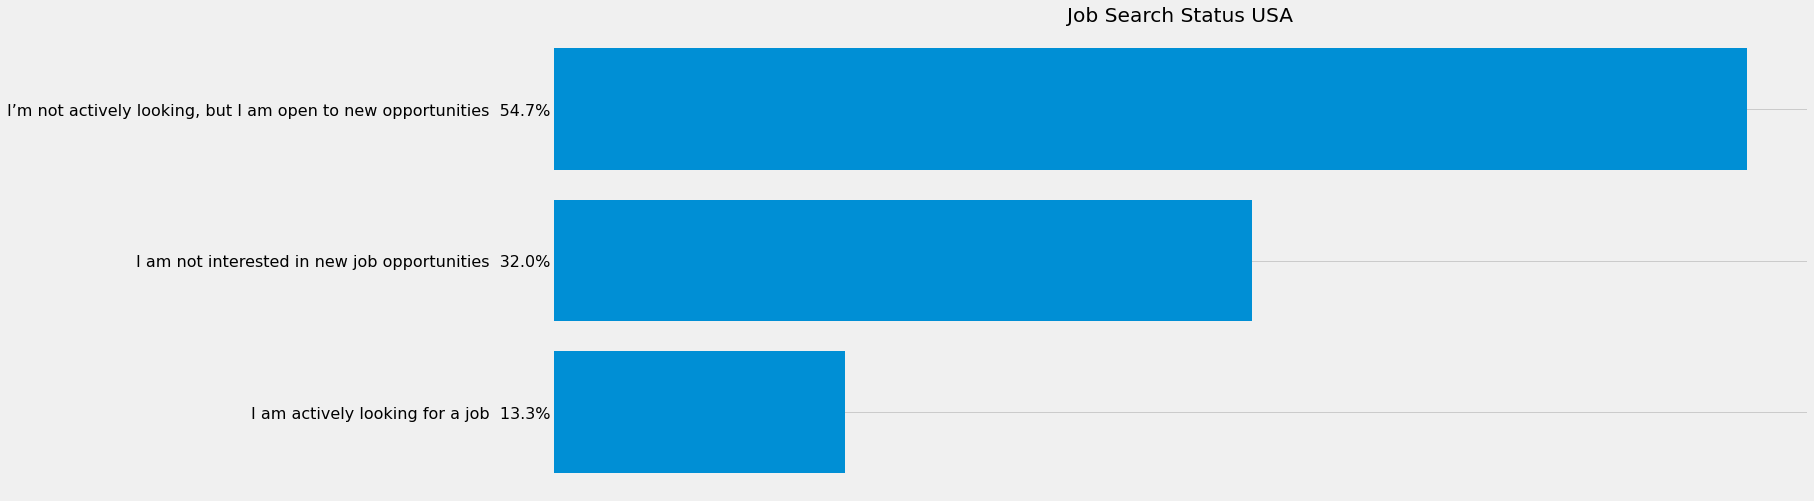

In [84]:
job_seek = data["JobSeek"]
job_seek.dropna(inplace = True)

job_seek_usa = data [(job_seek != "nan") & (data["Country"] == "United States")]
Job_seek_usa = job_seek_usa["JobSeek"]

counted =  Counter(Job_seek_usa)

counted_sorted = sort_dict_by_value(counted)

items = counted_sorted.items()

key_Phrases = []
Quantity =[]

for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])

Build_Barh_sizes( key_Phrases , Quantity, Job_seek_usa ,"fivethirtyeight", False , (20,8), "Job Search Status USA")


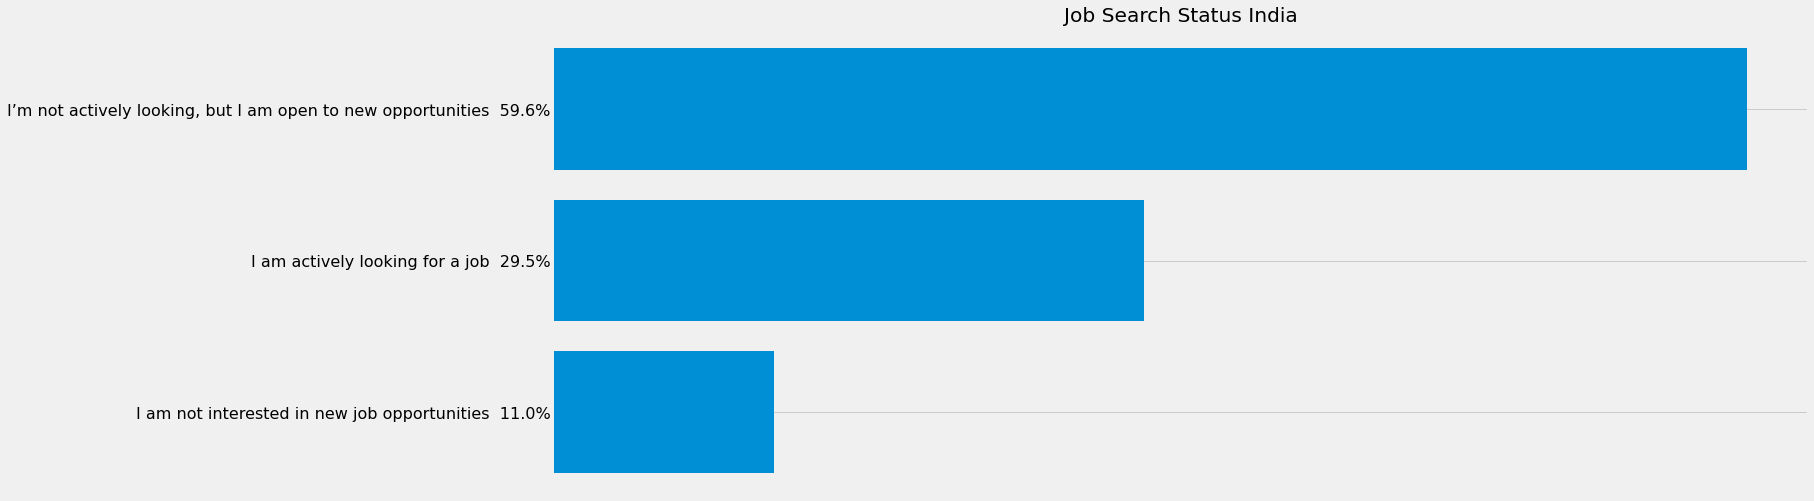

In [85]:
job_seek = data["JobSeek"]
job_seek.dropna(inplace = True)

job_seek_india = data [(job_seek != "nan") & (data["Country"] == "India")]
Job_seek_india = job_seek_india["JobSeek"]

counted =  Counter(Job_seek_india)

counted_sorted = sort_dict_by_value(counted)

items = counted_sorted.items()

key_Phrases = []
Quantity =[]

for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])

Build_Barh_sizes( key_Phrases , Quantity, Job_seek_india ,"fivethirtyeight", False , (20,8), "Job Search Status India")


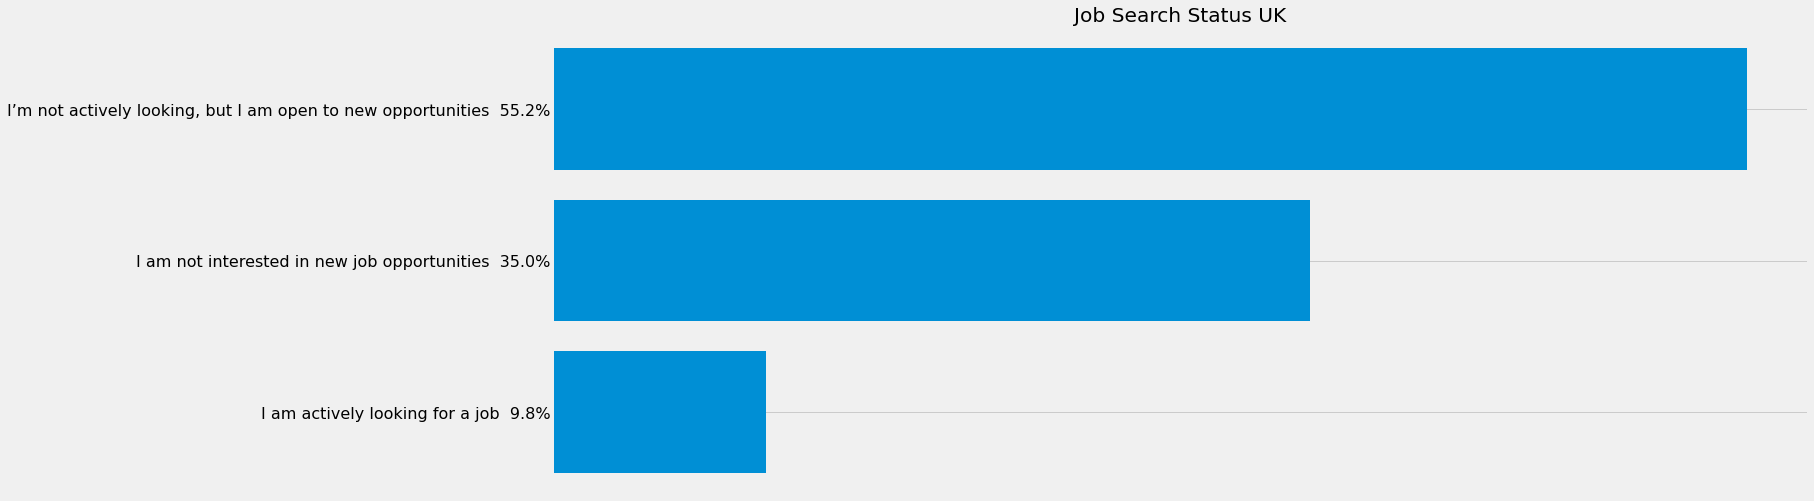

In [86]:
job_seek = data["JobSeek"]
job_seek.dropna(inplace = True)

job_seek_uk = data [(job_seek != "nan") & ((data["Country"] == "United Kingdom") | (data["Country"] == "Iceland") | (data["Country"] == "Ireland") )]
Job_seek_uk = job_seek_uk["JobSeek"]
counted =  Counter(Job_seek_uk)

counted_sorted = sort_dict_by_value(counted)

items = counted_sorted.items()

key_Phrases = []
Quantity =[]

for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])

Build_Barh_sizes( key_Phrases , Quantity, Job_seek_uk ,"fivethirtyeight", False , (20,8), "Job Search Status UK")

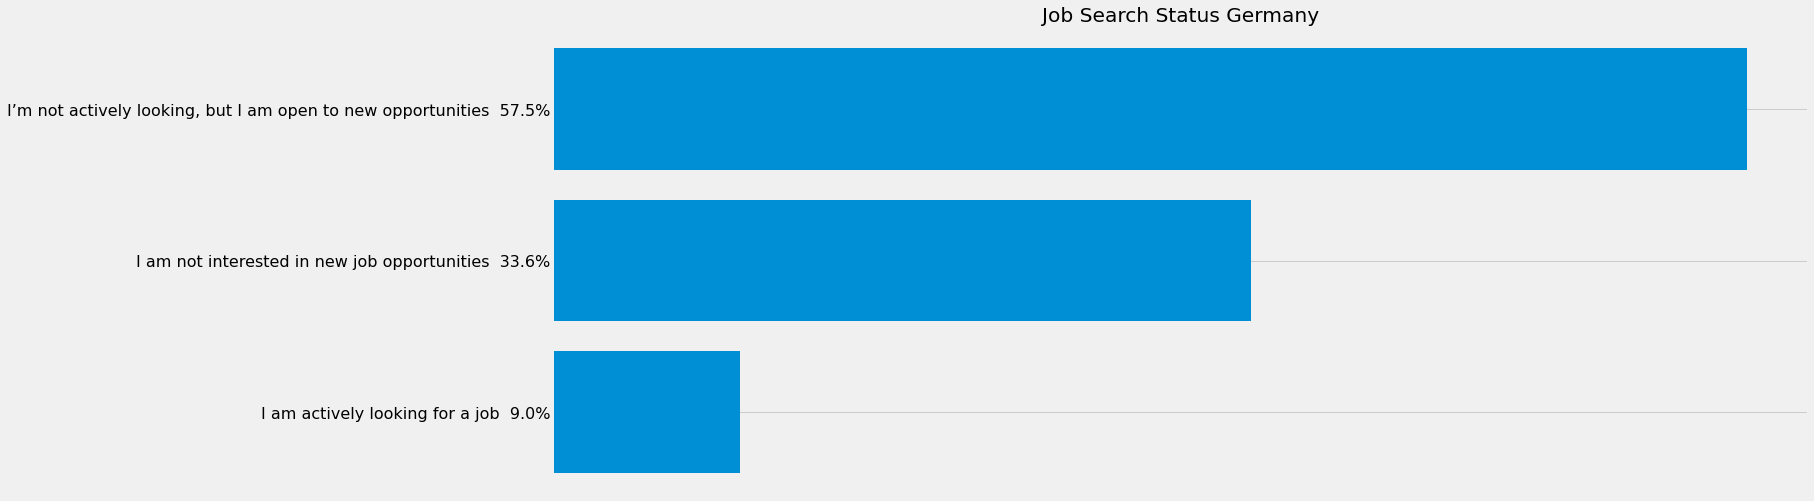

In [87]:
job_seek = data["JobSeek"]
job_seek.dropna(inplace = True)

job_seek_ger = data [(job_seek != "nan") & (data["Country"] == "Germany") ]
Job_seek_ger = job_seek_ger["JobSeek"]
counted =  Counter(Job_seek_ger)

counted_sorted = sort_dict_by_value(counted)

items = counted_sorted.items()

key_Phrases = []
Quantity =[]

for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])

Build_Barh_sizes( key_Phrases , Quantity, Job_seek_ger ,"fivethirtyeight", False , (20,8), "Job Search Status Germany")


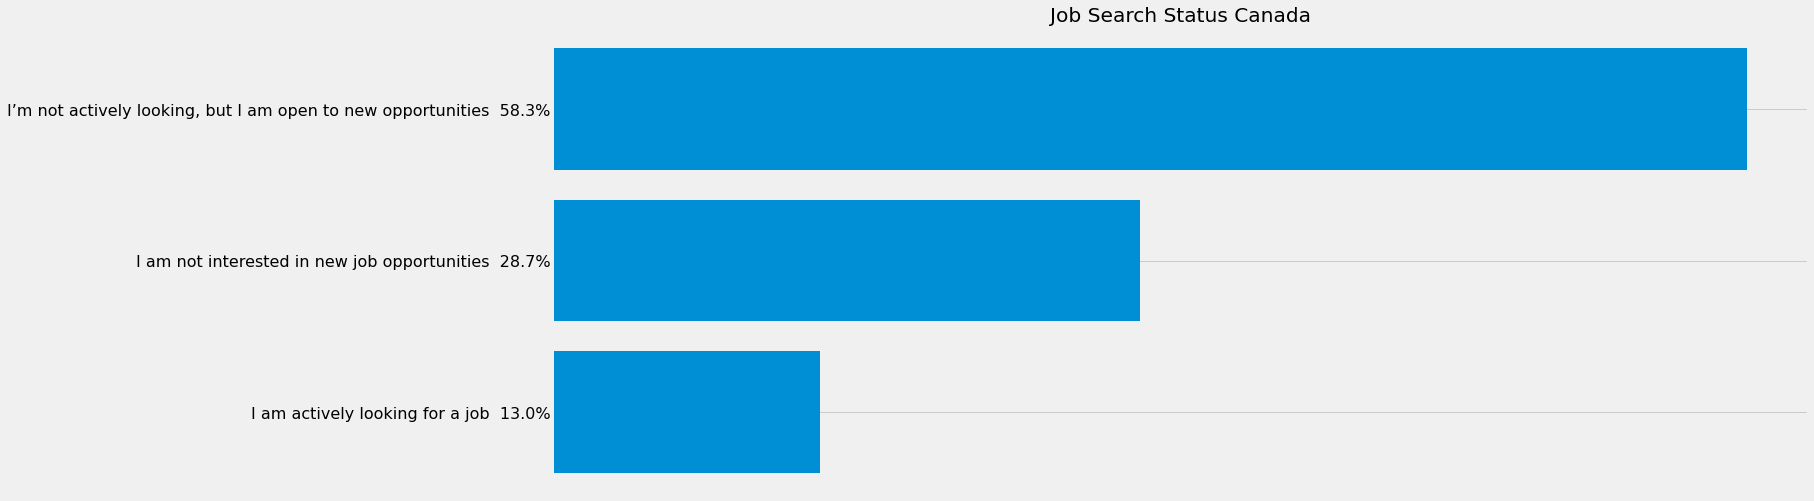

In [88]:
job_seek = data["JobSeek"]
job_seek.dropna(inplace = True)

job_seek_canada = data [(job_seek != "nan") & (data["Country"] == "Canada") ]
Job_seek_canada = job_seek_canada["JobSeek"]
counted =  Counter(Job_seek_canada)

counted_sorted = sort_dict_by_value(counted)

items = counted_sorted.items()

key_Phrases = []
Quantity =[]

for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])

Build_Barh_sizes( key_Phrases , Quantity, Job_seek_canada ,"fivethirtyeight", False , (20,8), "Job Search Status Canada")


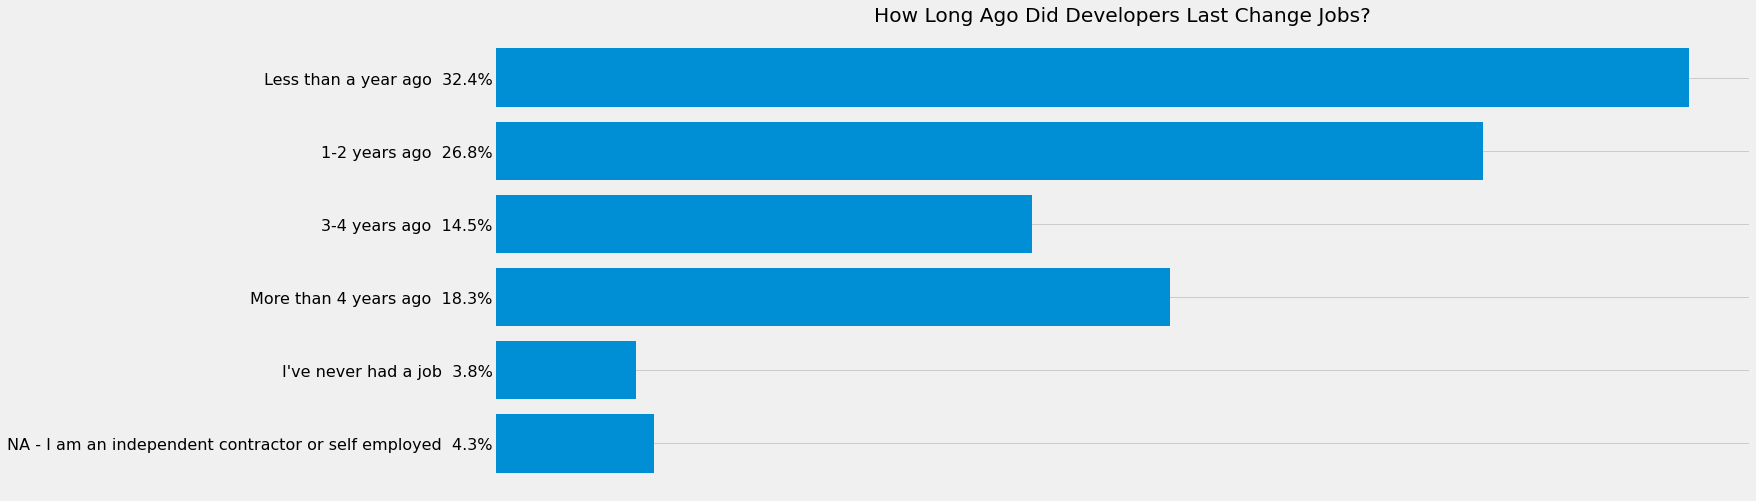

In [89]:
change_job = data["LastHireDate"]
change_job.dropna(inplace =True)

counted  = Counter(change_job)

key_Phrases  =["NA - I am an independent contractor or self employed", "I've never had a job", "More than 4 years ago", "3-4 years ago", 
 "1-2 years ago", "Less than a year ago"]

Quantity = []

for i in key_Phrases:
    Quantity.append(counted[i])

Build_Barh_sizes( key_Phrases , Quantity, change_job ,"fivethirtyeight", False , (20,8), "How Long Ago Did Developers Last Change Jobs?")




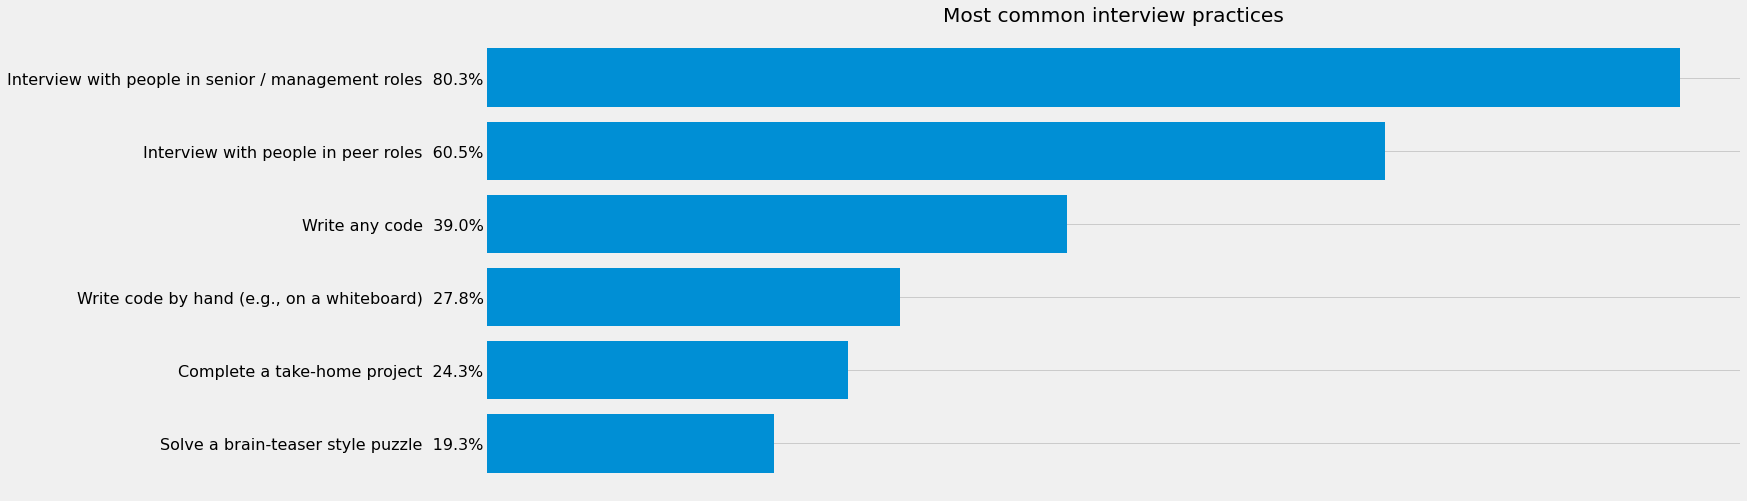

In [90]:
interview = data["LastInt"]
interview.dropna(inplace = True)
interview = interview.str.split(";")

list_sorter_counter(interview)
Build_Barh_sizes( key_Phrases , Quantity, interview ,"fivethirtyeight", False , (20,8), "Most common interview practices")


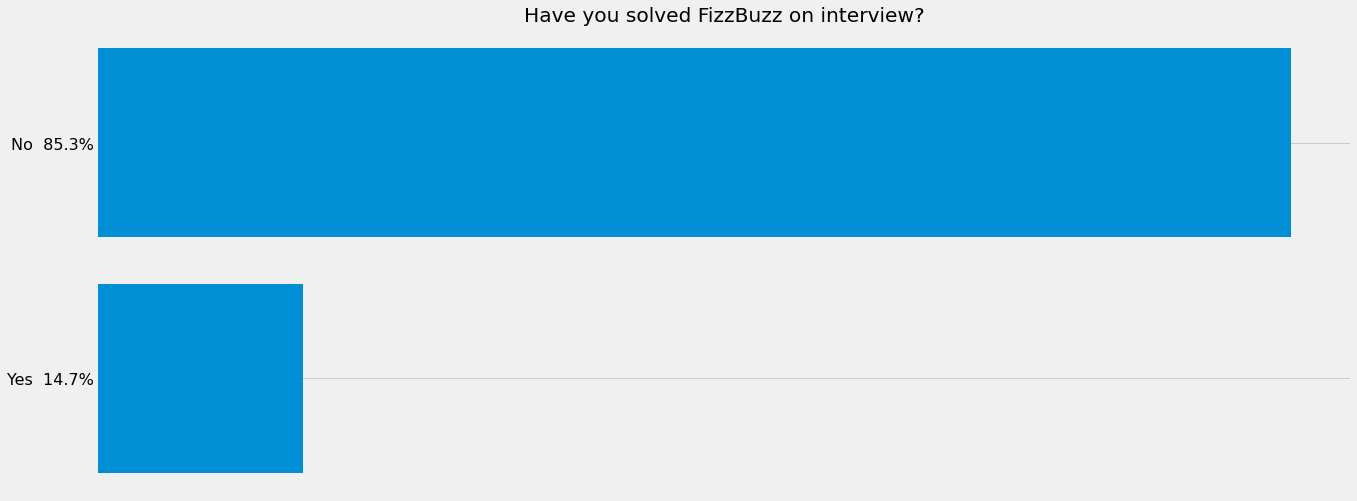

In [91]:
FizzBuzz = data["FizzBuzz"]
FizzBuzz.dropna(inplace = True)


counted  = Counter(FizzBuzz)

items  = counted.items()

key_Phrases = []
Quantity = []

for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])

key_Phrases.reverse()
Quantity.reverse()

Build_Barh_sizes( key_Phrases , Quantity, FizzBuzz ,"fivethirtyeight", False , (20,8), "Have you solved FizzBuzz on interview?")


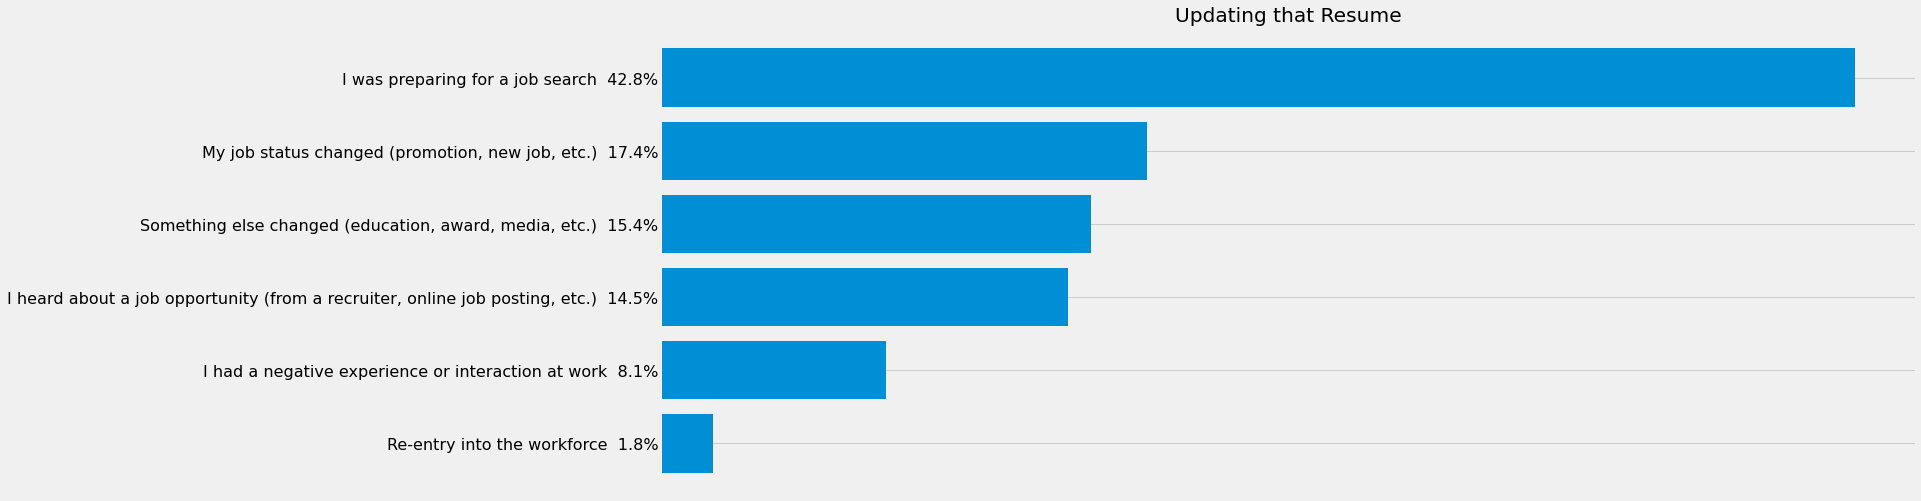

In [92]:
resume_update = data["ResumeUpdate"]
resume_update.dropna(inplace  = True)

counted  = Counter(resume_update)
counted_sorted  = sort_dict_by_value(counted)

items  = counted_sorted.items()

key_Phrases = []
Quantity = []

for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])


Build_Barh_sizes( key_Phrases , Quantity, resume_update ,"fivethirtyeight", False , (20,8), "Updating that Resume")


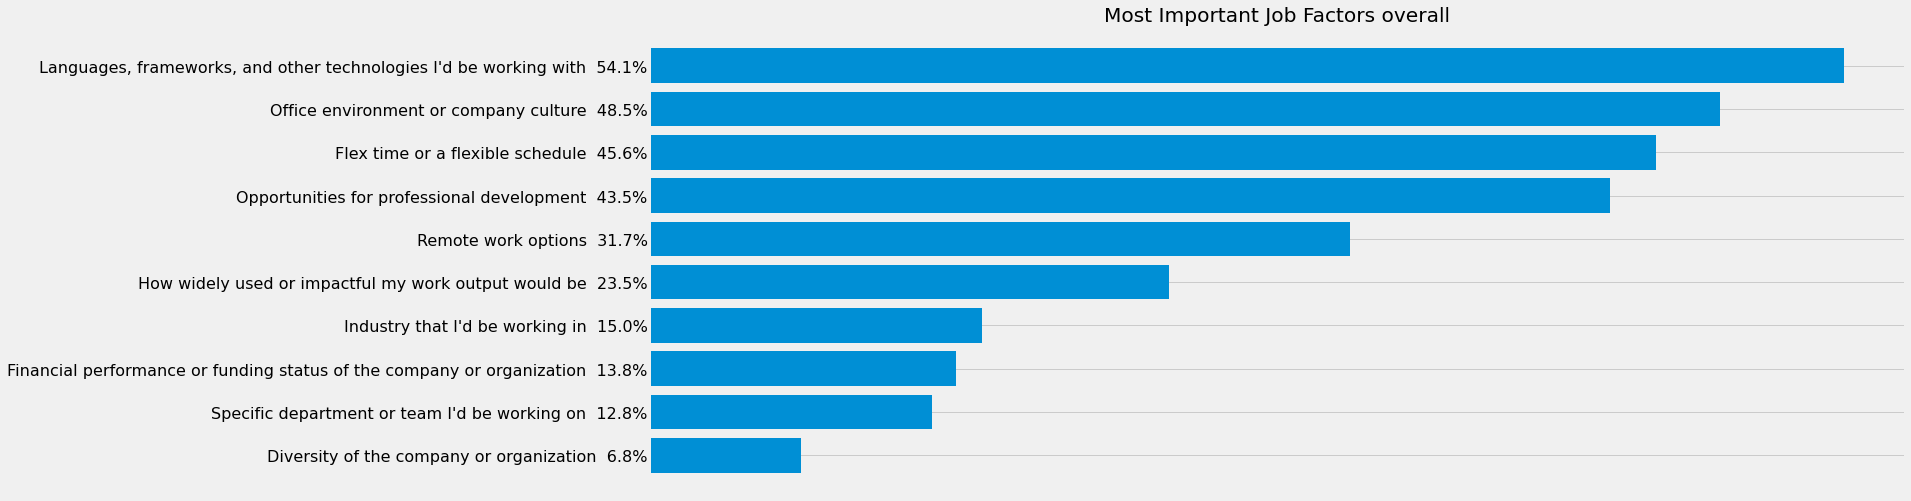

In [93]:
job_factor = data["JobFactors"]
job_factor.dropna(inplace = True)
job_factor = job_factor.str.split(";")

list_sorter_counter(job_factor)

Build_Barh_sizes( key_Phrases , Quantity, job_factor ,"fivethirtyeight", False , (20,8), "Most Important Job Factors overall")


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


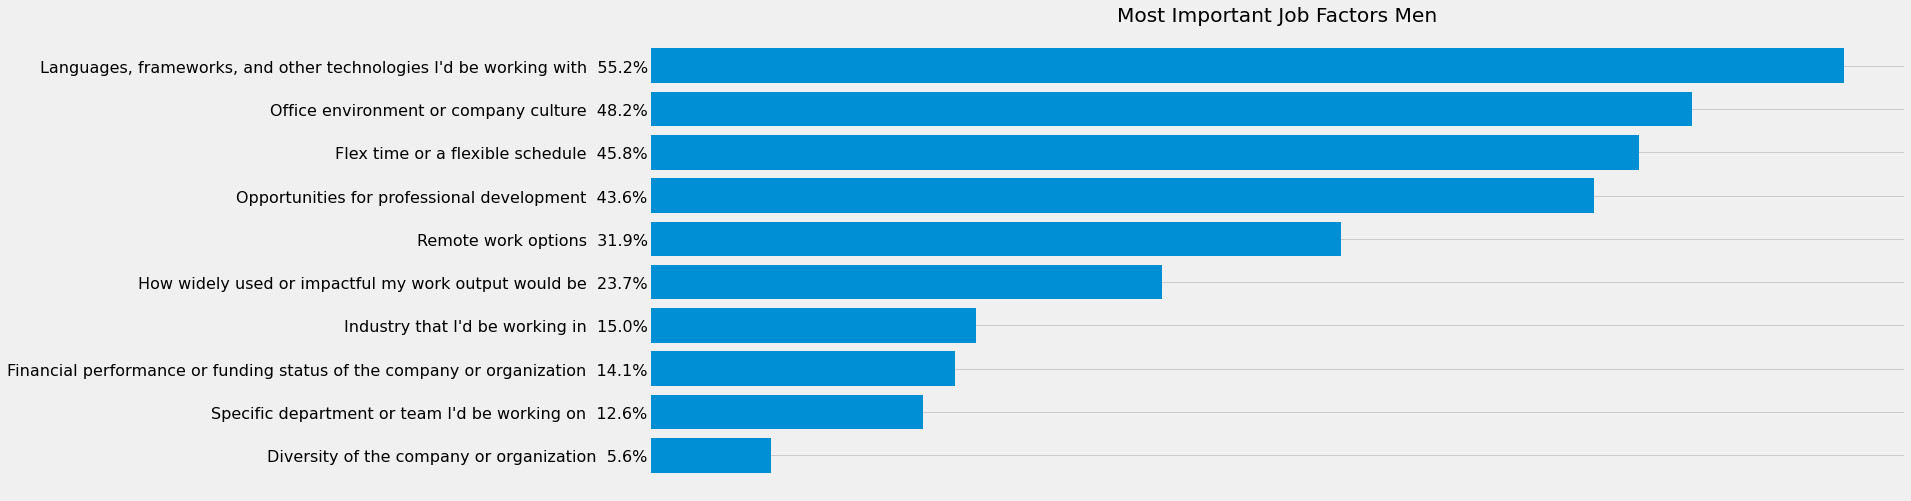

In [94]:
gender = data["Gender"]
gender.dropna(inplace = True)

list_for_men = []

for i in gender:
    if "Man" in i:
        list_for_men.append(i)

Counted = Counter(list_for_men)
new_list = list(Counted)

job_factor = data["JobFactors"]

all_info = []

for i in new_list:
    job_factors_men = data[(job_factor != "Nan") & (data["Gender"] == i) ]

    new_job_factors_men = job_factors_men['JobFactors']

    new_job_factors_men.dropna(inplace = True)

    for k in new_job_factors_men:
        all_info.append(k.split(";"))



list_sorter_counter(all_info)
Build_Barh_sizes( key_Phrases , Quantity, all_info ,"fivethirtyeight", False , (20,8), "Most Important Job Factors Men")


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


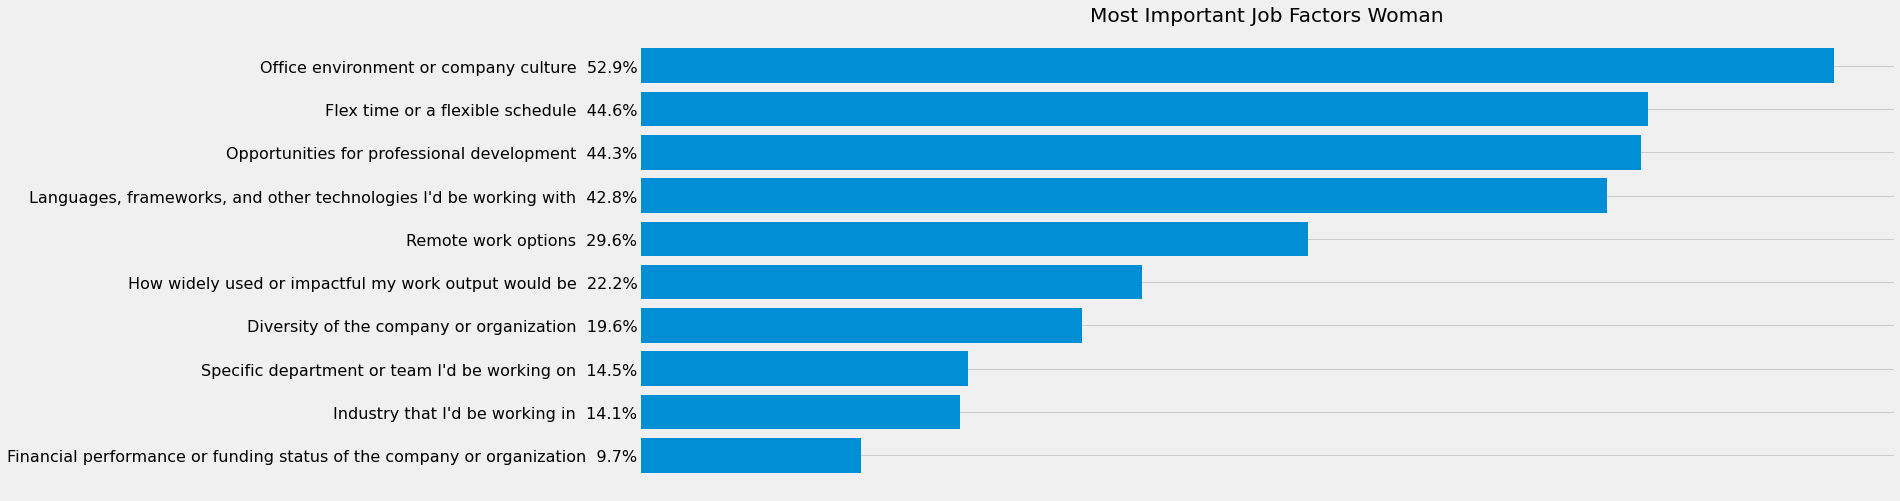

In [95]:

gender = data["Gender"]
gender.dropna(inplace = True)

list_for_woman = []

for i in gender:
    if "Woman" in i:
        list_for_woman.append(i)

Counted = Counter(list_for_woman)
new_list = list(Counted)

job_factor = data["JobFactors"]

all_info = []

for i in new_list:
    job_factors_woman = data[(job_factor != "Nan") & (data["Gender"] == i) ]

    new_job_factors_woman = job_factors_woman['JobFactors']

    new_job_factors_woman.dropna(inplace = True)

    for i in new_job_factors_woman:
        all_info.append(i.split(";"))



list_sorter_counter(all_info)
Build_Barh_sizes( key_Phrases , Quantity, all_info ,"fivethirtyeight", False , (20,8), "Most Important Job Factors Woman")


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


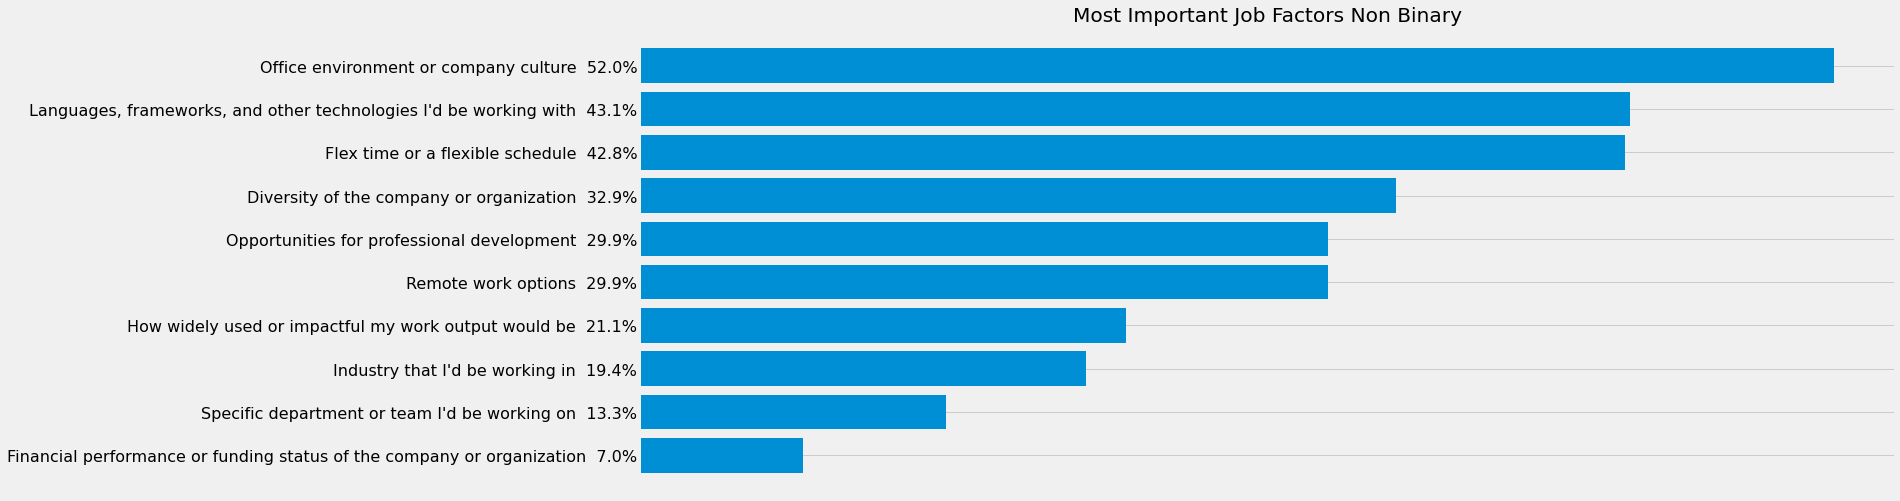

In [96]:

gender = data["Gender"]
gender.dropna(inplace = True)

list_for_no_gender = []

for i in gender:
    if "Non-binary, genderqueer, or gender non-conforming" in i:
        list_for_no_gender.append(i)

Counted = Counter(list_for_no_gender)
new_list = list(Counted)

job_factor = data["JobFactors"]

all_info = []

for i in new_list:
    job_factors_no_gender = data[(job_factor != "Nan") & (data["Gender"] == i) ]

    job_factors_no_gender = job_factors_no_gender['JobFactors']

    job_factors_no_gender.dropna(inplace = True)

    for i in job_factors_no_gender:
        all_info.append(i.split(";"))



list_sorter_counter(all_info)
Build_Barh_sizes( key_Phrases , Quantity, all_info ,"fivethirtyeight", False , (20,8), "Most Important Job Factors Non Binary")


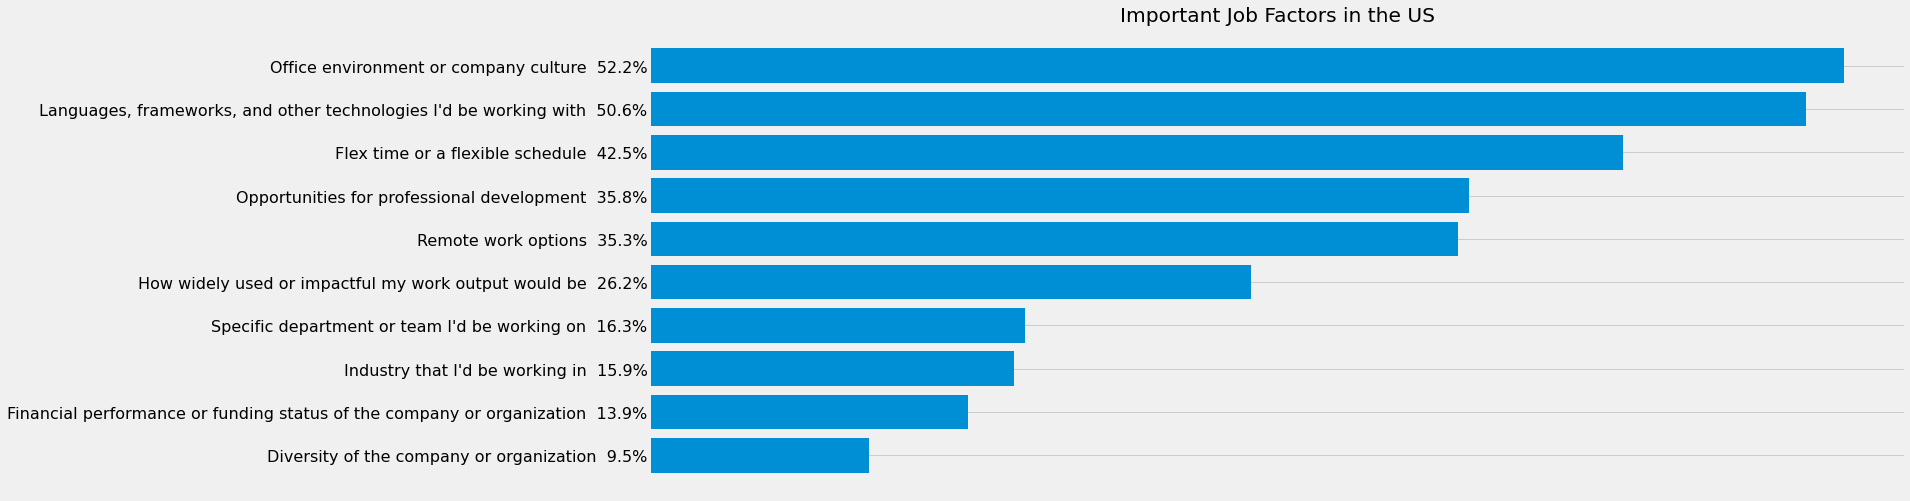

In [97]:
job_factors  = data["JobFactors"]
job_factors.dropna(inplace = True )

job_factors_usa =  data[(job_factors != "nan")   &  (data["Country"] == "United States")]
Job_factors_usa = job_factors_usa["JobFactors"]
Job_factors_usa = Job_factors_usa.str.split(";")

list_sorter_counter(Job_factors_usa)

Build_Barh_sizes( key_Phrases , Quantity, Job_factors_usa ,"fivethirtyeight", False , (20,8), "Important Job Factors in the US")


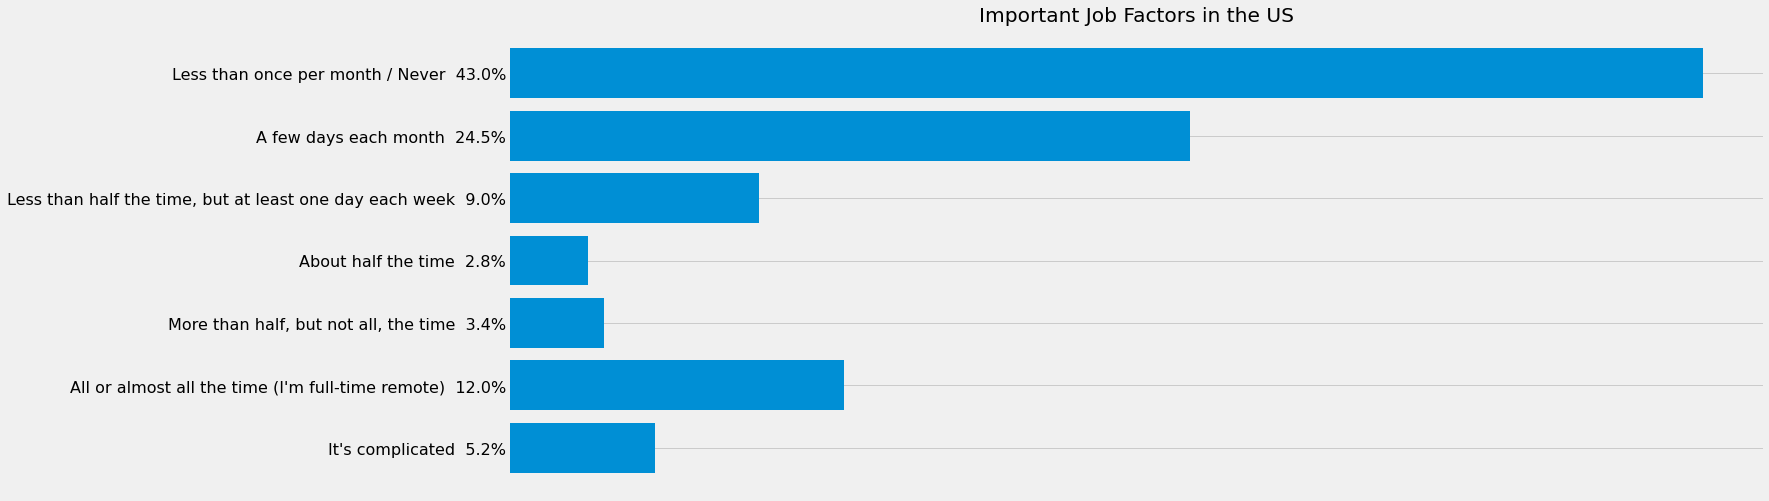

In [98]:
work_remotely  = data["WorkRemote"]
work_remotely.dropna(inplace = True)

counted = Counter(work_remotely)
key_Phrases = ["It's complicated","All or almost all the time (I'm full-time remote)", "More than half, but not all, the time", 
"About half the time","Less than half the time, but at least one day each week", "A few days each month", "Less than once per month / Never"]

Quantity = []

for i in key_Phrases:
    Quantity.append(counted[i])

Build_Barh_sizes( key_Phrases , Quantity, work_remotely ,"fivethirtyeight", False , (20,8), "Important Job Factors in the US")


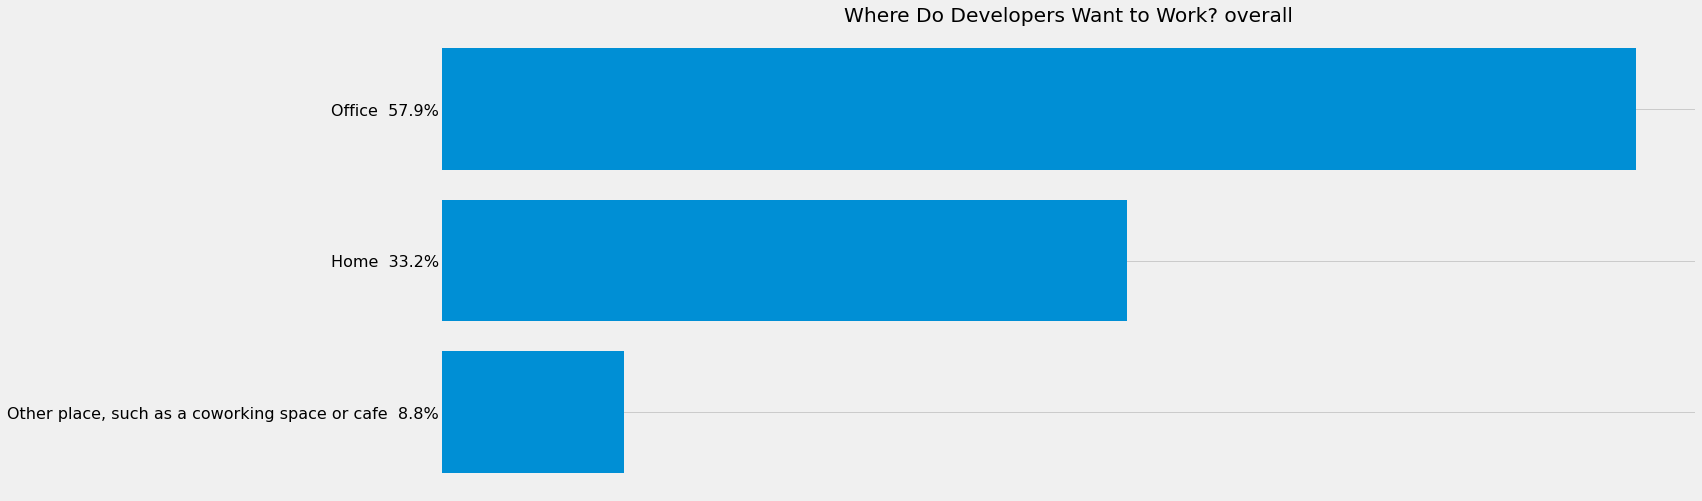

In [99]:
working_location = data["WorkLoc"]
working_location.dropna(inplace = True )

counted = Counter(working_location)
counted_sorted = sort_dict_by_value(counted)
items = counted_sorted.items()

key_Phrases = []
Quantity = []

for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])

Build_Barh_sizes( key_Phrases , Quantity, working_location ,"fivethirtyeight", False , (20,8), "Where Do Developers Want to Work? overall")


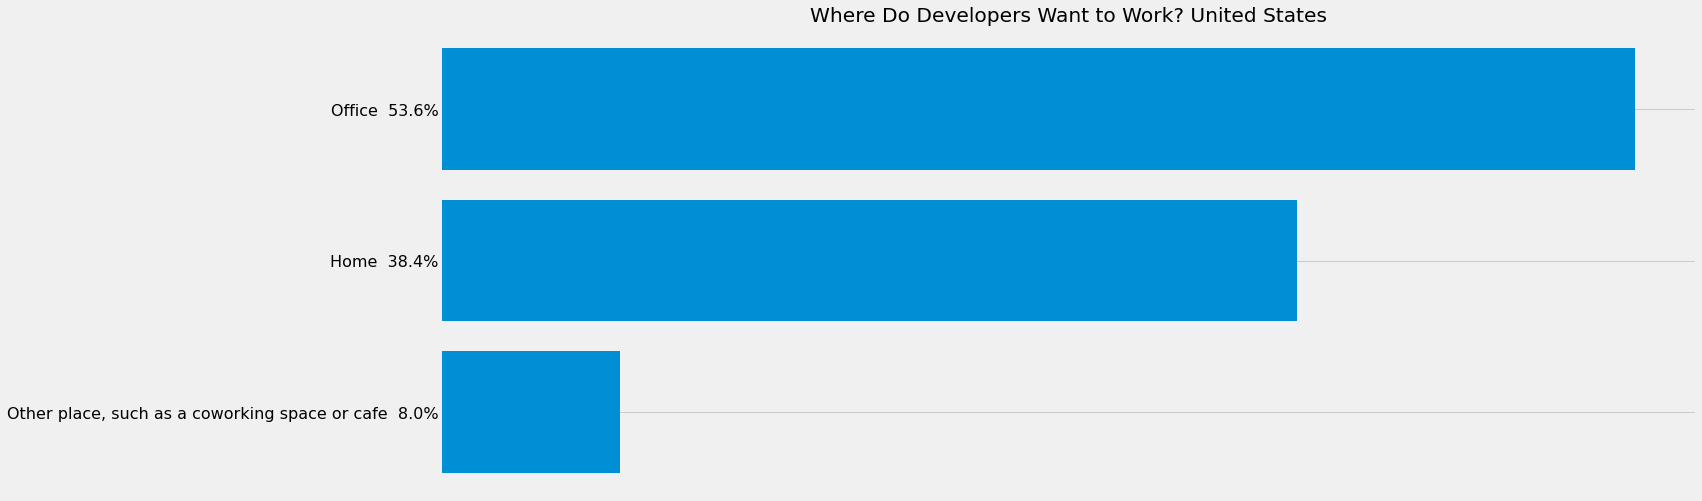

In [100]:
working_location = data["WorkLoc"]
working_location.dropna(inplace = True )


working_loc_usa = data[(working_location != "nan")  & (data["Country"] == "United States")]
Working_loc_usa = working_loc_usa["WorkLoc"]

counted = Counter(Working_loc_usa)
counted_sorted = sort_dict_by_value(counted)
items = counted_sorted.items()

key_Phrases = []
Quantity = []

for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])

Build_Barh_sizes( key_Phrases , Quantity, Working_loc_usa ,"fivethirtyeight", False , (20,8), "Where Do Developers Want to Work? United States")


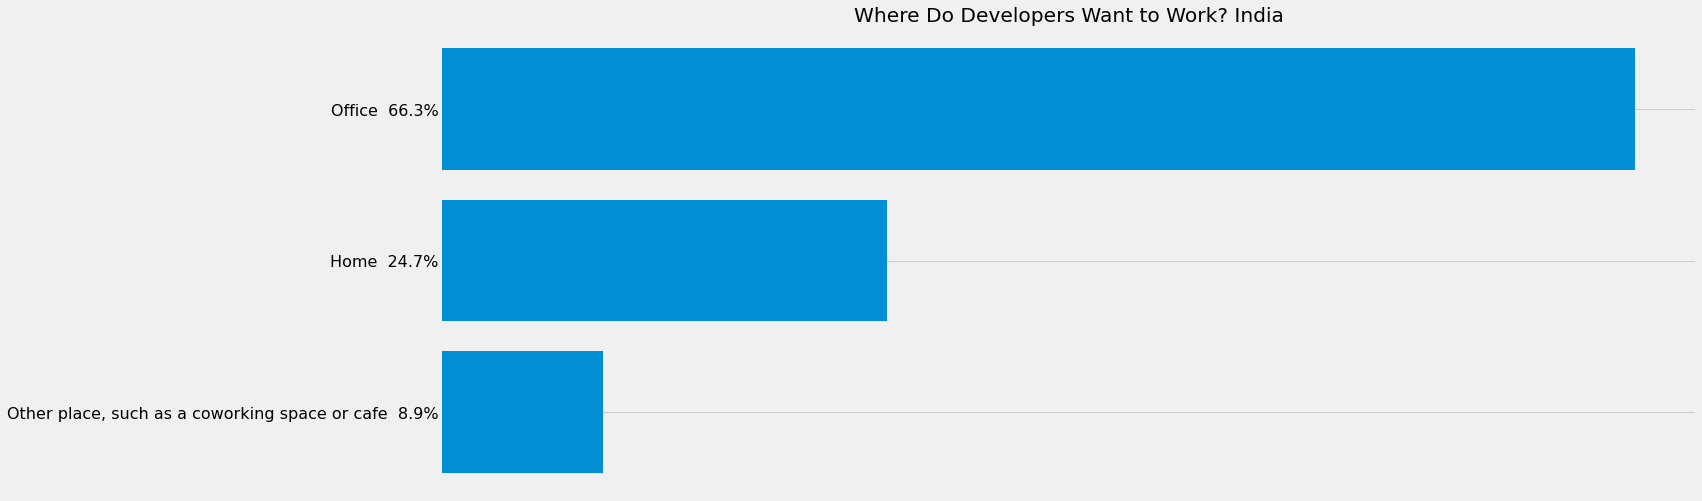

In [101]:
working_location = data["WorkLoc"]
working_location.dropna(inplace = True )


working_loc_india = data[(working_location != "nan")  & (data["Country"] == "India")]
Working_loc_india = working_loc_india["WorkLoc"]

counted = Counter(Working_loc_india)
counted_sorted = sort_dict_by_value(counted)
items = counted_sorted.items()

key_Phrases = []
Quantity = []

for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])

Build_Barh_sizes( key_Phrases , Quantity, Working_loc_india ,"fivethirtyeight", False , (20,8), "Where Do Developers Want to Work? India")


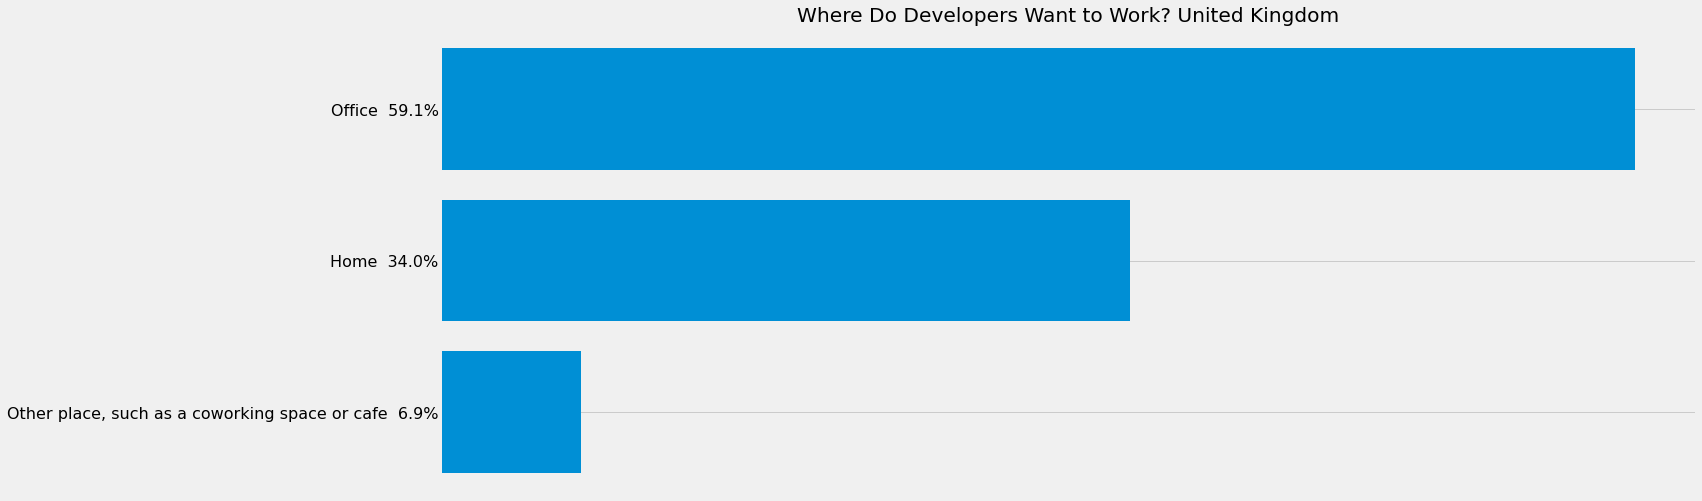

In [102]:
working_location = data["WorkLoc"]
working_location.dropna(inplace = True )


working_loc_uk = data[(working_location != "nan")  & ((data["Country"] == "United Kingdom") | (data["Country"] == "Ireland") )]
Working_loc_uk = working_loc_uk["WorkLoc"]

counted = Counter(Working_loc_uk)
counted_sorted = sort_dict_by_value(counted)
items = counted_sorted.items()

key_Phrases = []
Quantity = []

for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])

Build_Barh_sizes( key_Phrases , Quantity, Working_loc_uk ,"fivethirtyeight", False , (20,8), "Where Do Developers Want to Work? United Kingdom")


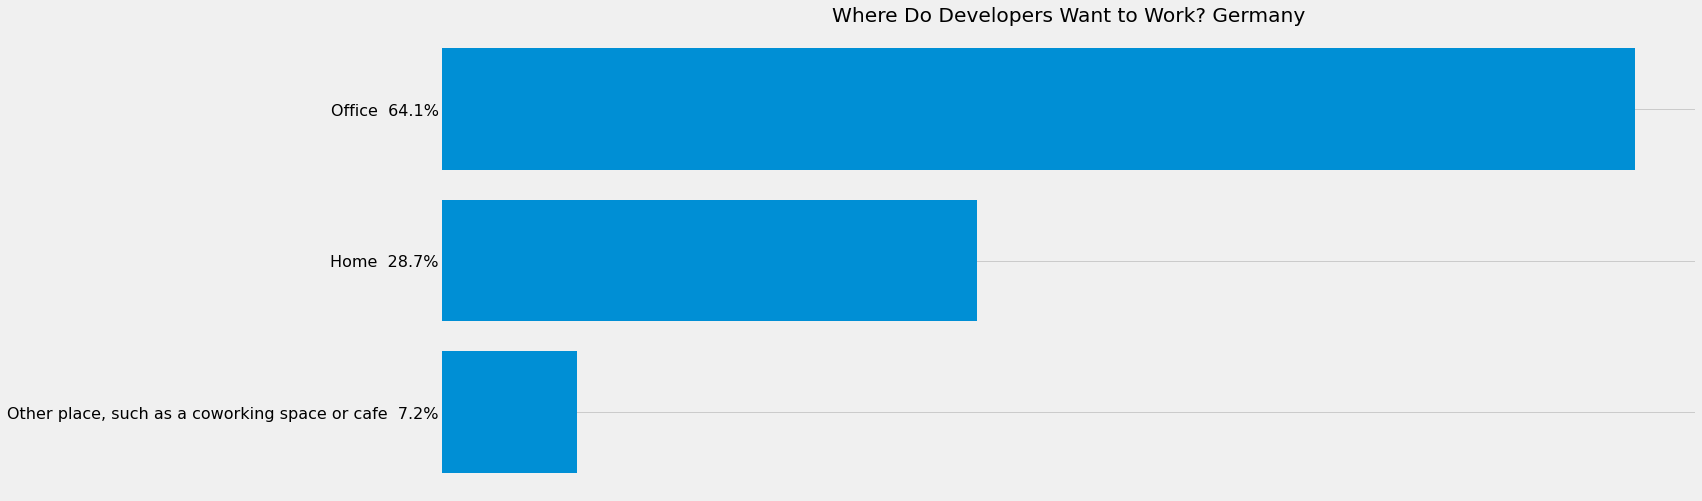

In [103]:
working_location = data["WorkLoc"]
working_location.dropna(inplace = True )


working_loc_germany = data[(working_location != "nan")  & (data["Country"] == "Germany")]
Working_loc_germany = working_loc_germany["WorkLoc"]

counted = Counter(Working_loc_germany)
counted_sorted = sort_dict_by_value(counted)
items = counted_sorted.items()

key_Phrases = []
Quantity = []

for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])

Build_Barh_sizes( key_Phrases , Quantity, Working_loc_germany ,"fivethirtyeight", False , (20,8), "Where Do Developers Want to Work? Germany")


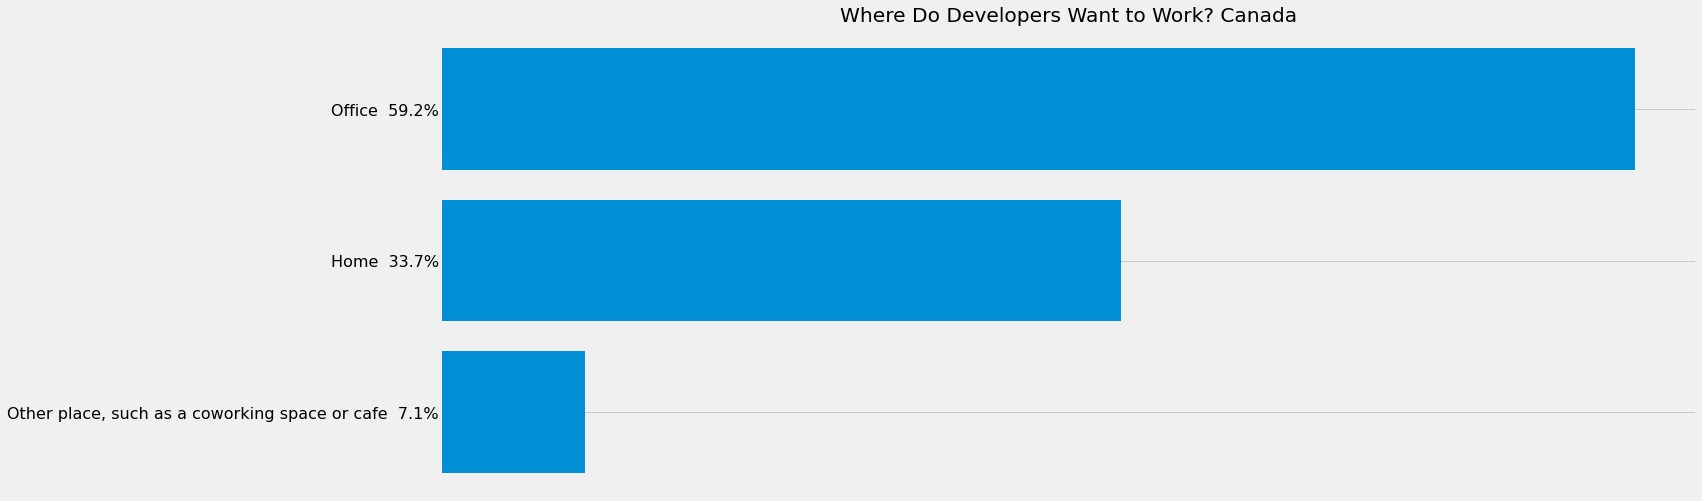

In [104]:
working_location = data["WorkLoc"]
working_location.dropna(inplace = True )


working_loc_canada = data[(working_location != "nan")  & (data["Country"] == "Canada")]
Working_loc_canada = working_loc_canada["WorkLoc"]

counted = Counter(Working_loc_canada)
counted_sorted = sort_dict_by_value(counted)
items = counted_sorted.items()

key_Phrases = []
Quantity = []

for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])

Build_Barh_sizes( key_Phrases , Quantity, Working_loc_canada ,"fivethirtyeight", False , (20,8), "Where Do Developers Want to Work? Canada")


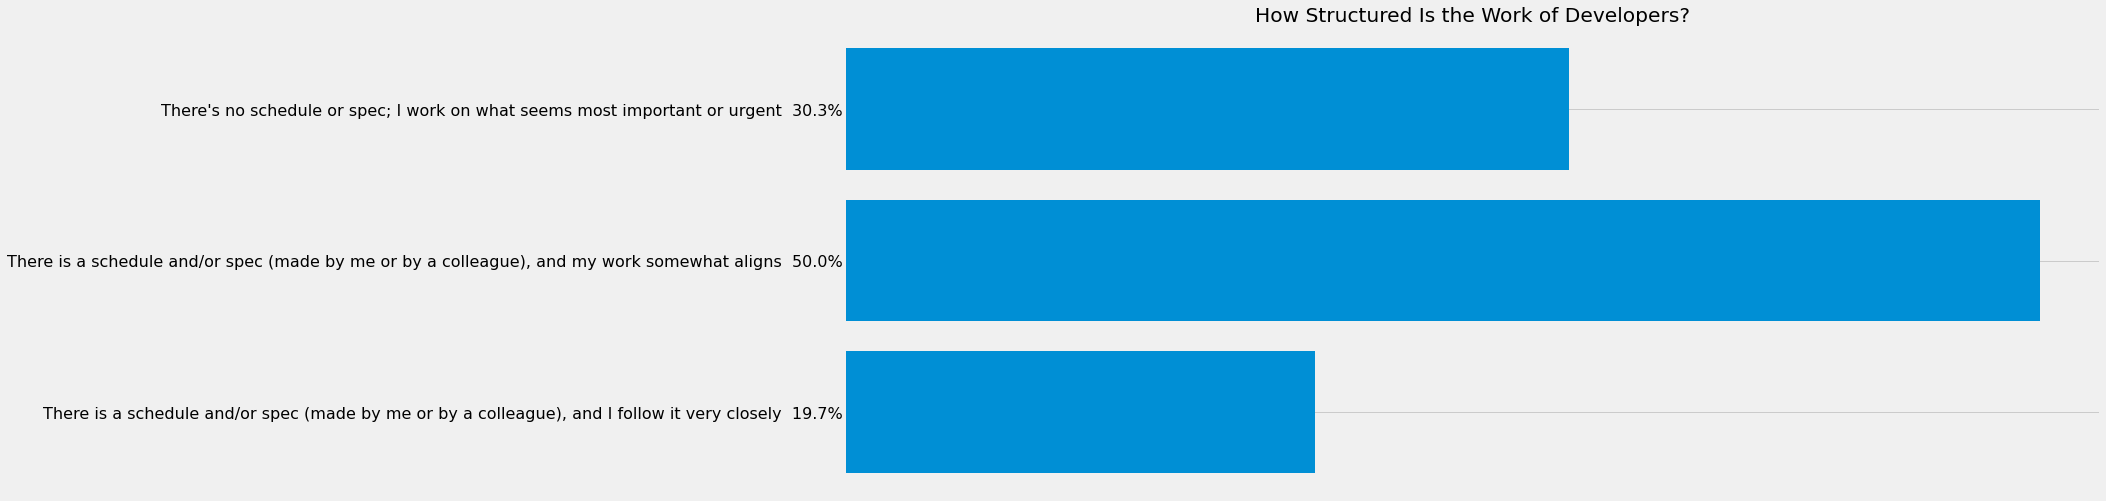

In [105]:
workPlan =  data["WorkPlan"]
workPlan.dropna(inplace = True)

counted = Counter(workPlan)
key_Phrases = ["There is a schedule and/or spec (made by me or by a colleague), and I follow it very closely", 
               "There is a schedule and/or spec (made by me or by a colleague), and my work somewhat aligns", 
               "There's no schedule or spec; I work on what seems most important or urgent"]
Quantity = []

for i in key_Phrases:
    Quantity.append(counted[i])

Build_Barh_sizes( key_Phrases , Quantity, workPlan ,"fivethirtyeight", False , (20,8), "How Structured Is the Work of Developers?")

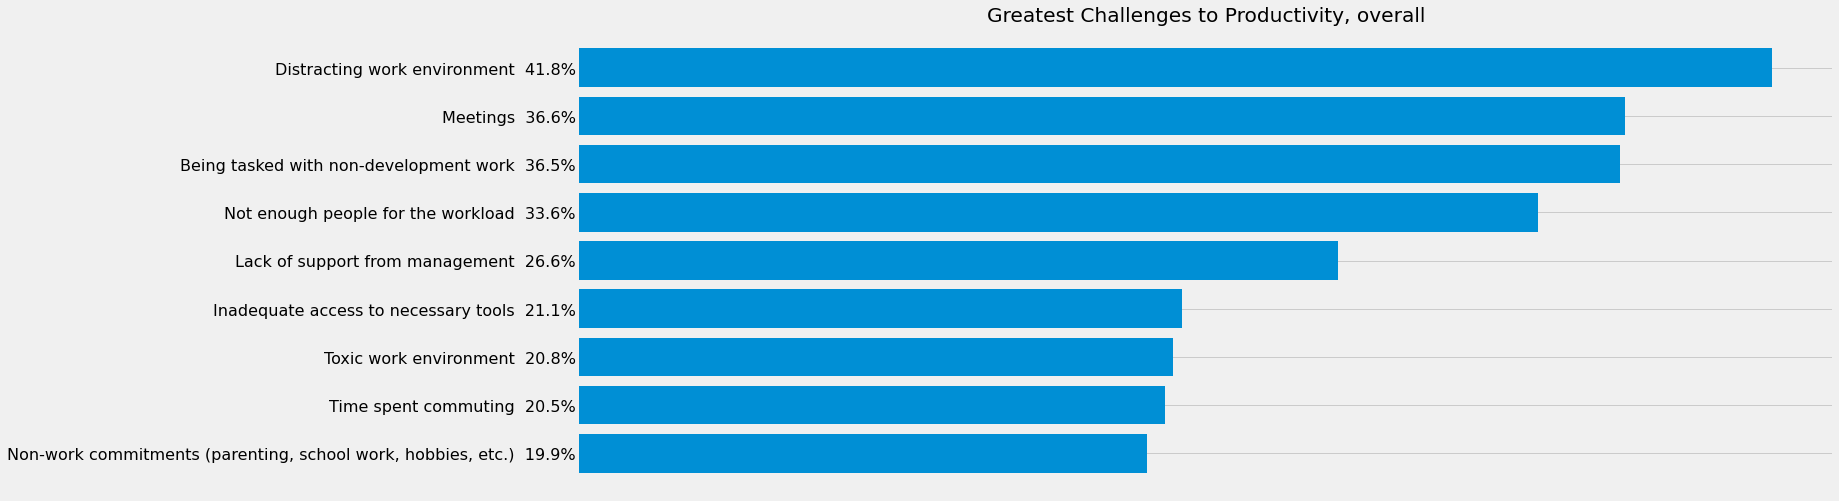

In [106]:
work_challenge =  data["WorkChallenge"]
work_challenge.dropna(inplace = True )
work_challenge = work_challenge.str.split(";")

list_sorter_counter(work_challenge)
Build_Barh_sizes( key_Phrases , Quantity, work_challenge ,"fivethirtyeight", False , (20,8), "Greatest Challenges to Productivity, overall")

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


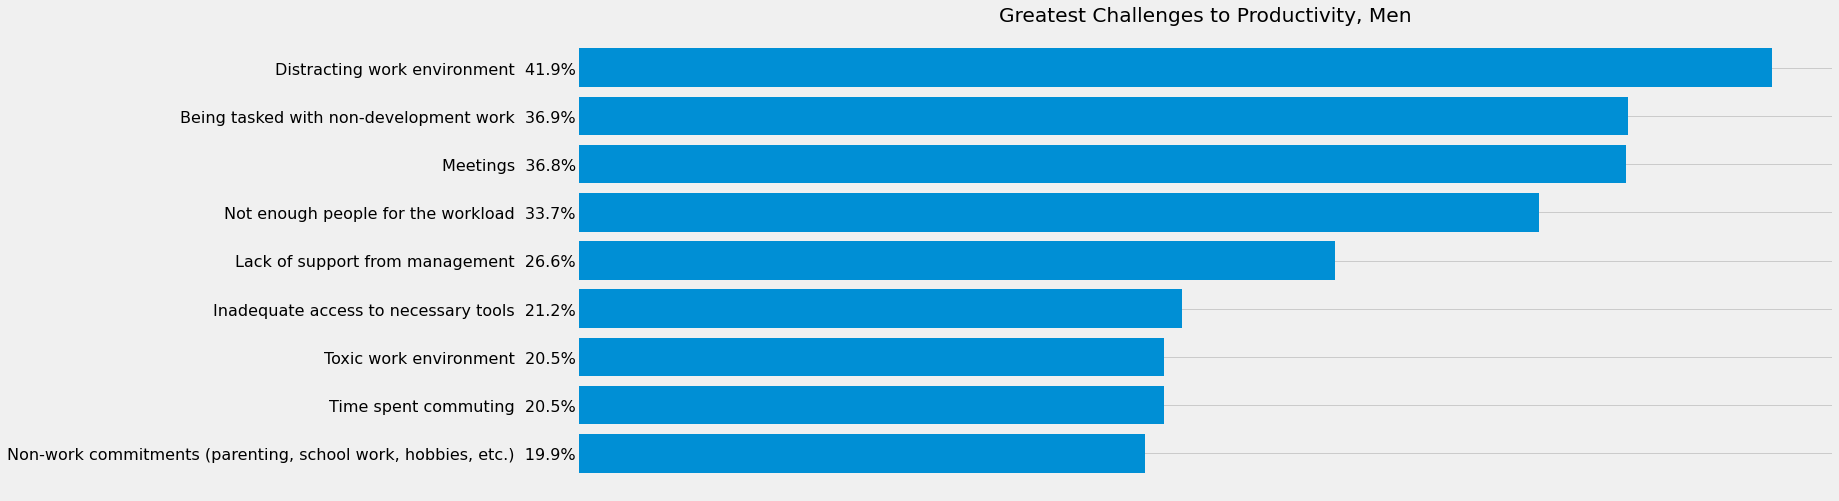

In [107]:
gender = data["Gender"]
gender.dropna(inplace = True)

list_for_men = []

for i in gender:
    if "Man" in i:
        list_for_men.append(i)

Counted = Counter(list_for_men)
new_list = list(Counted)

work_challenge = data["WorkChallenge"]

all_info = []

for i in new_list:
    work_challege_men = data[(work_challenge!= "Nan") & (data["Gender"] == i) ]

    new_work_challege_men = work_challege_men['WorkChallenge']

    new_work_challege_men.dropna(inplace = True)

    for k in new_work_challege_men:
        all_info.append(k.split(";"))



list_sorter_counter(all_info)
Build_Barh_sizes( key_Phrases , Quantity, all_info ,"fivethirtyeight", False , (20,8), "Greatest Challenges to Productivity, Men")

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


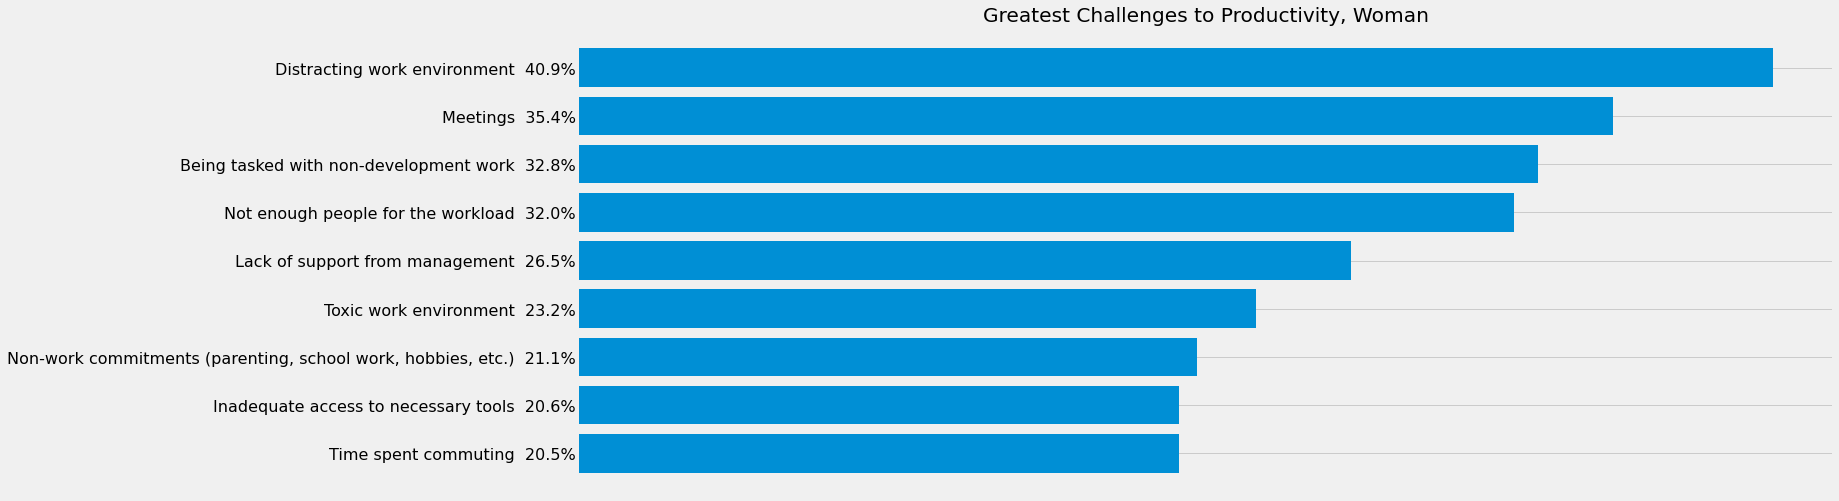

In [108]:
gender = data["Gender"]
gender.dropna(inplace = True)

list_for_woman = []

for i in gender:
    if "Woman" in i:
        list_for_woman.append(i)

Counted = Counter(list_for_woman)
new_list = list(Counted)

work_challenge = data["WorkChallenge"]

all_info = []

for i in new_list:
    work_challenge_woman = data[(work_challenge!= "Nan") & (data["Gender"] == i) ]

    new_work_challenge_woman = work_challenge_woman['WorkChallenge']

    new_work_challenge_woman.dropna(inplace = True)

    for k in new_work_challenge_woman:
        all_info.append(k.split(";"))



list_sorter_counter(all_info)
Build_Barh_sizes( key_Phrases , Quantity, all_info ,"fivethirtyeight", False , (20,8), "Greatest Challenges to Productivity, Woman")

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


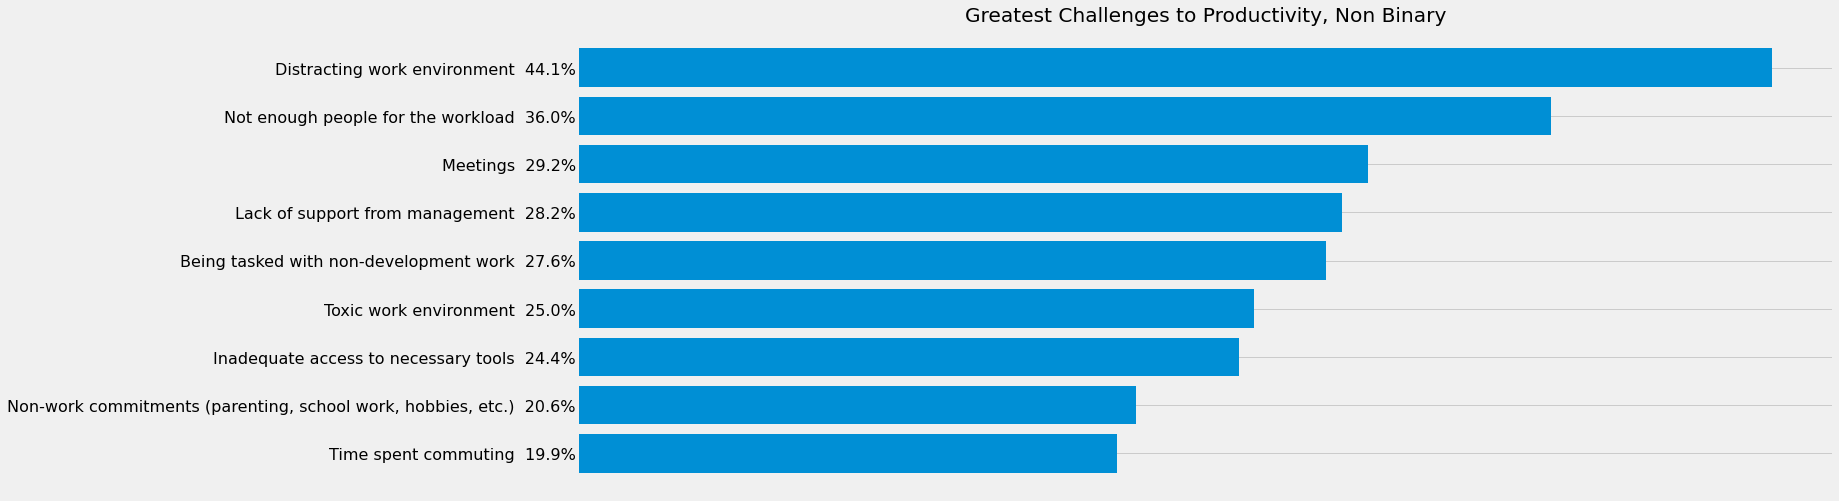

In [109]:
gender = data["Gender"]
gender.dropna(inplace = True)

list_for_no_gender = []

for i in gender:
    if "Non-binary, genderqueer, or gender non-conforming" in i:
        list_for_no_gender.append(i)

Counted = Counter(list_for_no_gender)
new_list = list(Counted)

work_challenge = data["WorkChallenge"]

all_info = []

for i in new_list:
    work_challenge_no_gender = data[(work_challenge!= "Nan") & (data["Gender"] == i) ]

    new_work_challenge_no_gender = work_challenge_no_gender['WorkChallenge']

    new_work_challenge_no_gender.dropna(inplace = True)

    for k in new_work_challenge_no_gender:
        all_info.append(k.split(";"))



list_sorter_counter(all_info)
Build_Barh_sizes( key_Phrases , Quantity, all_info ,"fivethirtyeight", False , (20,8), "Greatest Challenges to Productivity, Non Binary")

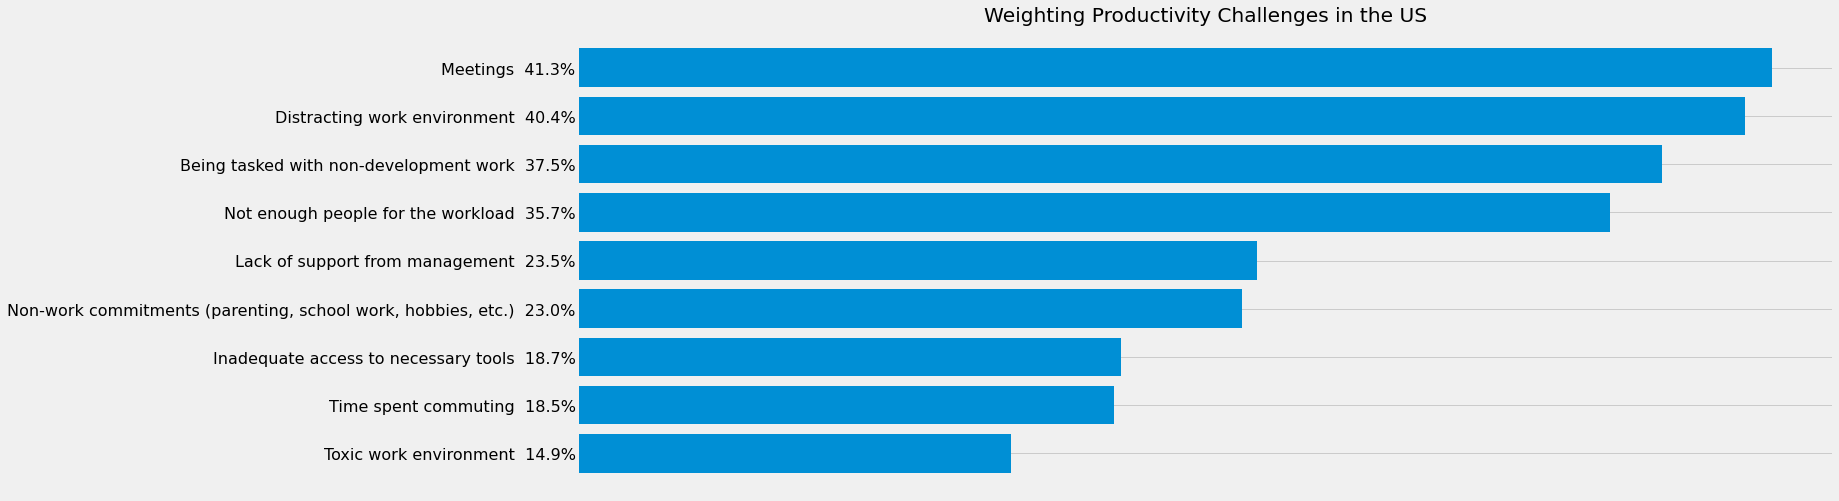

In [110]:
work_challenge =  data["WorkChallenge"]
work_challenge.dropna(inplace = True )

work_challenge_us = data[(work_challenge != "nan")  & (data["Country"] == "United States")]
Work_challenge_us = work_challenge_us["WorkChallenge"]
Work_challenge_us = Work_challenge_us.str.split(";")

list_sorter_counter(Work_challenge_us)
Build_Barh_sizes( key_Phrases , Quantity, Work_challenge_us ,"fivethirtyeight", False , (20,8), "Weighting Productivity Challenges in the US")

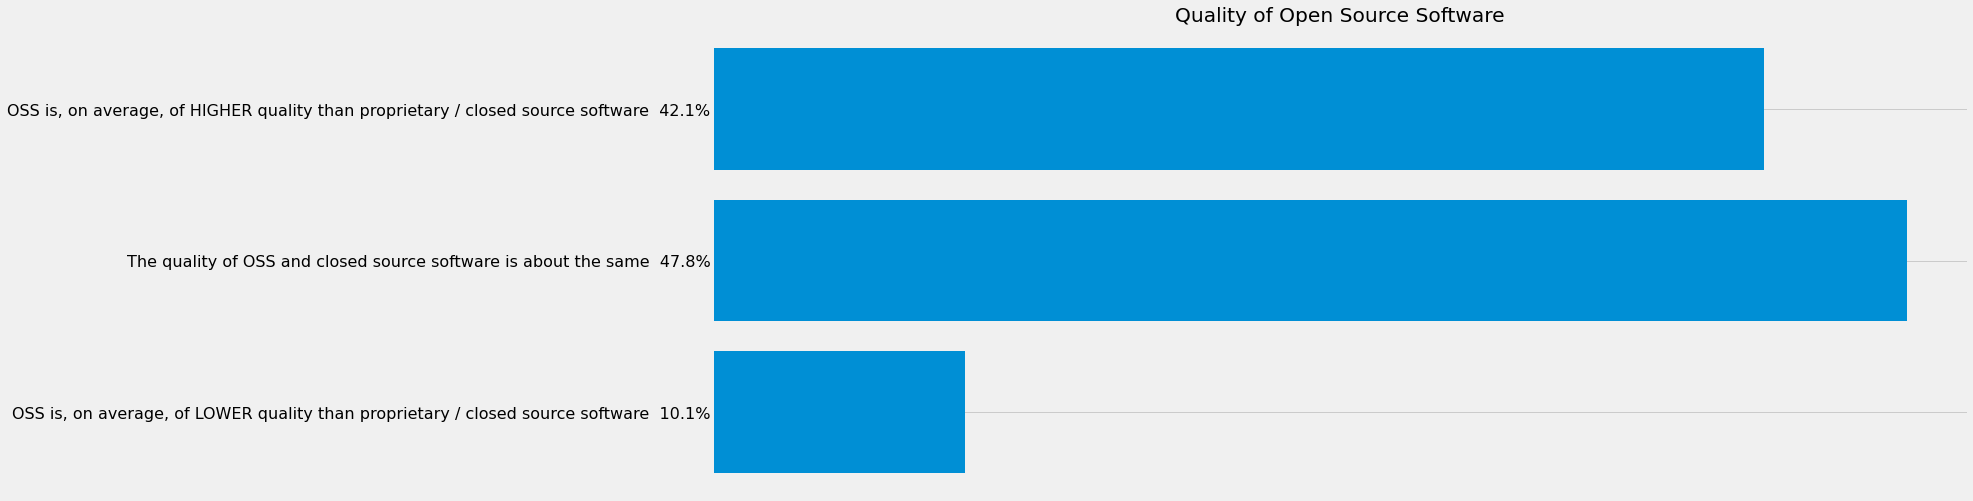

In [111]:
quality_opensource = data["OpenSource"]
quality_opensource.dropna(inplace = True )
counted = Counter(quality_opensource)

key_Phrases = ["OSS is, on average, of LOWER quality than proprietary / closed source software", 
                "The quality of OSS and closed source software is about the same", 
                "OSS is, on average, of HIGHER quality than proprietary / closed source software"]
Quantity = []

for i in key_Phrases:
    Quantity.append(counted[i])

Build_Barh_sizes( key_Phrases , Quantity, quality_opensource ,"fivethirtyeight", False , (20,8), "Quality of Open Source Software")

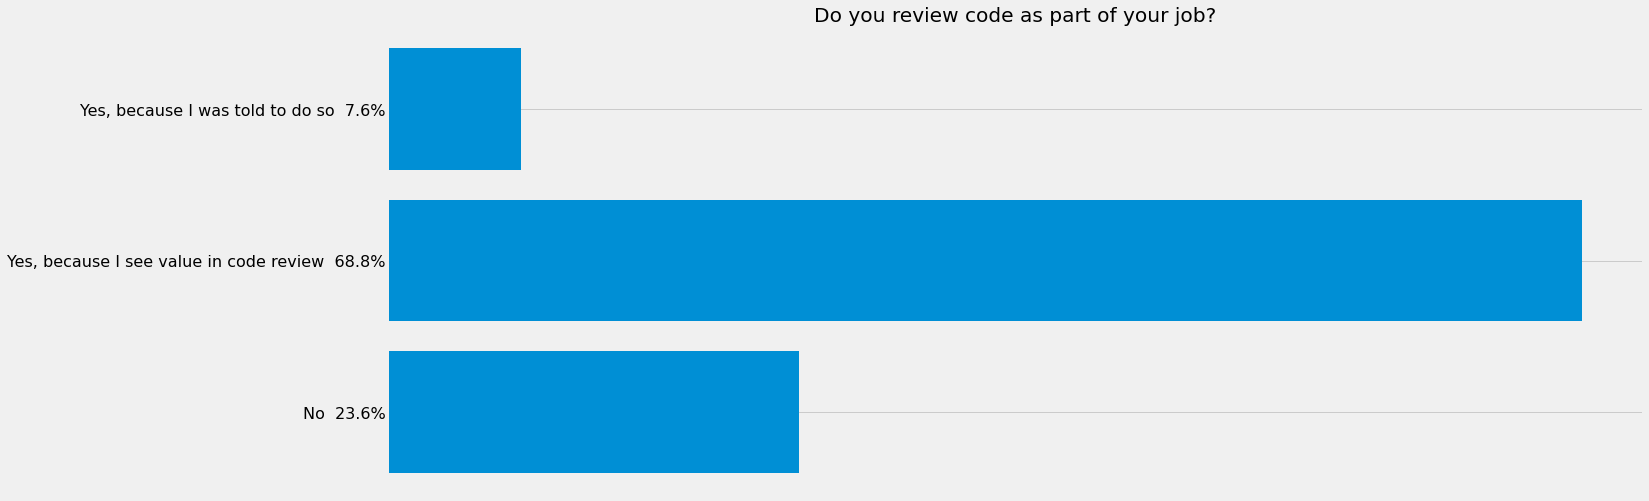

In [112]:
code_review = data["CodeRev"]
code_review.dropna(inplace = True )

counted = Counter(code_review)
items =  counted.items()

key_Phrases = []
Quantity = []

for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])

Build_Barh_sizes( key_Phrases , Quantity, code_review ,"fivethirtyeight", False , (20,8), "Do you review code as part of your job?")

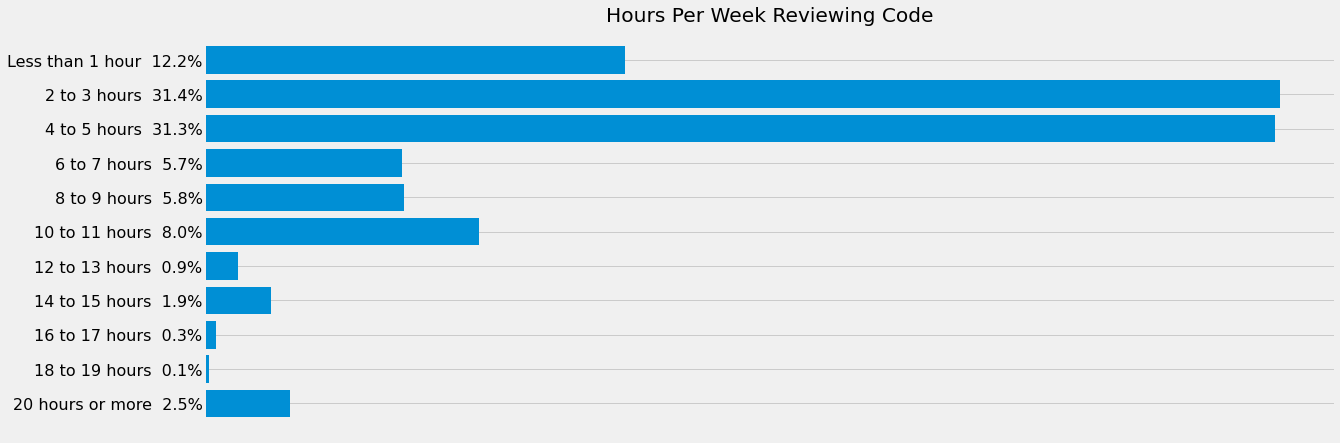

In [113]:
hours_of_code_rev =  data["CodeRevHrs"]
hours_of_code_rev.dropna(inplace = True)

def logics_for_hours(hours_of_code_rev):
    Less_than_1_hour = []
    two_to_3_hours = []
    four_to_5_hours = []
    six_to_7_hours = []
    eight_to_9_hours = []
    ten_to_11_hours = []
    twelve_to_13_hours = []
    fourteen_to_15_hours = []
    sixteen_to_17_hours = []
    eighteen_to_19_hours = []
    twenty_hours_or_more = []

    for i in hours_of_code_rev:
        if int(i) in list(range(0,2)):
            Less_than_1_hour.append(i)
        elif int(i) in list(range(2,4)):
            two_to_3_hours.append(i)
        elif int(i) in list(range(4,6)):
            four_to_5_hours.append(i)
        elif int(i) in list(range(6,8)):
            six_to_7_hours.append(i)
        elif int(i) in list(range (8,10)):
            eight_to_9_hours.append(i)
        elif int(i) in list(range(10,12)):
            ten_to_11_hours.append(i)
        elif int(i) in list(range (12,14)):
            twelve_to_13_hours.append(i)
        elif int(i) in list(range (14,16)):
            fourteen_to_15_hours.append(i)
        elif int(i) in list(range (16,18)):
            sixteen_to_17_hours.append(i)
        elif int(i) in list(range(18,20)):
            eighteen_to_19_hours.append(i)
        else:
            twenty_hours_or_more.append(i)

    len_Less_than_1_hour = len(Less_than_1_hour)
    len_two_to_3_hours = len(two_to_3_hours)
    len_four_to_5_hours = len(four_to_5_hours)
    len_six_to_7_hours = len(six_to_7_hours)
    len_eight_to_9_hours = len(eight_to_9_hours)
    len_ten_to_11_hours = len(ten_to_11_hours)
    len_twelve_to_13_hours = len(twelve_to_13_hours)
    len_fourteen_to_15_hours = len(fourteen_to_15_hours)
    len_sixteen_to_17_hours = len(sixteen_to_17_hours)
    len_eighteen_to_19_hours = len(eighteen_to_19_hours)
    len_twenty_hours_or_more = len(twenty_hours_or_more)

    global key_Phrases
    global Quantity

    key_Phrases = ["Less than 1 hour" , "2 to 3 hours", "4 to 5 hours", "6 to 7 hours", "8 to 9 hours", 
            "10 to 11 hours", "12 to 13 hours", "14 to 15 hours", "16 to 17 hours", "18 to 19 hours", "20 hours or more"]
    Quantity = [len_Less_than_1_hour, len_two_to_3_hours, len_four_to_5_hours, len_six_to_7_hours, len_eight_to_9_hours,
                len_ten_to_11_hours, len_twelve_to_13_hours, len_fourteen_to_15_hours, len_sixteen_to_17_hours, 
                len_eighteen_to_19_hours, len_twenty_hours_or_more ]
    
logics_for_hours(hours_of_code_rev)
key_Phrases.reverse()
Quantity.reverse()

Build_Barh_sizes(key_Phrases, Quantity, hours_of_code_rev, "fivethirtyeight", False , (18,7), "Hours Per Week Reviewing Code")

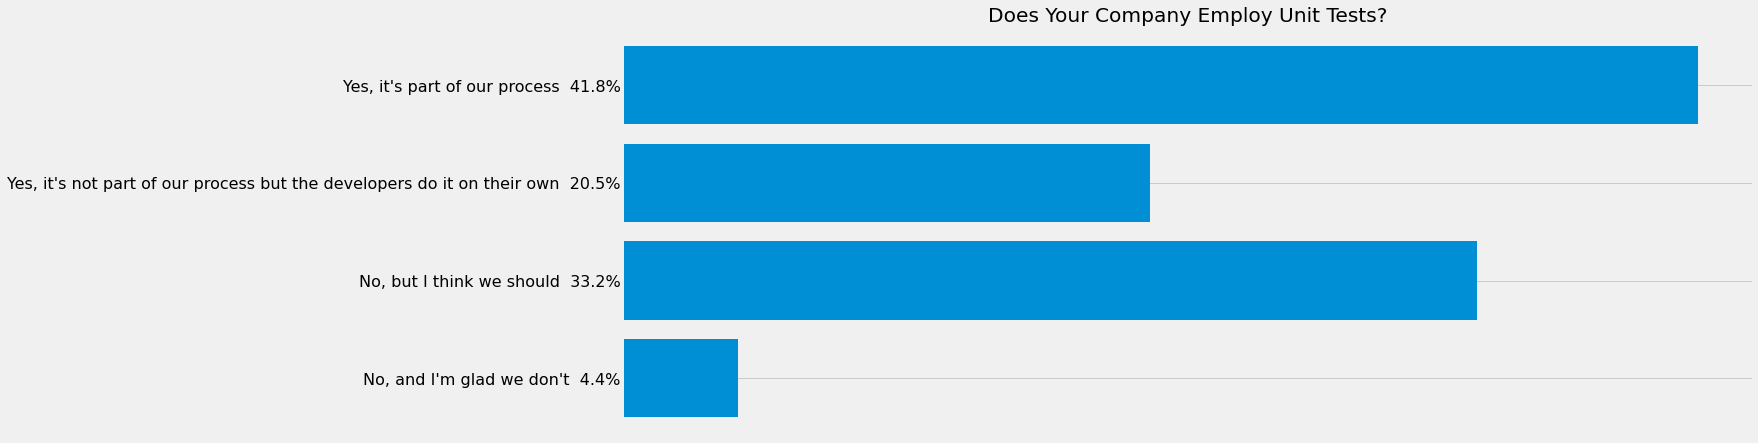

In [114]:
uni_tests = data["UnitTests"]
uni_tests.dropna(inplace =  True)
counted = Counter(uni_tests)

key_Phrases = ["No, and I'm glad we don't" , "No, but I think we should", "Yes, it's not part of our process but the developers do it on their own", 
                "Yes, it's part of our process"]
Quantity = []
for i in key_Phrases:
    Quantity.append(counted[i])

Build_Barh_sizes(key_Phrases, Quantity, uni_tests, "fivethirtyeight", False , (18,7), "Does Your Company Employ Unit Tests?")


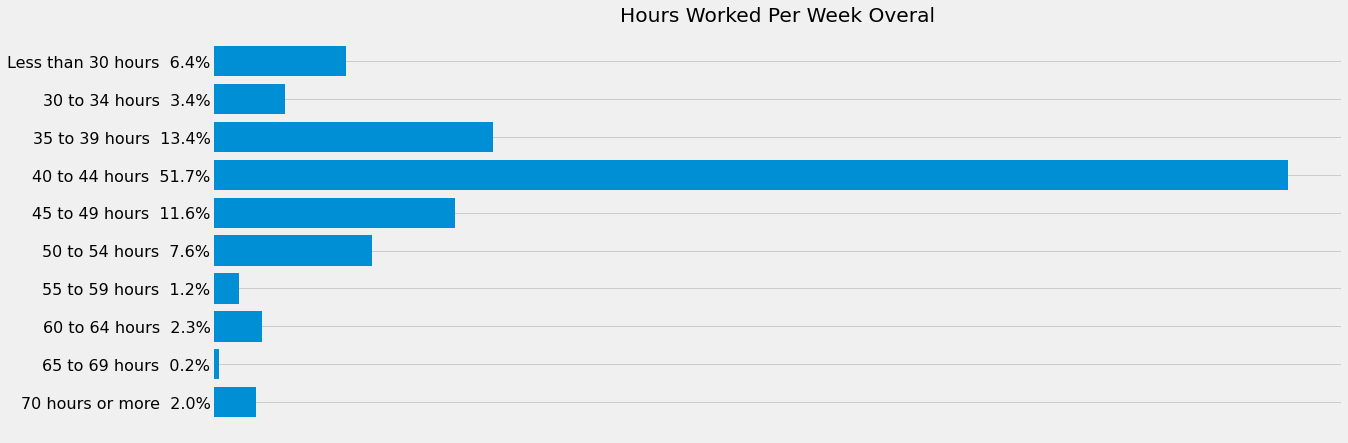

In [115]:
hours_worked_per_week = data["WorkWeekHrs"]
hours_worked_per_week.dropna(inplace =True)

def logics_for_work_hours(hours_worked_per_week):
    less_than_30_hours = []
    thirty_to_34_hours = []
    thirtyfive_to_39_hours = []
    fourty_to_44_hours = []
    fourtyfive_to_49_hours = []
    fifty_to_54_hours = []
    fiftyfive_to_59_hours = []
    sixty_to_64_hours = []
    sixtyfive_to_69_hours = []
    seventy_hours_or_more = []

    for i in hours_worked_per_week:
        if int(i) in list(range(0,30)):
            less_than_30_hours.append(i)
        elif int(i) in list(range(30,35)):
            thirty_to_34_hours.append(i)
        elif int(i) in list(range(35,40)):
            thirtyfive_to_39_hours.append(i)
        elif int(i) in list(range(40,45)):
            fourty_to_44_hours.append(i)
        elif int(i) in list(range (45,50)):
            fourtyfive_to_49_hours.append(i)
        elif int(i) in list(range(50,55)):
            fifty_to_54_hours.append(i)
        elif int(i) in list(range (55,60)):
            fiftyfive_to_59_hours.append(i)
        elif int(i) in list(range (60,65)):
            sixty_to_64_hours.append(i)
        elif int(i) in list(range (65,70)):
            sixtyfive_to_69_hours.append(i)
        else:
            seventy_hours_or_more.append(i)

    len_less_than_30_hours = len(less_than_30_hours)
    len_thirty_to_34_hours = len(thirty_to_34_hours)
    len_thirtyfive_to_39_hours = len(thirtyfive_to_39_hours)
    len_fourty_to_44_hours = len(fourty_to_44_hours)
    len_fourtyfive_to_49_hours = len(fourtyfive_to_49_hours) 
    len_fifty_to_54_hours = len(fifty_to_54_hours)
    len_fiftyfive_to_59_hours = len(fiftyfive_to_59_hours)
    len_sixty_to_64_hours = len(sixty_to_64_hours)
    len_sixtyfive_to_69_hours = len(sixtyfive_to_69_hours)
    len_seventy_hours_or_more = len(seventy_hours_or_more)

    global key_Phrases
    global Quantity

    key_Phrases = ["Less than 30 hours", "30 to 34 hours", "35 to 39 hours", "40 to 44 hours", "45 to 49 hours", "50 to 54 hours",
                    "55 to 59 hours", "60 to 64 hours", "65 to 69 hours", "70 hours or more"]
    Quantity = [len_less_than_30_hours, len_thirty_to_34_hours, len_thirtyfive_to_39_hours, len_fourty_to_44_hours, 
                len_fourtyfive_to_49_hours, len_fifty_to_54_hours, len_fiftyfive_to_59_hours, len_sixty_to_64_hours,
                len_sixtyfive_to_69_hours, len_seventy_hours_or_more]

logics_for_work_hours(hours_worked_per_week)


key_Phrases.reverse()
Quantity.reverse()

Build_Barh_sizes(key_Phrases, Quantity, hours_worked_per_week, "fivethirtyeight", False , (18,7), "Hours Worked Per Week Overal")


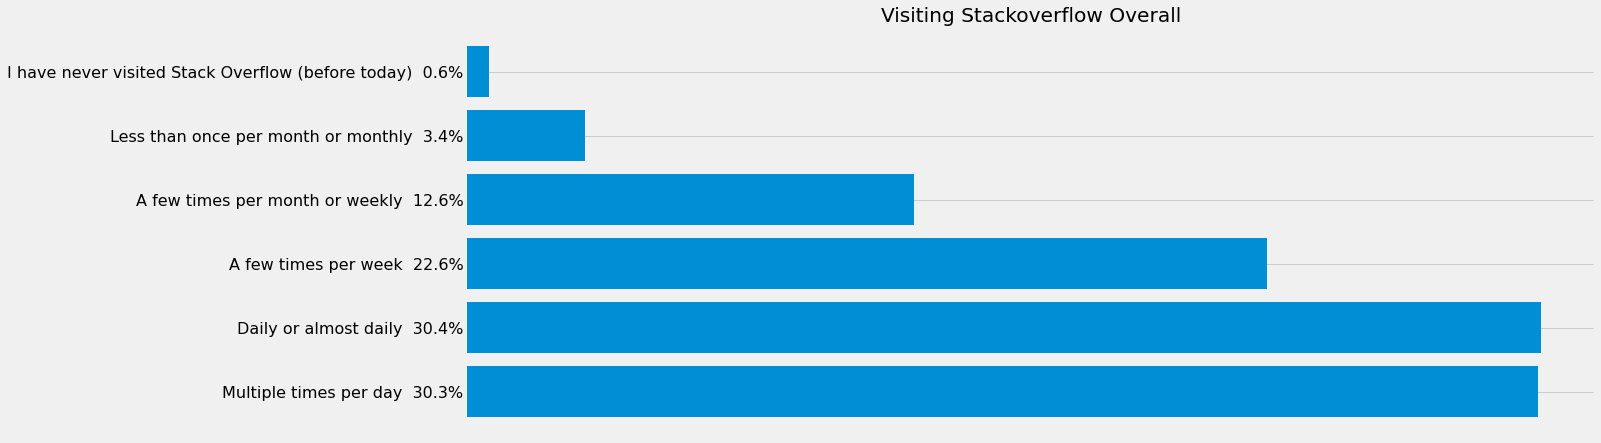

In [116]:
visiting_stacloverflow = data["SOVisitFreq"]
visiting_stacloverflow.dropna(inplace = True)
counted = Counter(visiting_stacloverflow)

key_Phrases = ["Multiple times per day", "Daily or almost daily", "A few times per week", "A few times per month or weekly",
               "Less than once per month or monthly", "I have never visited Stack Overflow (before today)"]
Quantity = []

for i in key_Phrases:
    Quantity.append(counted[i])

Build_Barh_sizes(key_Phrases, Quantity, visiting_stacloverflow, "fivethirtyeight", False , (18,7), "Visiting Stackoverflow Overall")


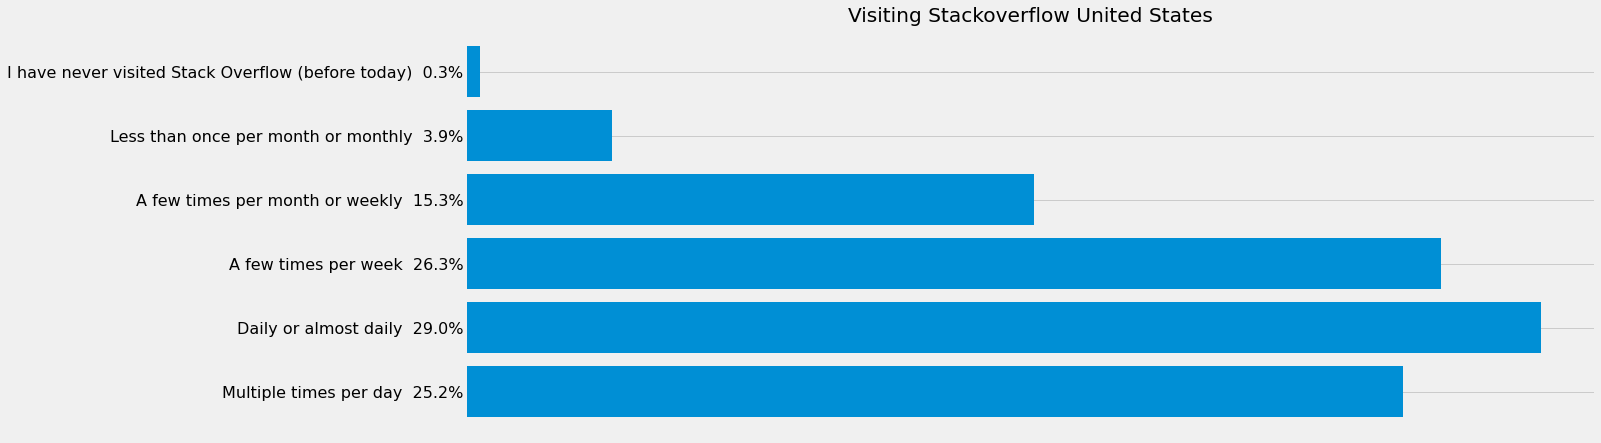

In [117]:
visiting_stacloverflow = data["SOVisitFreq"]
visiting_stacloverflow.dropna(inplace = True)

visiting_stacoverflow_usa =  data[(visiting_stacloverflow != "nan") & (data["Country"] == "United States")]

Visiting_stackoverflow_usa = visiting_stacoverflow_usa["SOVisitFreq"]
counted = Counter(Visiting_stackoverflow_usa)

key_Phrases = ["Multiple times per day", "Daily or almost daily", "A few times per week", "A few times per month or weekly",
               "Less than once per month or monthly", "I have never visited Stack Overflow (before today)"]
Quantity = []

for i in key_Phrases:
    Quantity.append(counted[i])

Build_Barh_sizes(key_Phrases, Quantity, Visiting_stackoverflow_usa, "fivethirtyeight", False , (18,7), "Visiting Stackoverflow United States")


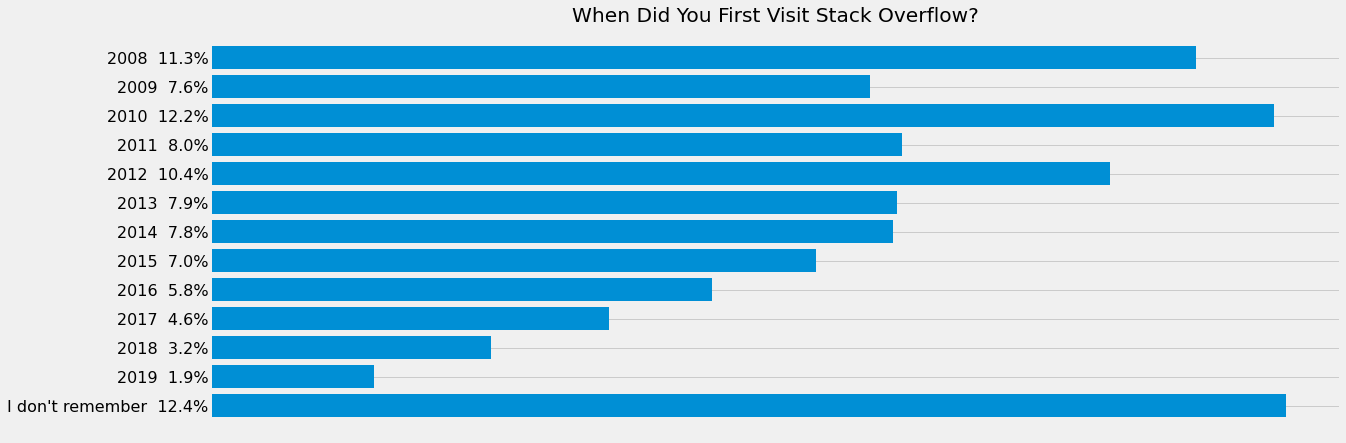

In [118]:
first_stacoverflow_visit = data["SOVisit1st"]
first_stacoverflow_visit.dropna(inplace = True)

counted = Counter(first_stacoverflow_visit)  

key_Phrases = ["I don't remember","2019", "2018", "2017", "2016", "2015", "2014", "2013", "2012", "2011", "2010", "2009", "2008"]
Quantity = []

for i in key_Phrases:
    Quantity.append(counted[i]) 

Build_Barh_sizes(key_Phrases, Quantity, first_stacoverflow_visit, "fivethirtyeight", False , (18,7), "When Did You First Visit Stack Overflow?")


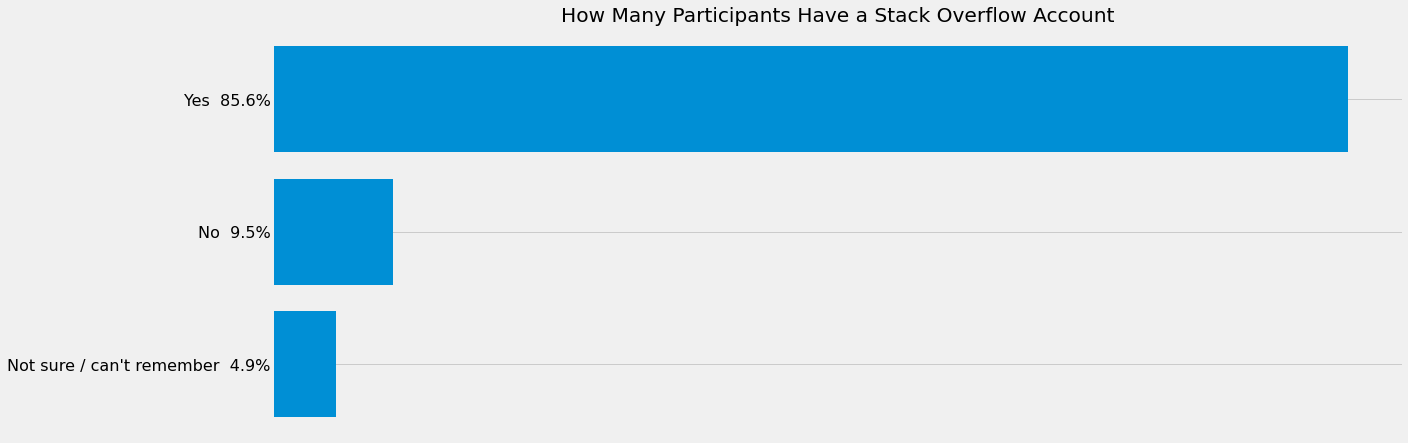

In [119]:
SO_account = data["SOAccount"]
SO_account.dropna(inplace = True)

counted = Counter(SO_account)
counted_sorted = sort_dict_by_value(counted)

key_Phrases = []
Quantity = []

items = counted_sorted.items()

for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])

Build_Barh_sizes(key_Phrases, Quantity, SO_account, "fivethirtyeight", False , (18,7), "How Many Participants Have a Stack Overflow Account")


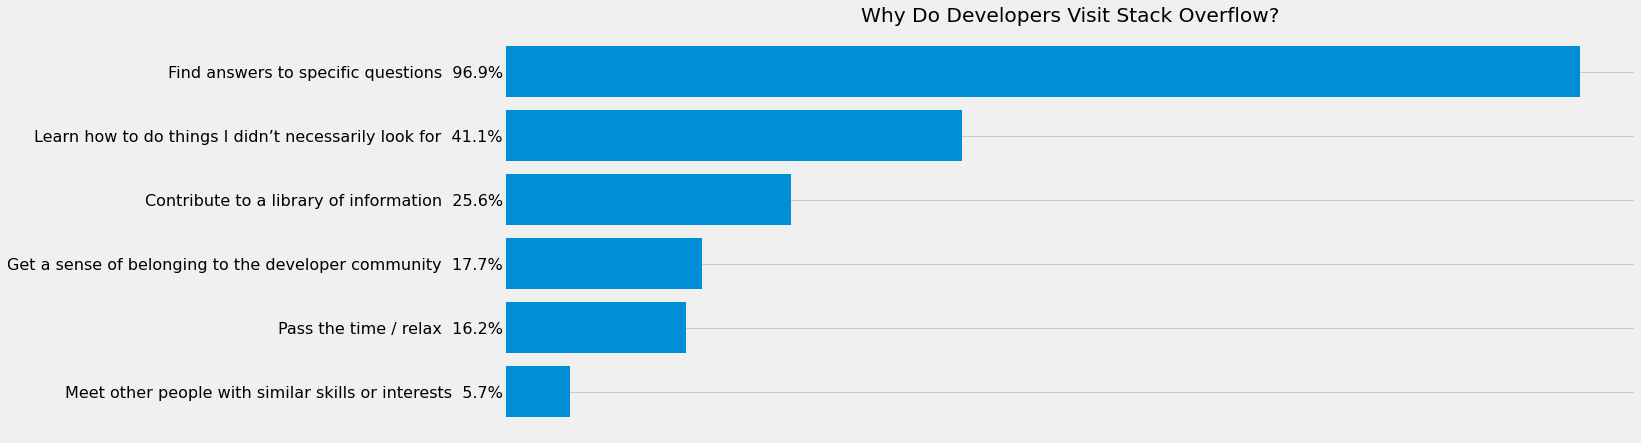

In [120]:
why_visit_SO =data["SOVisitTo"]
why_visit_SO.dropna(inplace = True)
why_visit_SO = why_visit_SO.str.split(";")

list_sorter_counter(why_visit_SO)

Build_Barh_sizes(key_Phrases, Quantity, why_visit_SO, "fivethirtyeight", False , (18,7), "Why Do Developers Visit Stack Overflow?")


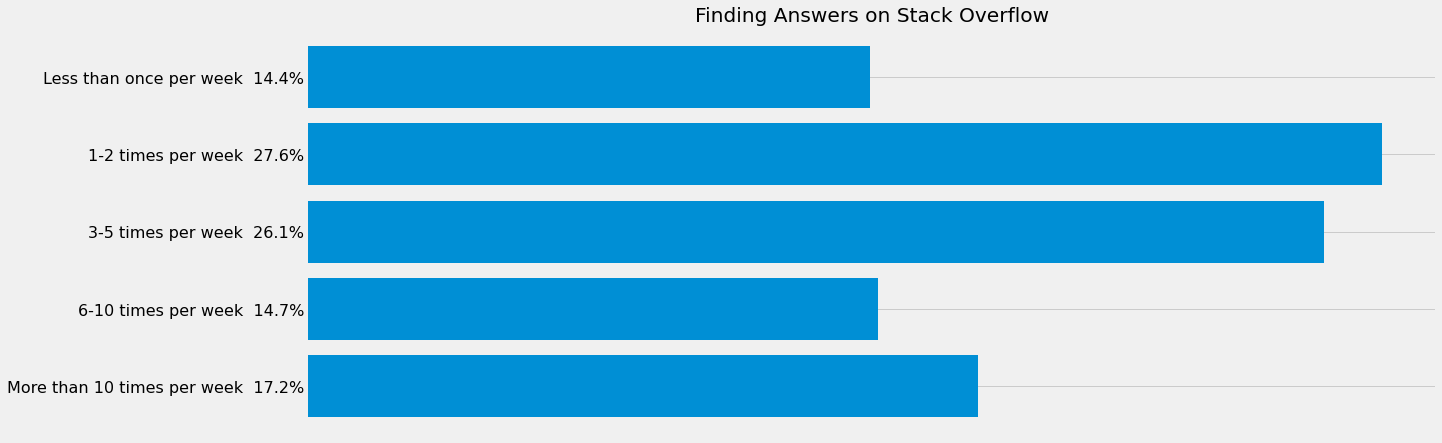

In [121]:
find_answers_on_SO = data["SOFindAnswer"]
find_answers_on_SO.dropna(inplace = True)

counted = Counter(find_answers_on_SO)

key_Phrases = ["More than 10 times per week", "6-10 times per week", "3-5 times per week", "1-2 times per week", "Less than once per week" ]
Quantity = []

for i in key_Phrases:
    Quantity.append(counted[i])


Build_Barh_sizes(key_Phrases, Quantity, find_answers_on_SO, "fivethirtyeight", False , (18,7), "Finding Answers on Stack Overflow")


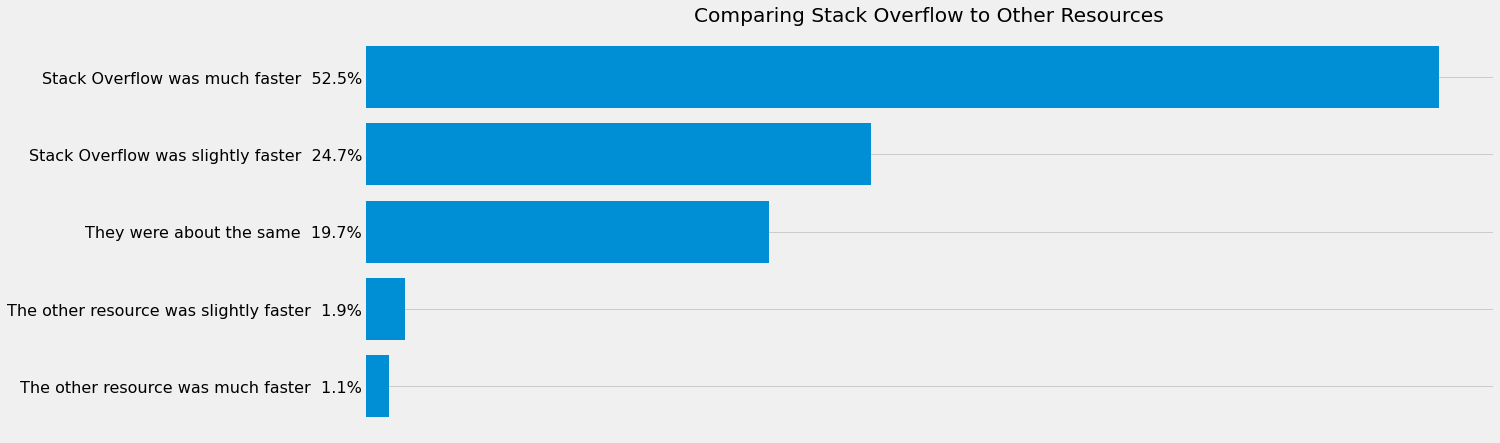

In [122]:
comparing_SO_to_other = data["SOTimeSaved"]
comparing_SO_to_other.dropna(inplace = True)
counted = Counter(comparing_SO_to_other)

counted_sorted = sort_dict_by_value(counted)

key_Phrases = []
Quantity = []

items = counted_sorted.items()

for item in items:
    key_Phrases.append(item[0])
    Quantity.append(item[1])

Build_Barh_sizes(key_Phrases, Quantity, comparing_SO_to_other, "fivethirtyeight", False , (18,7), "Comparing Stack Overflow to Other Resources")

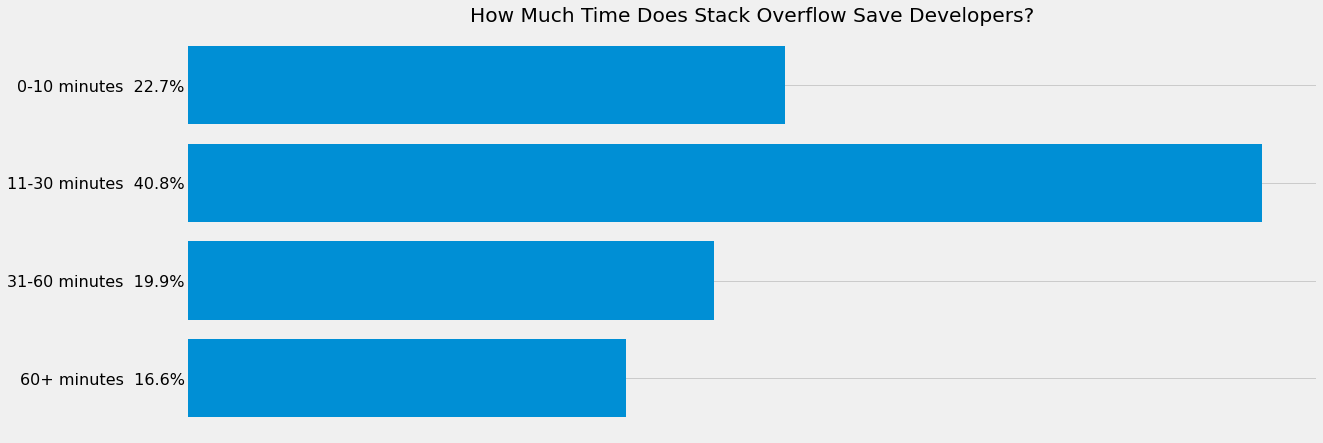

In [123]:
time_save = data["SOHowMuchTime"]
time_save.dropna(inplace =  True)
counted = Counter(time_save)

key_Phrases = ["60+ minutes", "31-60 minutes", "11-30 minutes", "0-10 minutes"]
Quantity = []

for i in key_Phrases:
    Quantity.append(counted[i])


Build_Barh_sizes(key_Phrases, Quantity, time_save, "fivethirtyeight", False , (18,7), "How Much Time Does Stack Overflow Save Developers?")

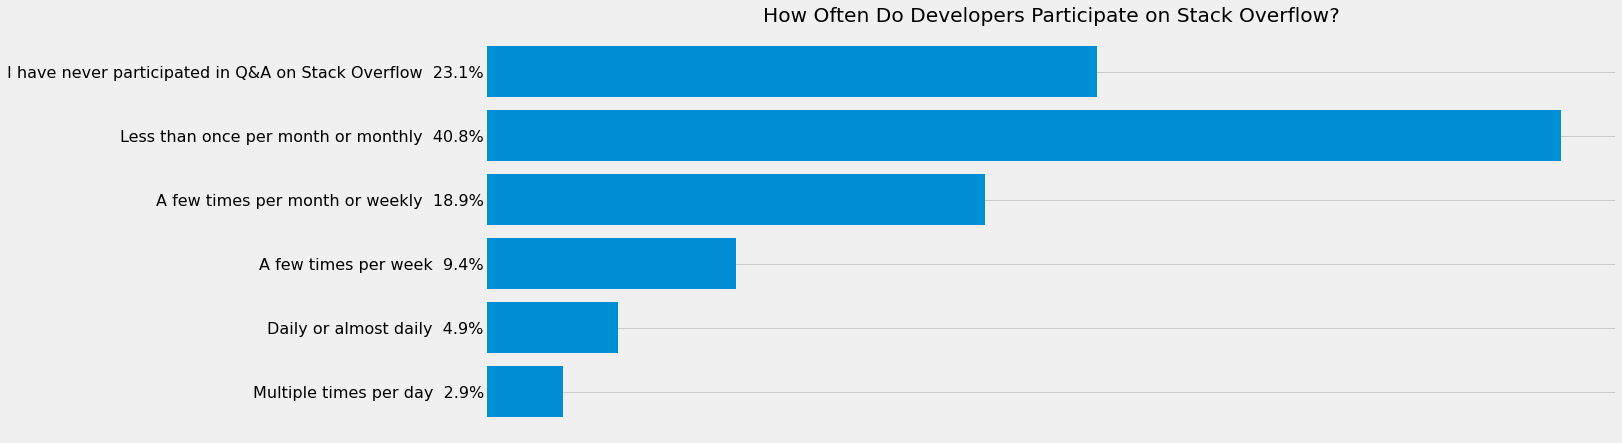

In [124]:
frequency_of_participating_SO =  data["SOPartFreq"]
frequency_of_participating_SO.dropna(inplace = True)
counted = Counter(frequency_of_participating_SO)

key_Phrases = ["Multiple times per day", "Daily or almost daily", "A few times per week", "A few times per month or weekly", 
               "Less than once per month or monthly", "I have never participated in Q&A on Stack Overflow"]
Quantity = []

for i in key_Phrases:
    Quantity.append(counted[i])

Build_Barh_sizes(key_Phrases, Quantity, frequency_of_participating_SO, "fivethirtyeight", False , (18,7), "How Often Do Developers Participate on Stack Overflow?")

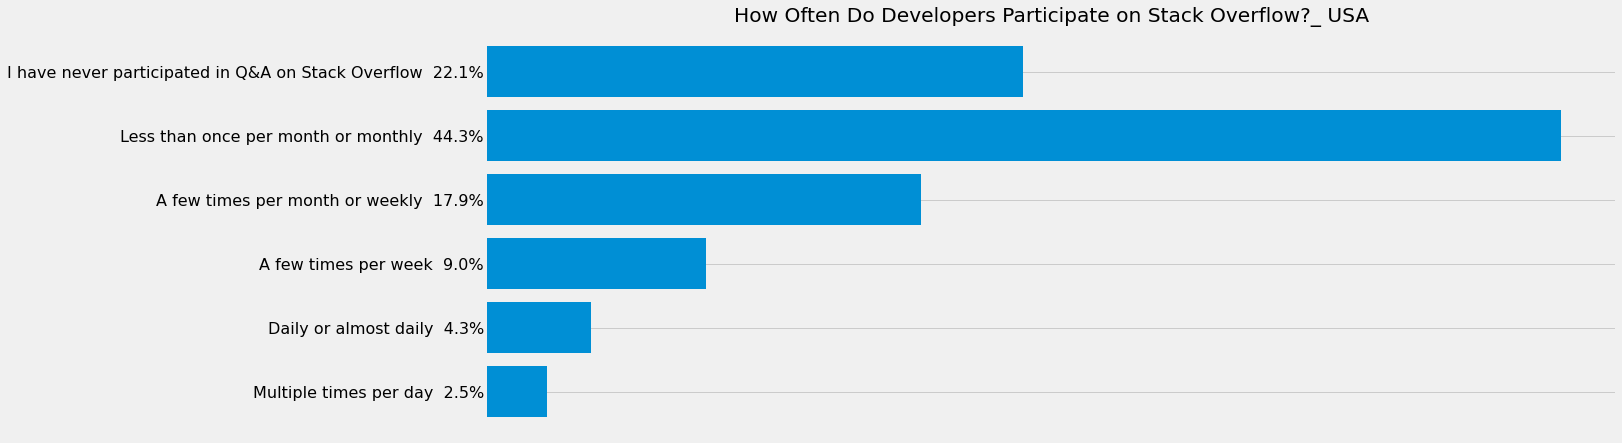

In [125]:
frequency_of_participating_SO =  data["SOPartFreq"]
frequency_of_participating_SO.dropna(inplace = True)

frequency_of_participating_SO_usa =  data[(frequency_of_participating_SO != "nan") & (data["Country"] == "United States")]
Frequency_of_participating_SO_usa = frequency_of_participating_SO_usa["SOPartFreq"]

counted = Counter(Frequency_of_participating_SO_usa)

key_Phrases = ["Multiple times per day", "Daily or almost daily", "A few times per week", "A few times per month or weekly", 
               "Less than once per month or monthly", "I have never participated in Q&A on Stack Overflow"]
Quantity = []

for i in key_Phrases:
    Quantity.append(counted[i])

Build_Barh_sizes(key_Phrases, Quantity, Frequency_of_participating_SO_usa, "fivethirtyeight", False , (18,7), "How Often Do Developers Participate on Stack Overflow?_ USA")

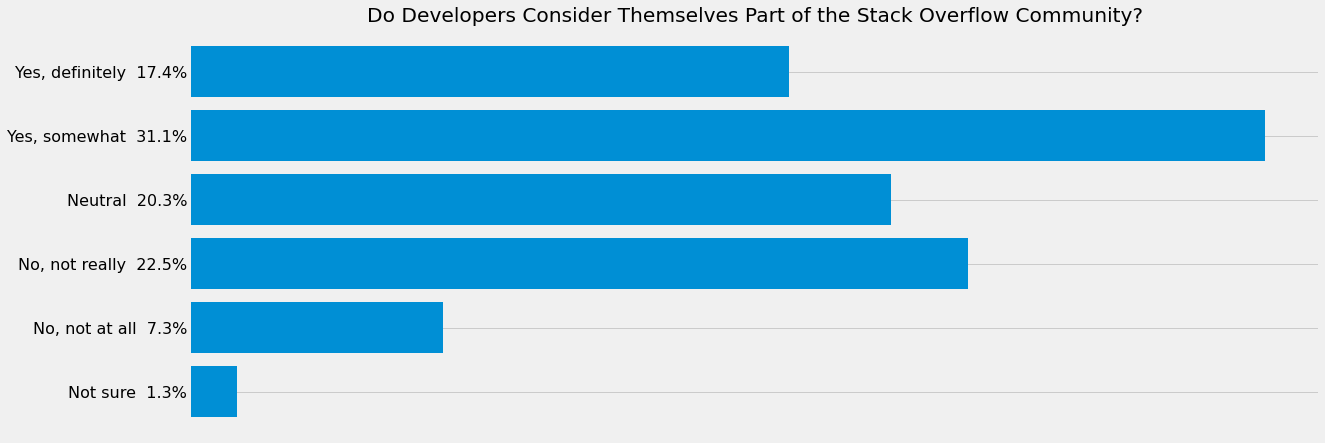

In [130]:
SO_community = data["SOComm"]
SO_community.dropna(inplace = True)
counted = Counter(SO_community)

key_Phrases = ["Not sure", "No, not at all", "No, not really", "Neutral", "Yes, somewhat", "Yes, definitely"]
Quantity = []

for i in key_Phrases:
    Quantity.append(counted[i])

Build_Barh_sizes(key_Phrases, Quantity, SO_community, "fivethirtyeight", False , (18,7), "Do Developers Consider Themselves Part of the Stack Overflow Community?")

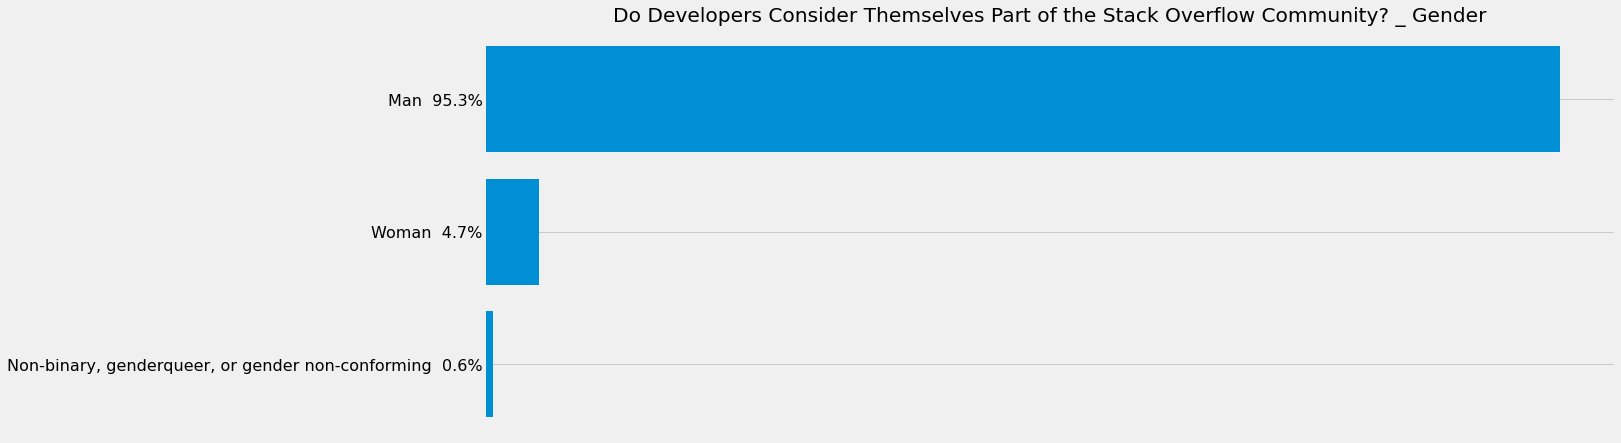

In [127]:
gender = data["Gender"]
SO_community = data["SOComm"]
SO_community.dropna(inplace = True)
gender.dropna(inplace = True)

gender_community = data[(gender != "nan") & ((data["SOComm"]  == "Yes, definitely"))]
Gender_commuity = gender_community["Gender"]
Gender_commuity_1 = Gender_commuity.str.split(";")
union = []
for i in Gender_commuity_1:
        for k in i:
                union.append(k)

counted = Counter(union)
counted_sorted = sort_dict_by_value(counted)

key_Phrases = []
Quantity = []

items = counted_sorted.items()

for item in items:
        key_Phrases.append(item[0])
        Quantity.append(item[1])


Build_Barh_sizes(key_Phrases, Quantity, Gender_commuity_1, "fivethirtyeight", False , (18,7), "Do Developers Consider Themselves Part of the Stack Overflow Community? _ Gender")

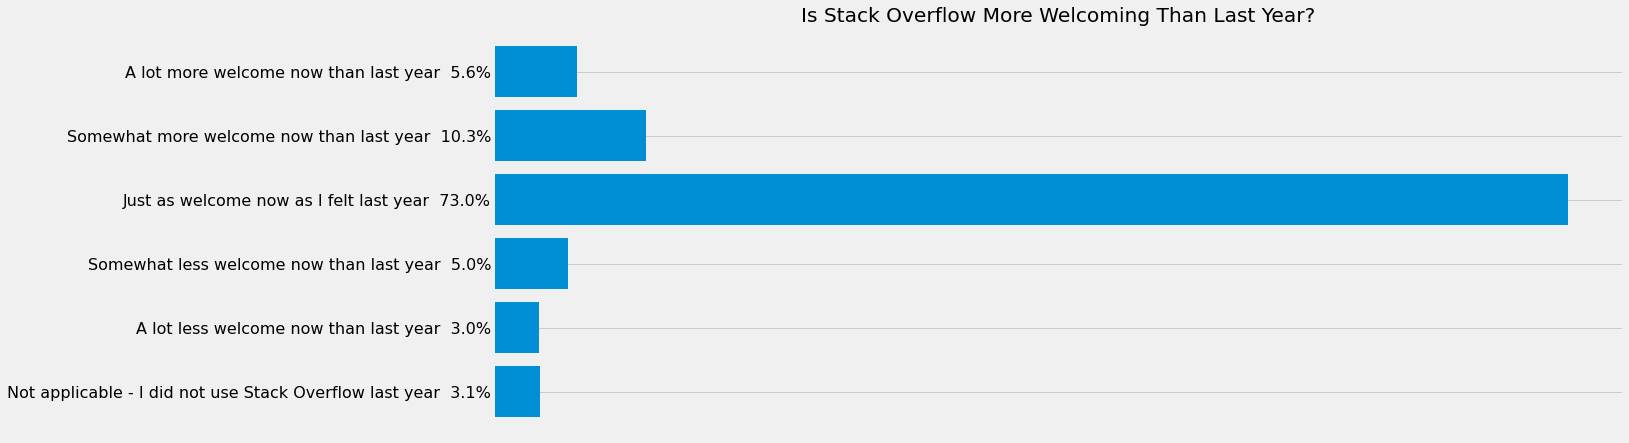

In [128]:
welcome_change = data["WelcomeChange"]
welcome_change.dropna(inplace =  True)
counted = Counter(welcome_change)

key_Phrases =  ["Not applicable - I did not use Stack Overflow last year", "A lot less welcome now than last year",
                "Somewhat less welcome now than last year", "Just as welcome now as I felt last year", 
                "Somewhat more welcome now than last year", "A lot more welcome now than last year"]
Quantity = []

for i in key_Phrases:
    Quantity.append(counted[i])


Build_Barh_sizes(key_Phrases, Quantity, welcome_change, "fivethirtyeight", False , (18,7), "Is Stack Overflow More Welcoming Than Last Year?")

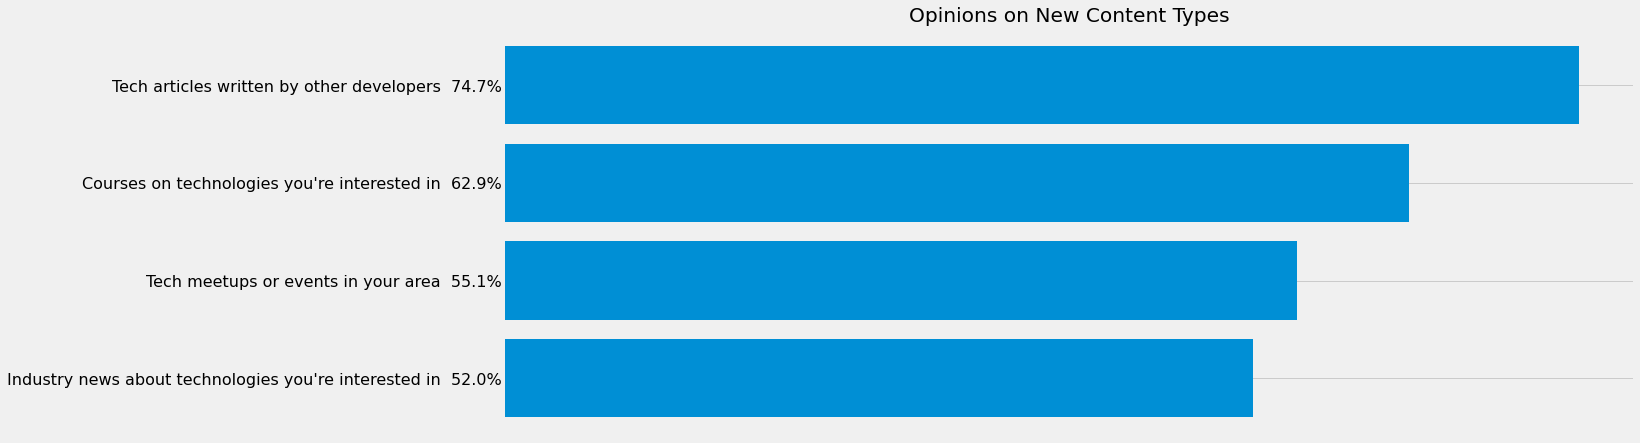

In [129]:
new_content_SO = data["SONewContent"]
new_content_SO.dropna(inplace = True)
new_content_SO = new_content_SO.str.split(";")

list_sorter_counter(new_content_SO)

Build_Barh_sizes(key_Phrases, Quantity, new_content_SO, "fivethirtyeight", False , (18,7), "Opinions on New Content Types")